In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import sklearn
import statsmodels
import statsmodels.tools.eval_measures as      em
from   sklearn.metrics                 import  mean_squared_error
from   statsmodels.tsa.api             import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display                 import display
from   pylab                           import rcParams

C:\Python\Anaconda\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.8' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
#conda update conda

## Read the data from the '.csv' file as a monthly Time Series.

In [3]:
df = pd.read_csv('Sparkling.csv')
df.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [4]:
Time_Stamp = pd.date_range(start='1980-01-01',periods=len(df),freq='M')
Time_Stamp

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [5]:
df['YearMonth'] = Time_Stamp
df.head()

YearMonth  Sparkling
0 1980-01-31       1686
1 1980-02-29       1591
2 1980-03-31       2304
3 1980-04-30       1712
4 1980-05-31       1471

In [6]:
df.set_index(keys='YearMonth',inplace=True)
df

Sparkling
YearMonth            
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471
...               ...
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

[187 rows x 1 columns]

In [7]:
df.shape

(187, 1)

## Plot the Time Series to understand the behaviour of the data.

In [8]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

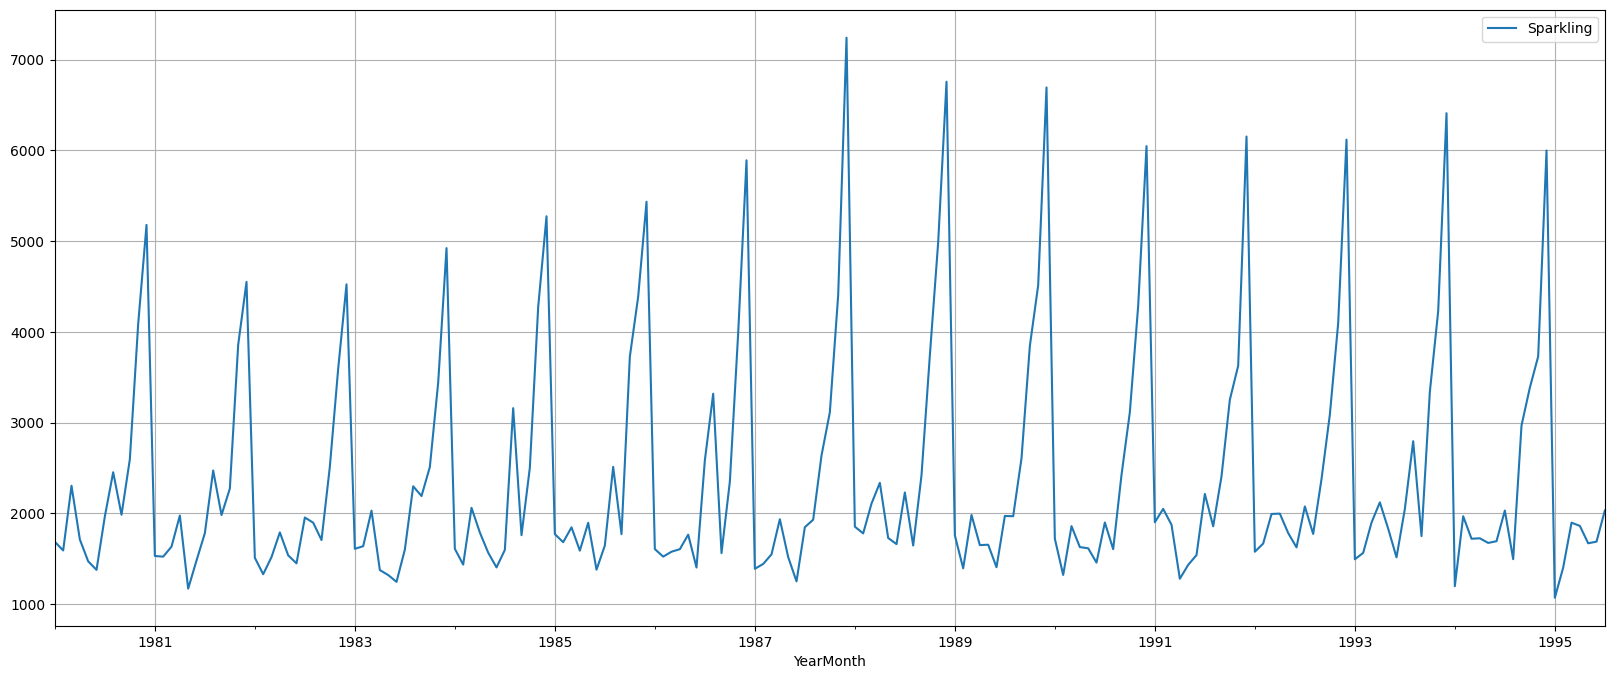

In [9]:
df.plot(grid=True);
plt.show()

We can see that there is a trend with a seasonal pattern associated as well.

## Check the basic measures of descriptive statistics

In [10]:
df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

The basic measures of descriptive statistics tell us how the Sales have varied across years. But remember, for this measure of descriptive statistics we have averaged over the whole data without taking the time component into account.

## Decompose the Time Series and plot the different components.

In [11]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

### Additive Decomposition

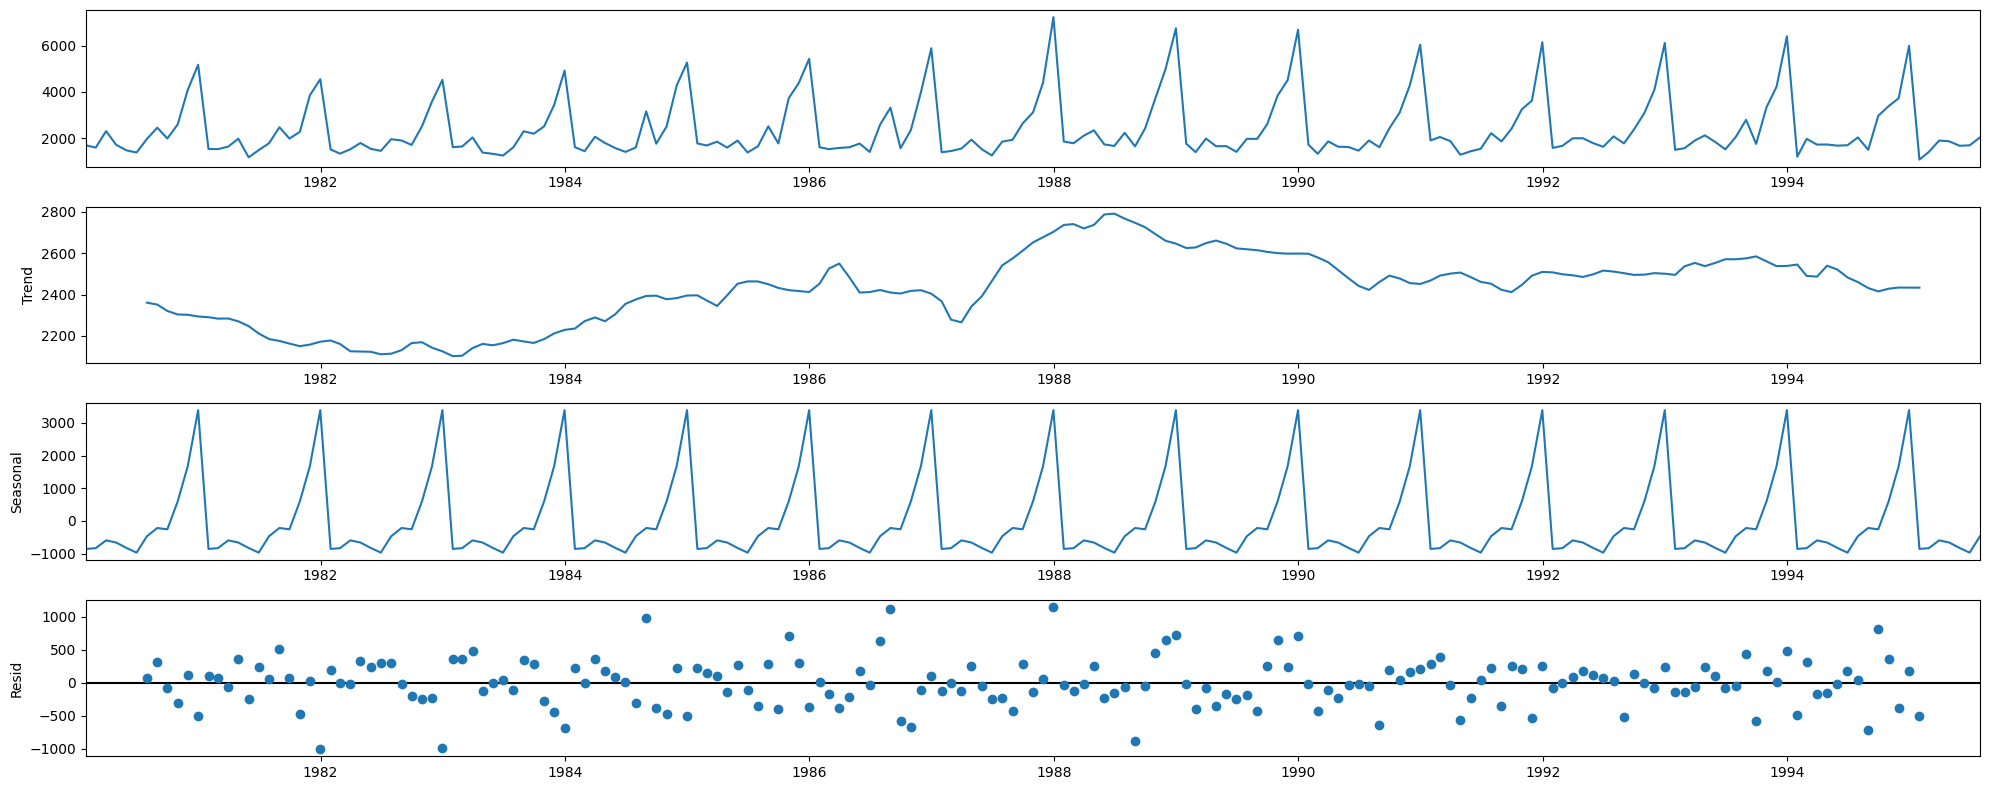

In [12]:
decomposition = seasonal_decompose(df,model='additive')
decomposition.plot();
plt.show()

We see that the residuals have a pattern in this decomposition.

In [13]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.353290


### Multiplicative Decomposition

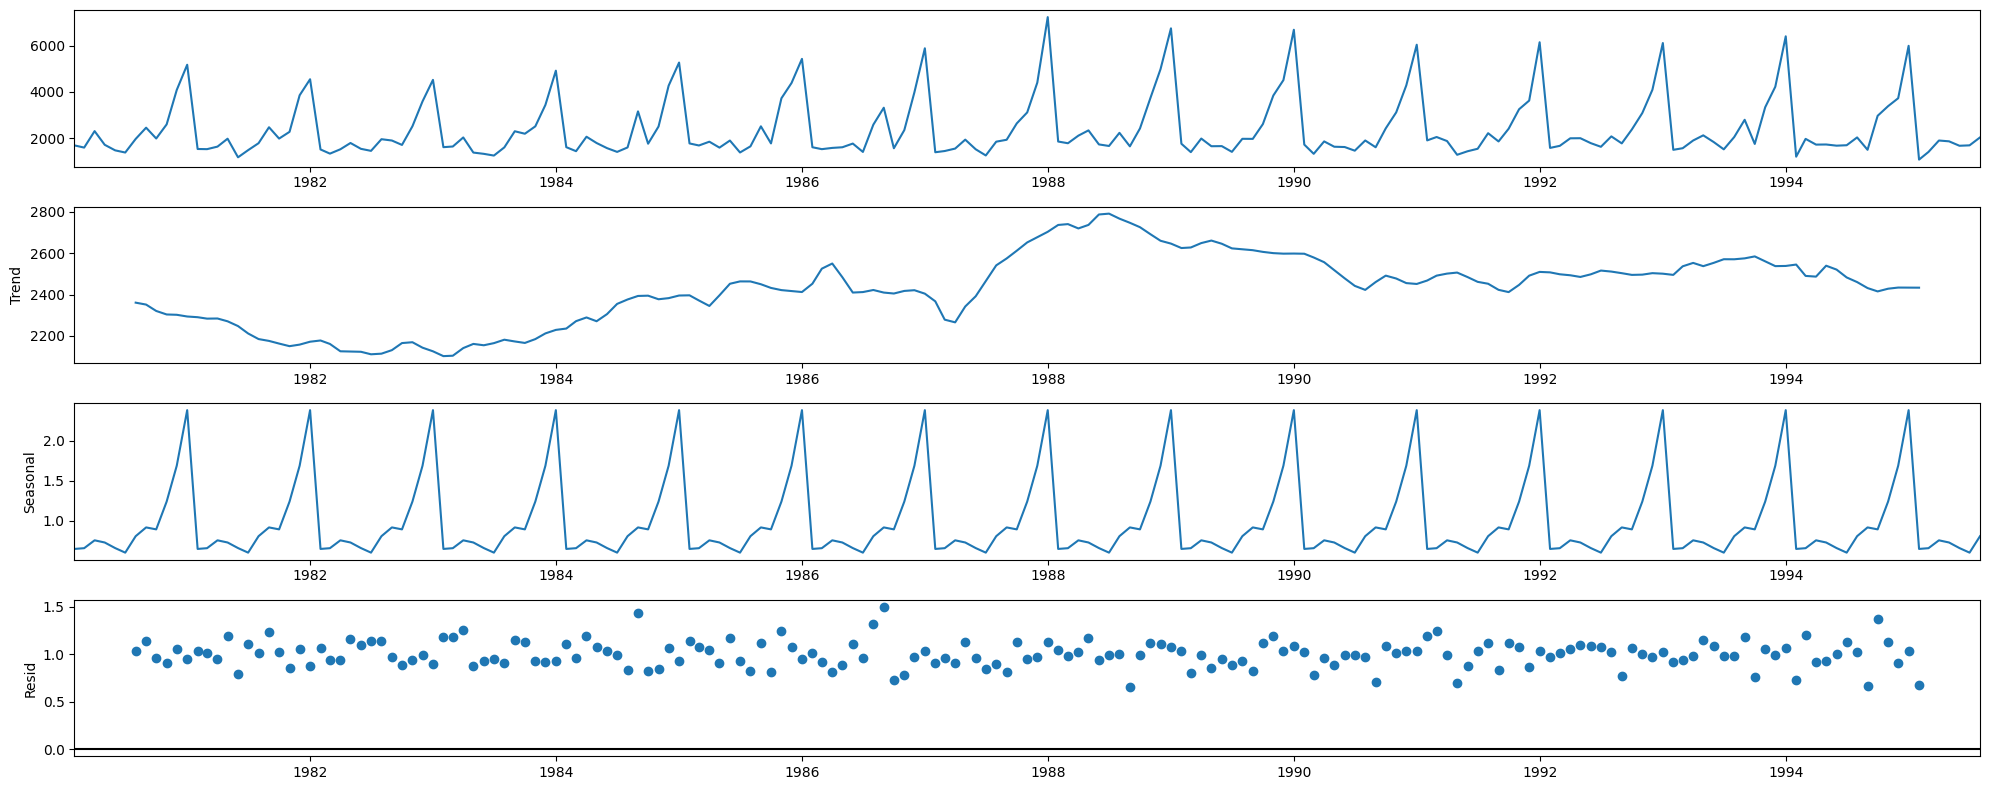

In [14]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();
plt.show()

In [15]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: resi

For the multiplicative series, we see that a lot of residuals are located around 1.

## Check for stationarity of the whole Time Series data.

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [16]:
from statsmodels.tsa.stattools import adfuller

In [17]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932397
Number of lags used 12


We see that at 5% significant level the Time Series is non-stationary.

There are various ways that Python allows us to select the appropriate number of lags at which we check whether the Time Series is stationary. To know more about the how to select the various ways, please refer to the link over $\href{https://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html}{here}$.

Let us take one level of differencing to see whether the series becomes stationary.

In [18]:
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[1])
print('DF test p-value is ' , dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is 0.000
DF test p-value is  0.0
Number of lags used 10


Now, let us go ahead and plot the stationary series.

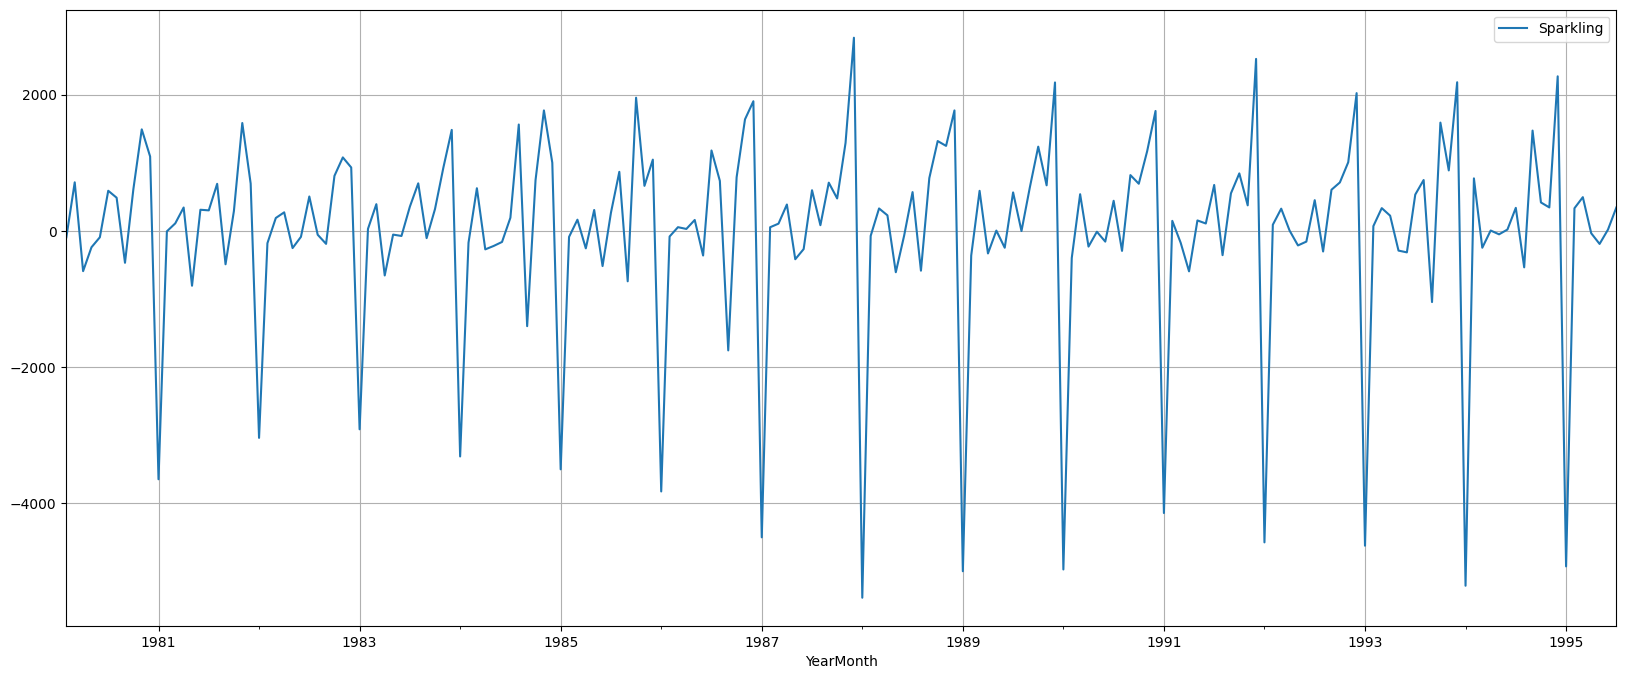

In [19]:
df.diff().dropna().plot(grid=True);
plt.show()

## Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

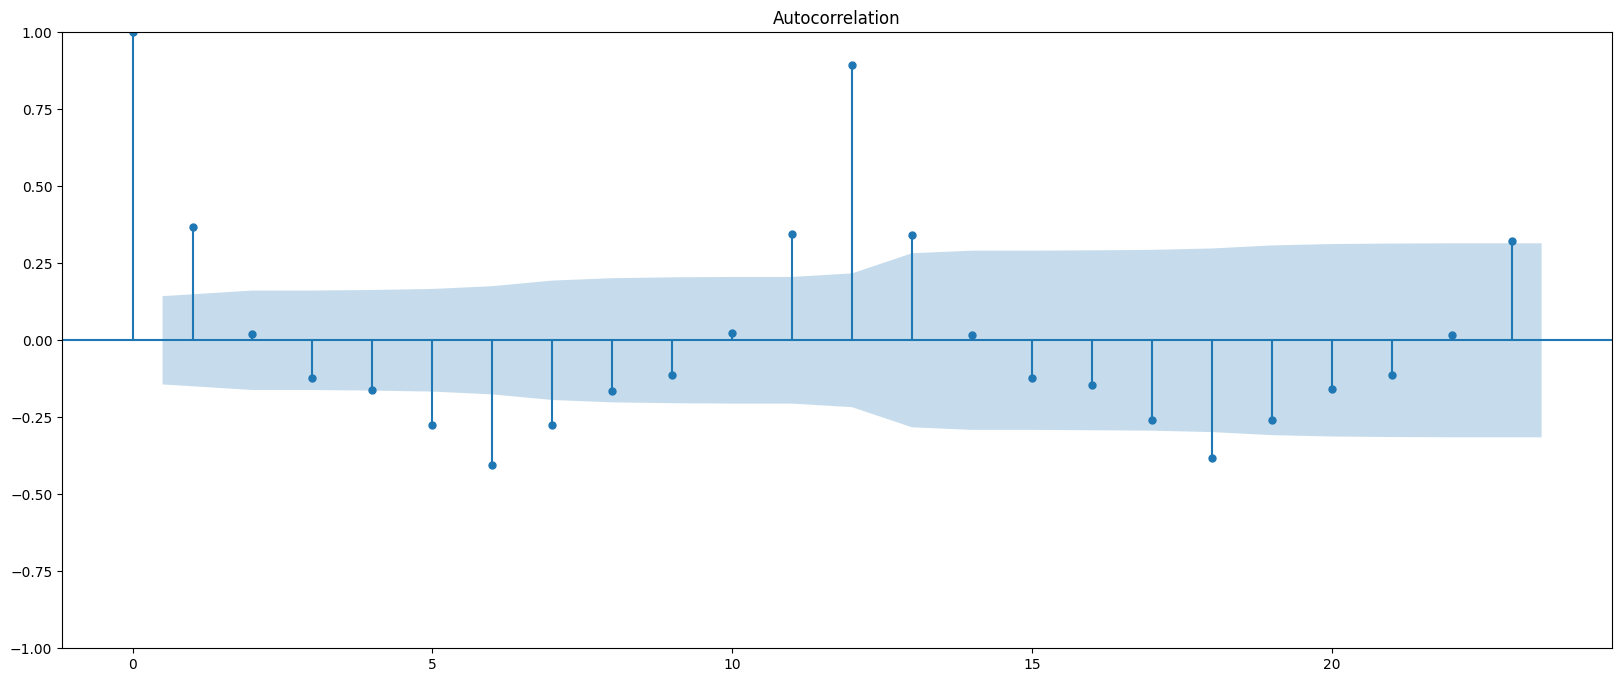

In [21]:
plot_acf(df,alpha=0.05);
plt.show()

From the above plots, we can say that there seems to be a seasonality in the data.

C:\Python\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


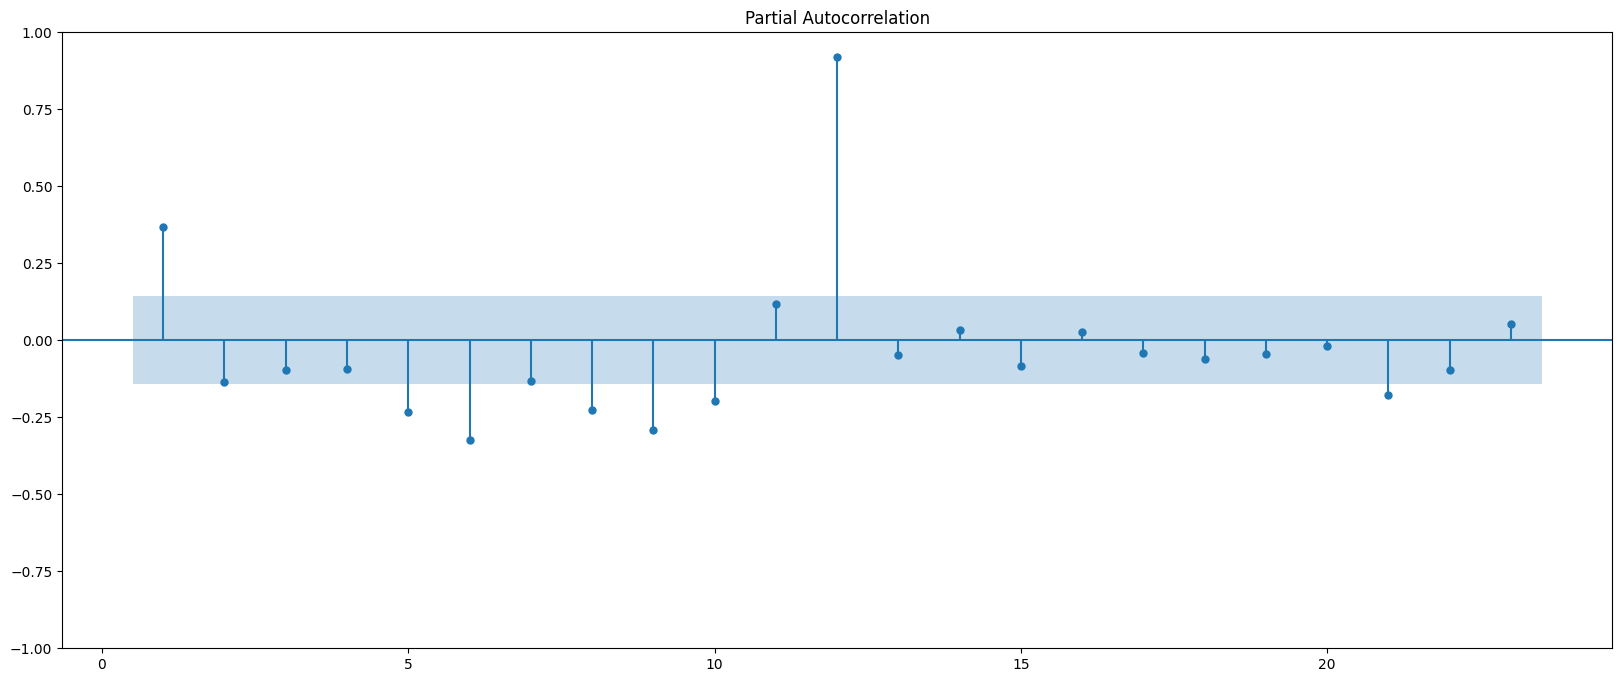

In [22]:
plot_pacf(df,zero=False,alpha=0.05);
plt.show()

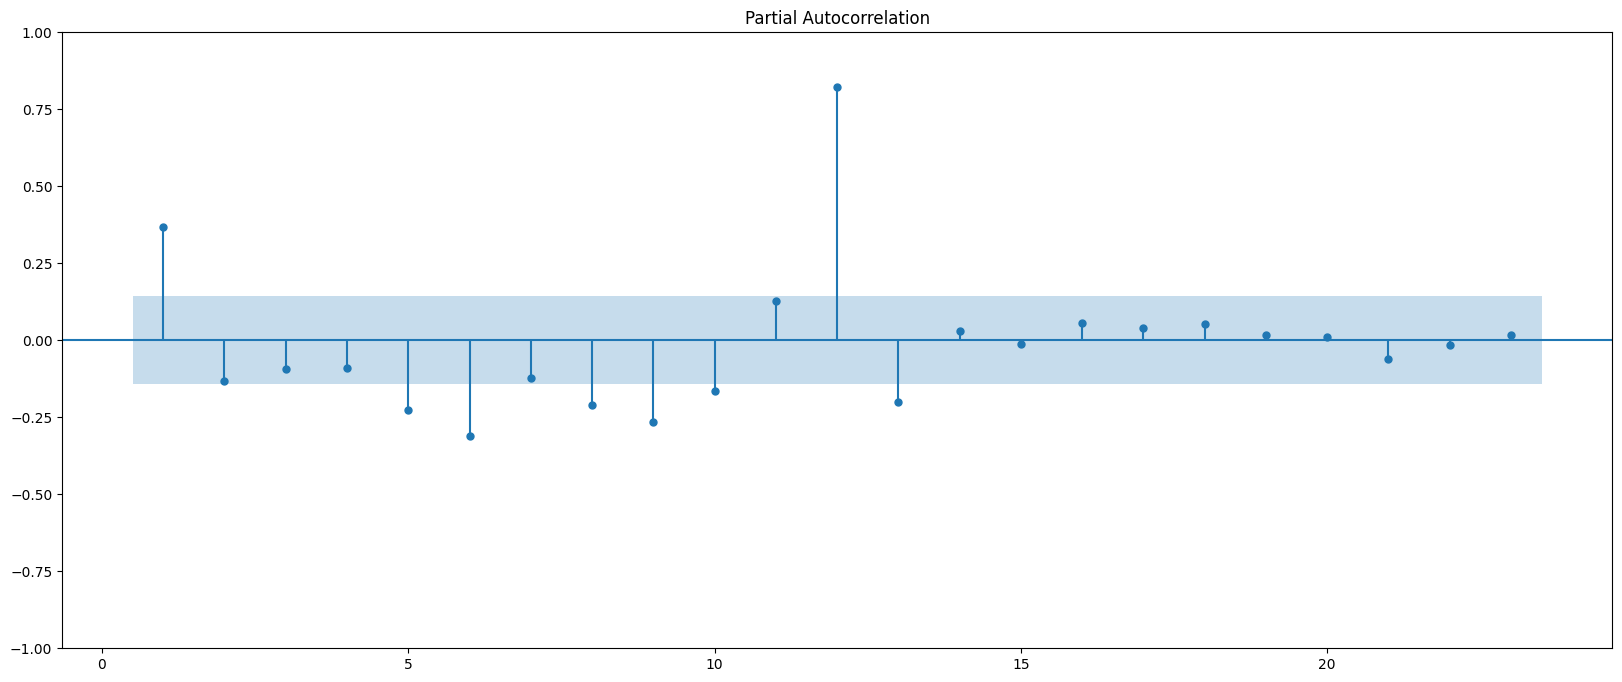

In [23]:
plot_pacf(df,zero=False,alpha=0.05,method='ywmle');
plt.show()

## Split the data into train and test and plot the training and test data.

Training Data is till the end of 2018. Test Data is from the beginning of 2019 to the last time stamp provided.

In [24]:
df.index.year.unique()

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995],
           dtype='int64', name='YearMonth')

In [25]:
train = df[df.index<='1990'] 
test = df[df.index>'1990']

In [26]:
# create class
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [27]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [28]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.04847975339291667,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2152.0542614313003,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [29]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1990-01-31    2814.808816
1990-02-28    2814.808816
1990-03-31    2814.808816
1990-04-30    2814.808816
1990-05-31    2814.808816
                 ...     
1995-03-31    2814.808816
1995-04-30    2814.808816
1995-05-31    2814.808816
1995-06-30    2814.808816
1995-07-31    2814.808816
Freq: M, Length: 67, dtype: float64

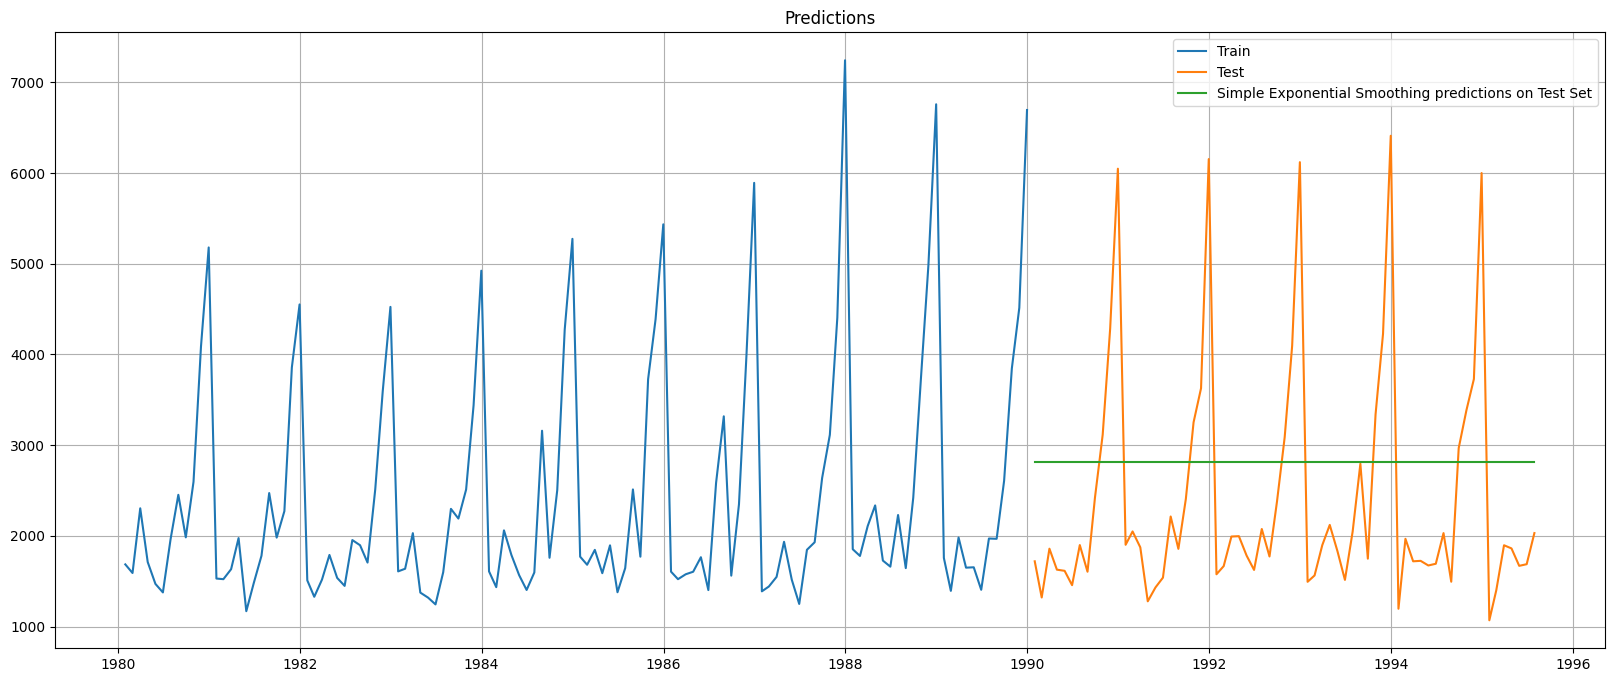

In [30]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Predictions');
plt.show()

In [31]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [32]:
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

SES RMSE: 1355.5576339593247
SES RMSE (calculated using statsmodels): 1355.557633959325


In [33]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['SES'])
resultsDf

Test RMSE
SES  1355.557634

In [34]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999998, 'initial_trend': 74.87272727272733, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [35]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test))
DES_predict

1990-01-31     5945.207026
1990-02-28     6019.622411
1990-03-31     6094.037795
1990-04-30     6168.453179
1990-05-31     6242.868563
                  ...     
1995-03-31    10558.960845
1995-04-30    10633.376230
1995-05-31    10707.791614
1995-06-30    10782.206998
1995-07-31    10856.622382
Freq: M, Length: 67, dtype: float64

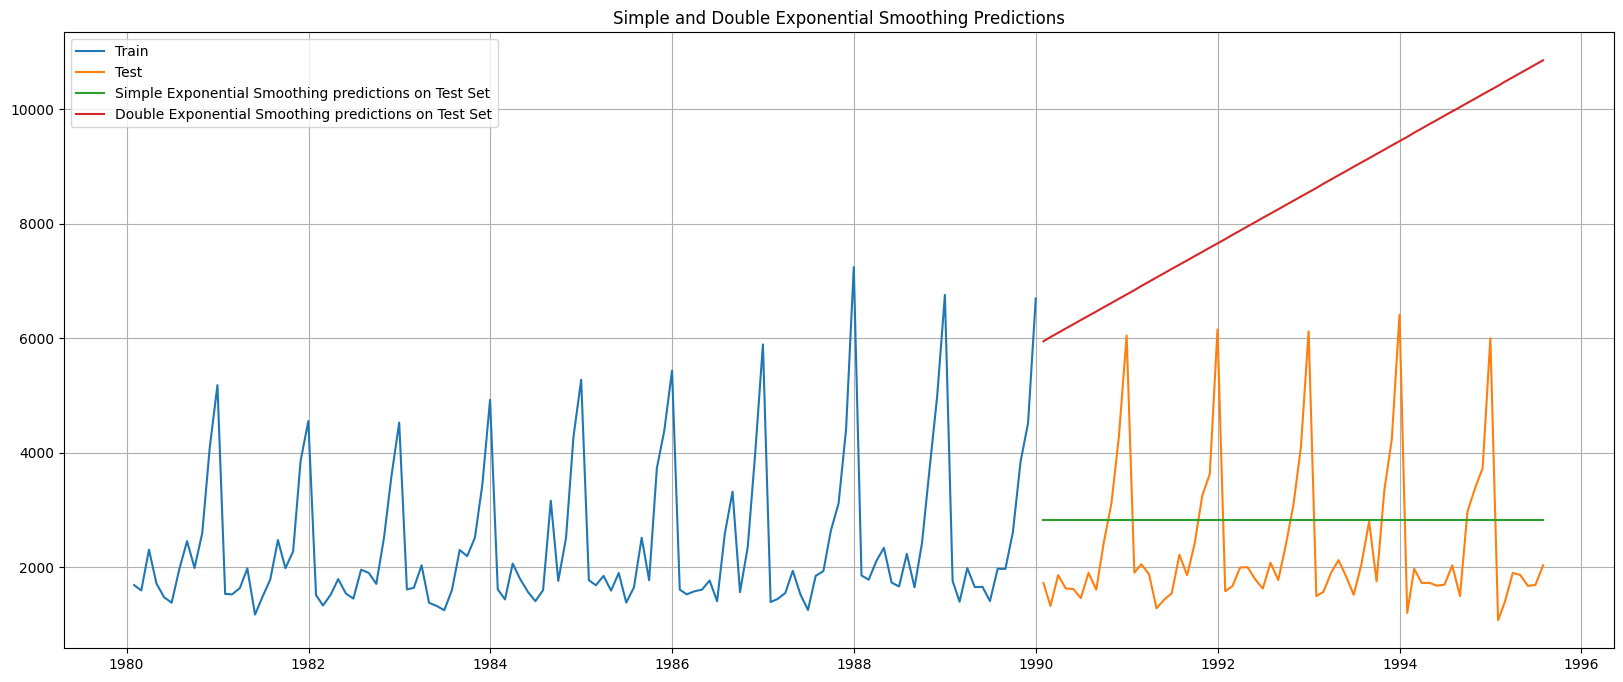

In [36]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');
plt.show()

In [37]:
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

DES RMSE: 6290.069981557959


In [38]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
SES  1355.557634
DES  6290.069982

In [39]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.0759640279371264, 'smoothing_trend': 0.04336101054036127, 'smoothing_seasonal': 0.47864368464705426, 'damping_trend': nan, 'initial_level': 2356.512698405284, 'initial_trend': -2.15237363936188, 'initial_seasons': array([-636.3713394 , -723.0906225 , -398.39409242, -473.5382789 ,
       -808.59758782, -815.51336094, -384.2643042 ,   73.12842207,
       -237.65218686,  272.25793688, 1541.69781336, 2590.31364122]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [40]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test))
TES_predict

1990-01-31    1775.786125
1990-02-28    1581.273220
1990-03-31    2001.744008
1990-04-30    1934.397147
1990-05-31    1756.117725
                 ...     
1995-03-31    2267.777382
1995-04-30    2200.430521
1995-05-31    2022.151099
1995-06-30    1815.190611
1995-07-31    2415.220513
Freq: M, Length: 67, dtype: float64

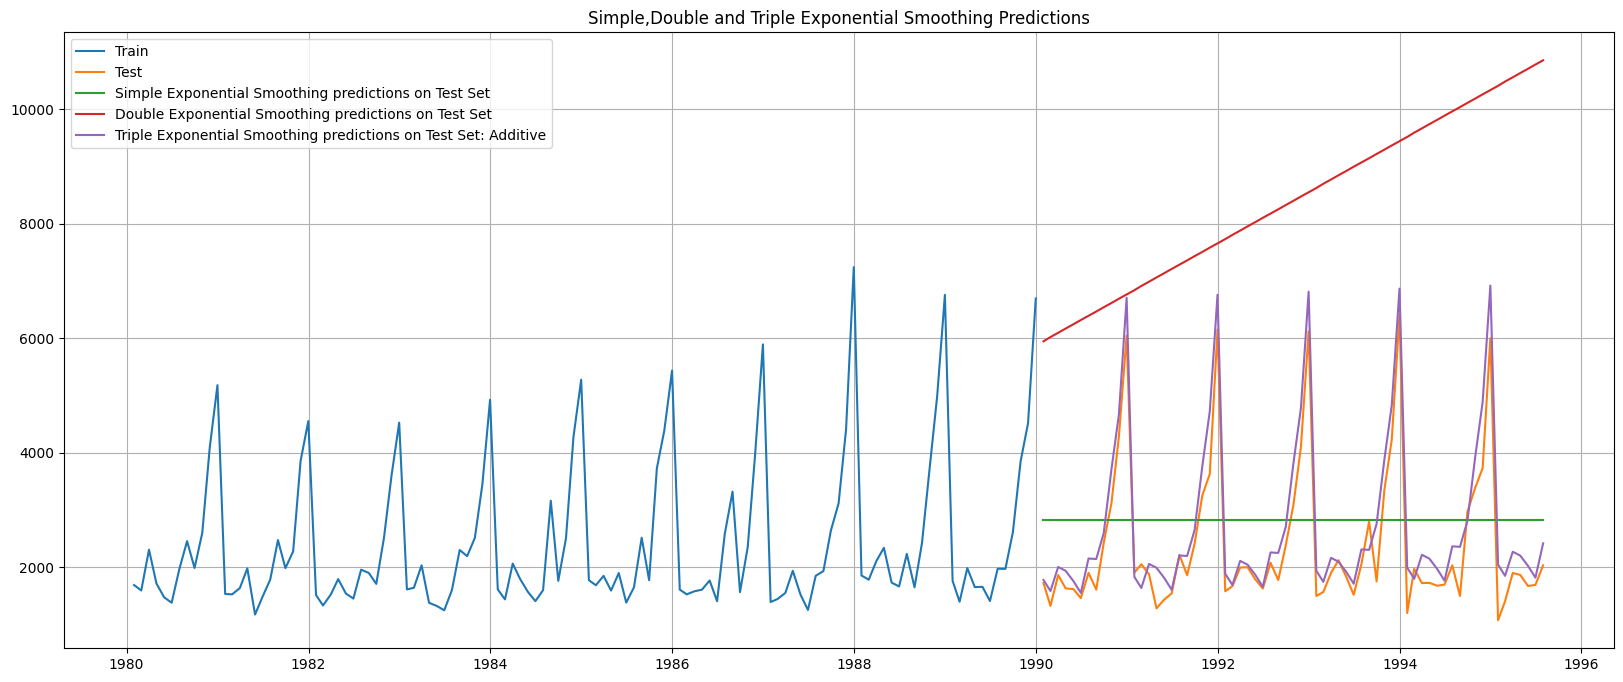

In [41]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Triple Exponential Smoothing predictions on Test Set: Additive')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');
plt.show()

In [42]:
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

TES RMSE: 473.8710246012678


In [43]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
SES  1355.557634
DES  6290.069982
TES   473.871025

In [44]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.07569902291934616, 'smoothing_trend': 0.06488708837787201, 'smoothing_seasonal': 0.30803660340080713, 'damping_trend': nan, 'initial_level': 2356.499891168232, 'initial_trend': -13.236336129547544, 'initial_seasons': array([0.71629328, 0.68549666, 0.8975794 , 0.80530055, 0.65656175,
       0.64725986, 0.87806682, 1.13921336, 0.91790558, 1.22969087,
       1.90962736, 2.44918653]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [45]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test))
TES_predict_am

1990-01-31    1771.777418
1990-02-28    1620.773612
1990-03-31    1993.414993
1990-04-30    1948.620414
1990-05-31    1743.452507
                 ...     
1995-03-31    2139.436126
1995-04-30    2091.186212
1995-05-31    1870.852375
1995-06-30    1626.902628
1995-07-31    2289.542233
Freq: M, Length: 67, dtype: float64

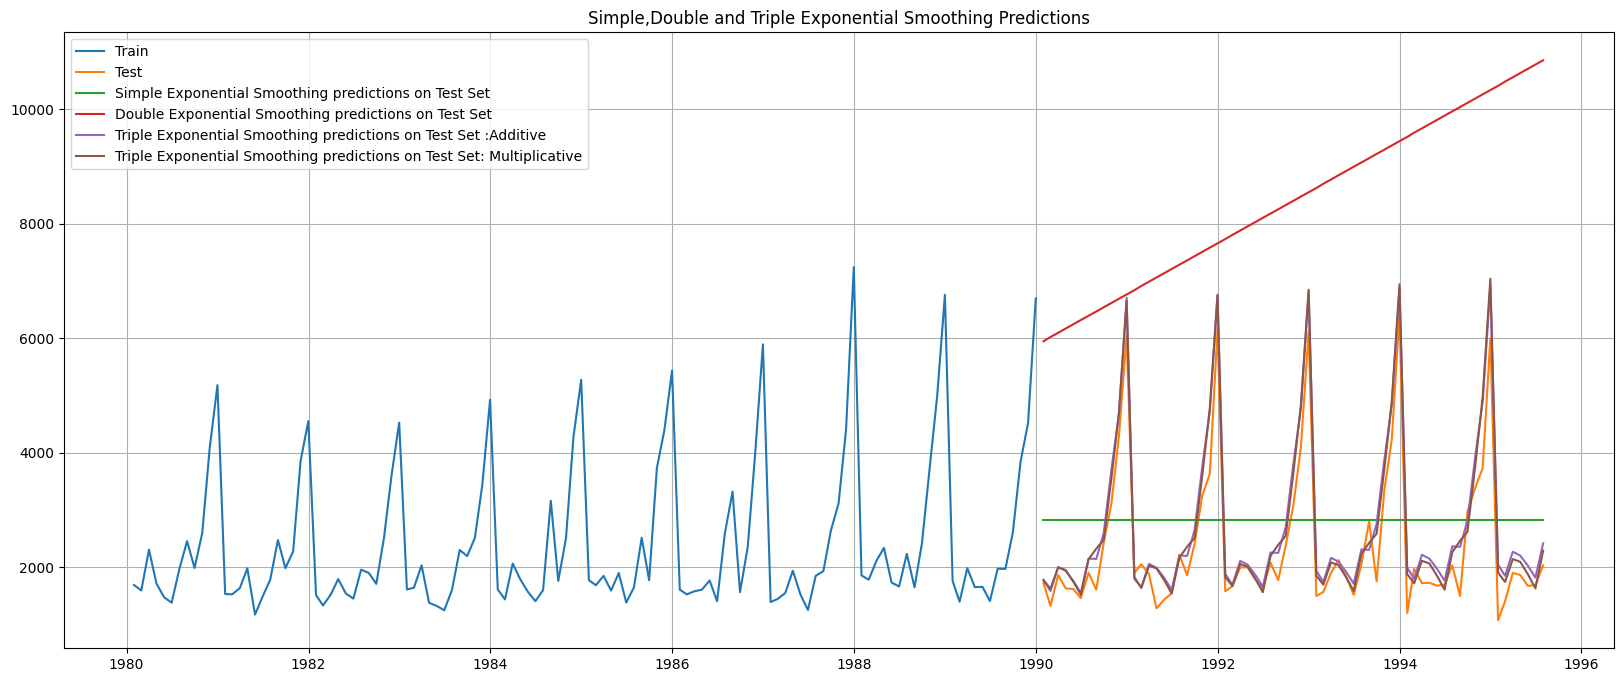

In [46]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Triple Exponential Smoothing predictions on Test Set :Additive')
plt.plot(TES_predict_am, label='Triple Exponential Smoothing predictions on Test Set: Multiplicative')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');
plt.show()

In [47]:
print('TES_am RMSE:',mean_squared_error(test.values,TES_predict_am.values,squared=False))

TES_am RMSE: 455.3605022077333


In [48]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict_am.values,squared=False)]}
                           ,index=['TES:Multiplicative'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
SES                 1355.557634
DES                 6290.069982
TES                  473.871025
TES:Multiplicative   455.360502

In [49]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [50]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


Sparkling
YearMonth            
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

Last few rows of Training Data


Sparkling
YearMonth            
1989-08-31       1968
1989-09-30       2608
1989-10-31       3845
1989-11-30       4514
1989-12-31       6694

First few rows of Test Data


Sparkling
YearMonth            
1990-01-31       1720
1990-02-28       1321
1990-03-31       1859
1990-04-30       1628
1990-05-31       1615

Last few rows of Test Data


Sparkling
YearMonth            
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [51]:
print(train.shape)
print(test.shape)

(120, 1)
(67, 1)


## Check for stationarity of the Training Data Time Series.

Let us plot the training data once.

In [52]:
train.plot(grid=True);

In [53]:
dftest = adfuller(train,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.710
DF test p-value is 0.23197916198156393
Number of lags used 12


The training data is non-stationary at 95% confidence level. Let us take a first level of differencing to stationarize the Time Series.

In [54]:
dftest = adfuller(train.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -7.794
DF test p-value is 2.1438260690703056e-10
Number of lags used 11


Now, let us go ahead and plot the differenced training data.

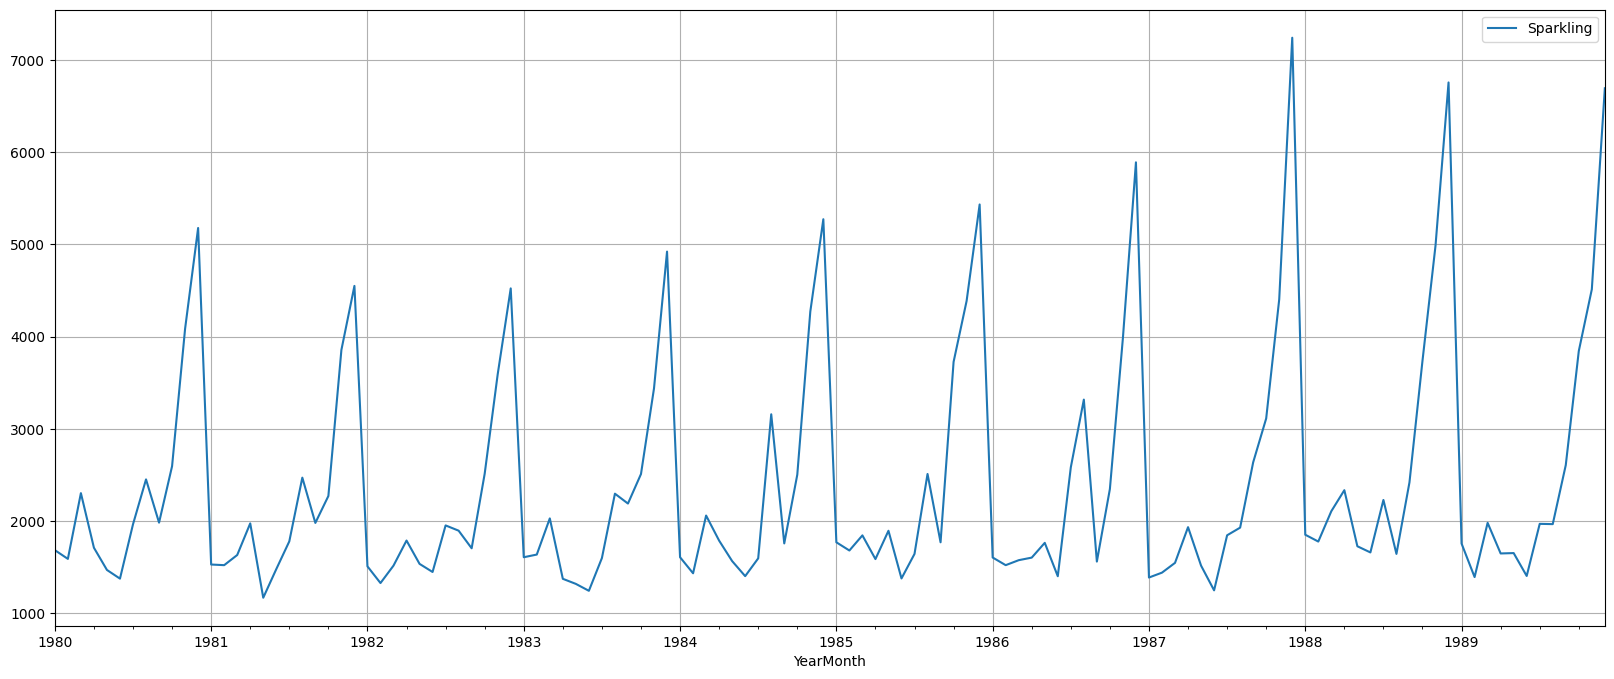

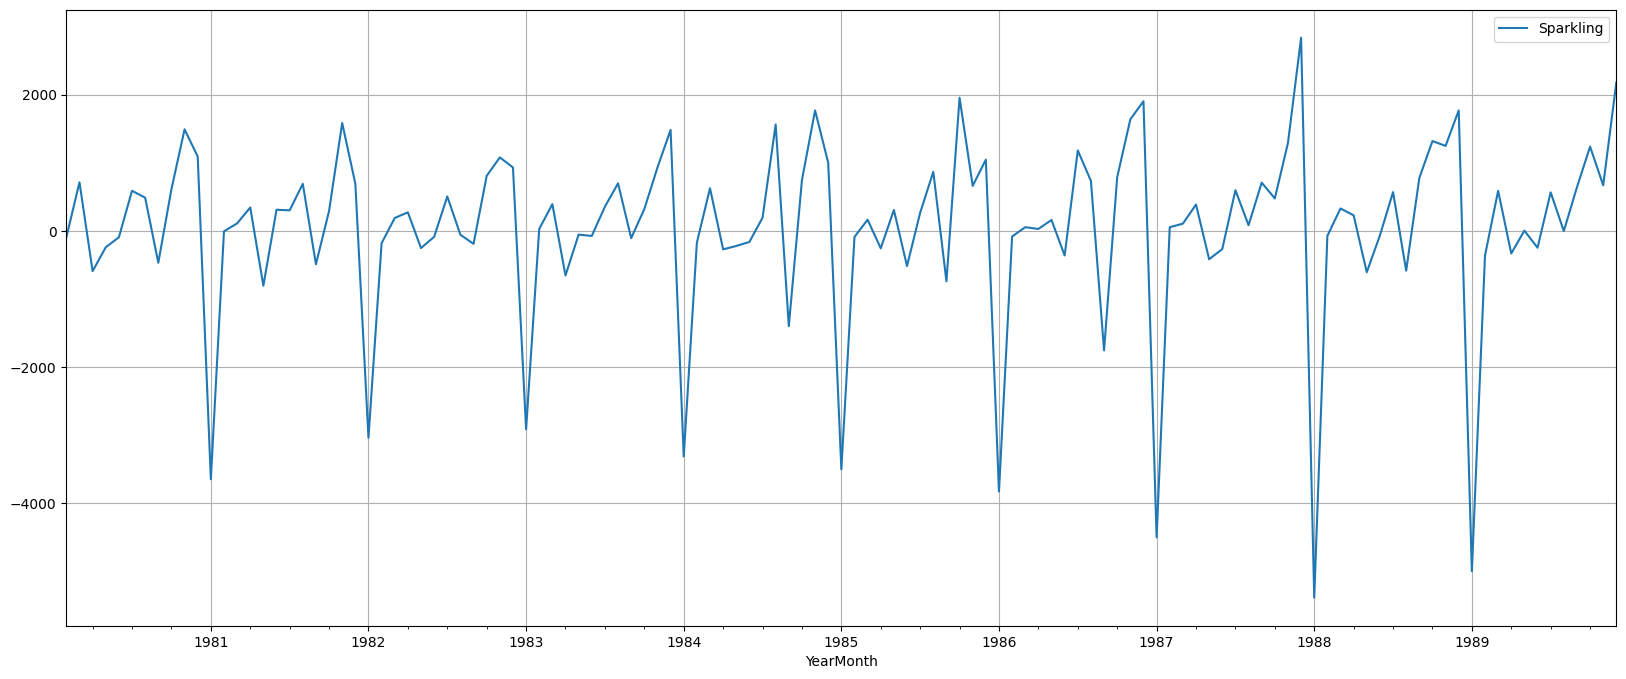

In [55]:
train.diff().dropna().plot(grid=True);
plt.show()

##### Note: If the series is non-stationary, stationarize the Time Series by taking a difference of the Time Series. Then we can use this particular differenced series to train the ARIMA models. We do not need to worry about stationarity for the Test Data because we are not building any models on the Test Data, we are evaluating our models over there. You can look at other kinds of transformations as part of making the time series stationary like taking logarithms.

In [56]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 1980-01-31 to 1989-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  120 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB


## Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

##### Note: The data has some seasonality so ideally we should build a SARIMA model. But for demonstration purposes we are building an ARIMA model both by looking at the minimum AIC criterion and by looking at the ACF and the PACF plots.

In [57]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [58]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [59]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train['Sparkling'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:2055.631381049316
ARIMA(0, 1, 1) - AIC:2051.9544902475427
ARIMA(0, 1, 2) - AIC:2028.98484427821
ARIMA(0, 1, 3) - AIC:2028.2682575525694
ARIMA(1, 1, 0) - AIC:2055.080486044188
ARIMA(1, 1, 1) - AIC:2029.8064955380996


C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1, 1, 2) - AIC:2029.0547440003465
ARIMA(1, 1, 3) - AIC:2029.4010535182588
ARIMA(2, 1, 0) - AIC:2049.01575119454
ARIMA(2, 1, 1) - AIC:2027.8725648562774


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 1, 2) - AIC:2012.6661866593151


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 1, 3) - AIC:2025.1526118629108
ARIMA(3, 1, 0) - AIC:2046.6927684605473
ARIMA(3, 1, 1) - AIC:2048.6305109530085


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) - AIC:2025.7290534859496
ARIMA(3, 1, 3) - AIC:2016.3722986360765


In [60]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
10  (2, 1, 2)  2012.666187
15  (3, 1, 3)  2016.372299
11  (2, 1, 3)  2025.152612
14  (3, 1, 2)  2025.729053
9   (2, 1, 1)  2027.872565

In [61]:
auto_ARIMA = ARIMA(train, order=(2,1,2))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  120
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1001.333
Date:                Wed, 25 May 2022   AIC                           2012.666
Time:                        23:32:05   BIC                           2026.562
Sample:                    01-31-1980   HQIC                          2018.309
                         - 12-31-1989                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3149      0.050     26.110      0.000       1.216       1.414
ar.L2         -0.5712      0.089     -6.405      0.000      -0.746      -0.396
ma.L1         -1.9391      0.054    -35.639      0.0

C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


Diagnostics plot.

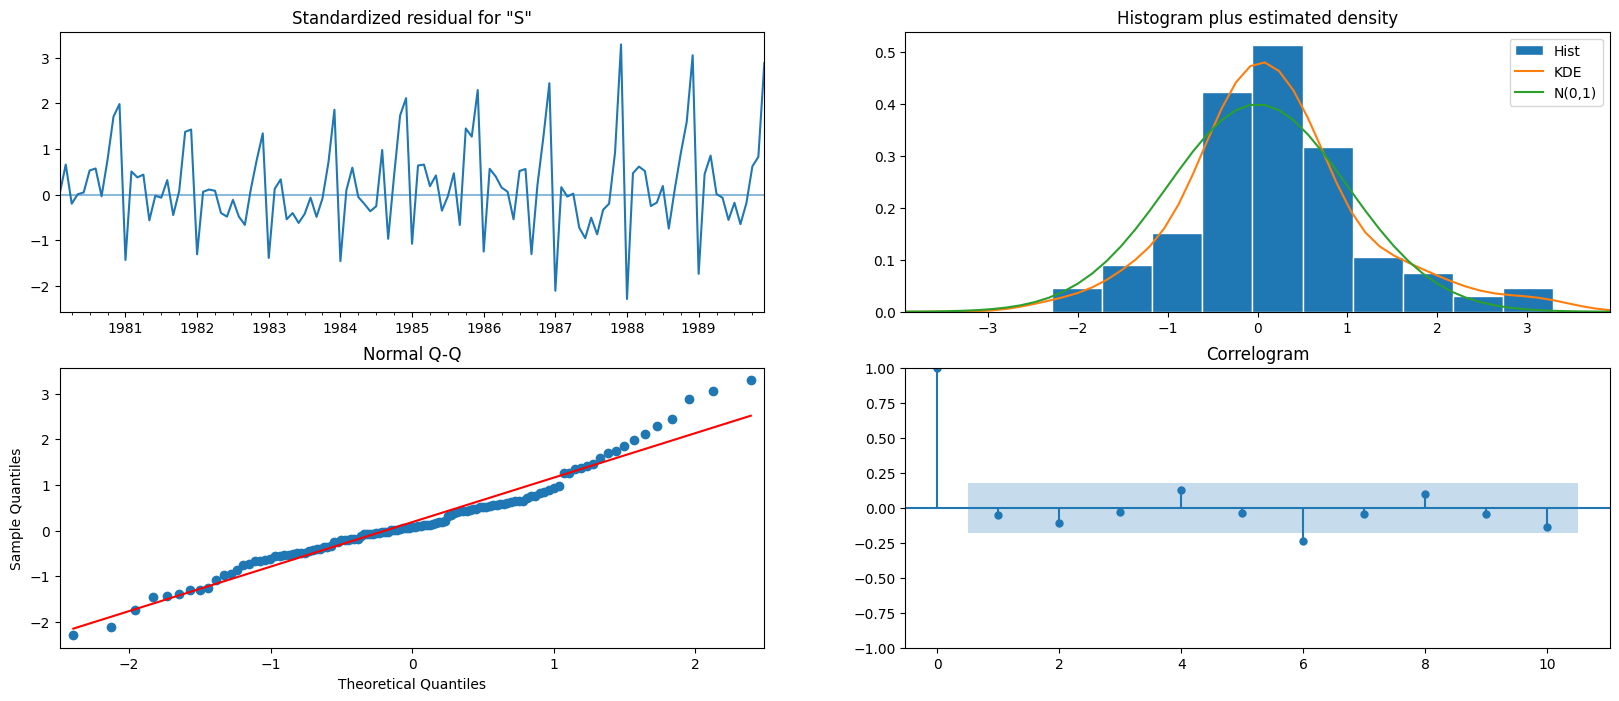

In [62]:
results_auto_ARIMA.plot_diagnostics();
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [63]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [64]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [65]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 1339.707780772704 
MAPE: 53.17286957256633


In [66]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])

resultsDf

RMSE      MAPE
ARIMA(2,1,2)  1339.707781  53.17287

## Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

Let us look at the ACF and the PACF plots once more.

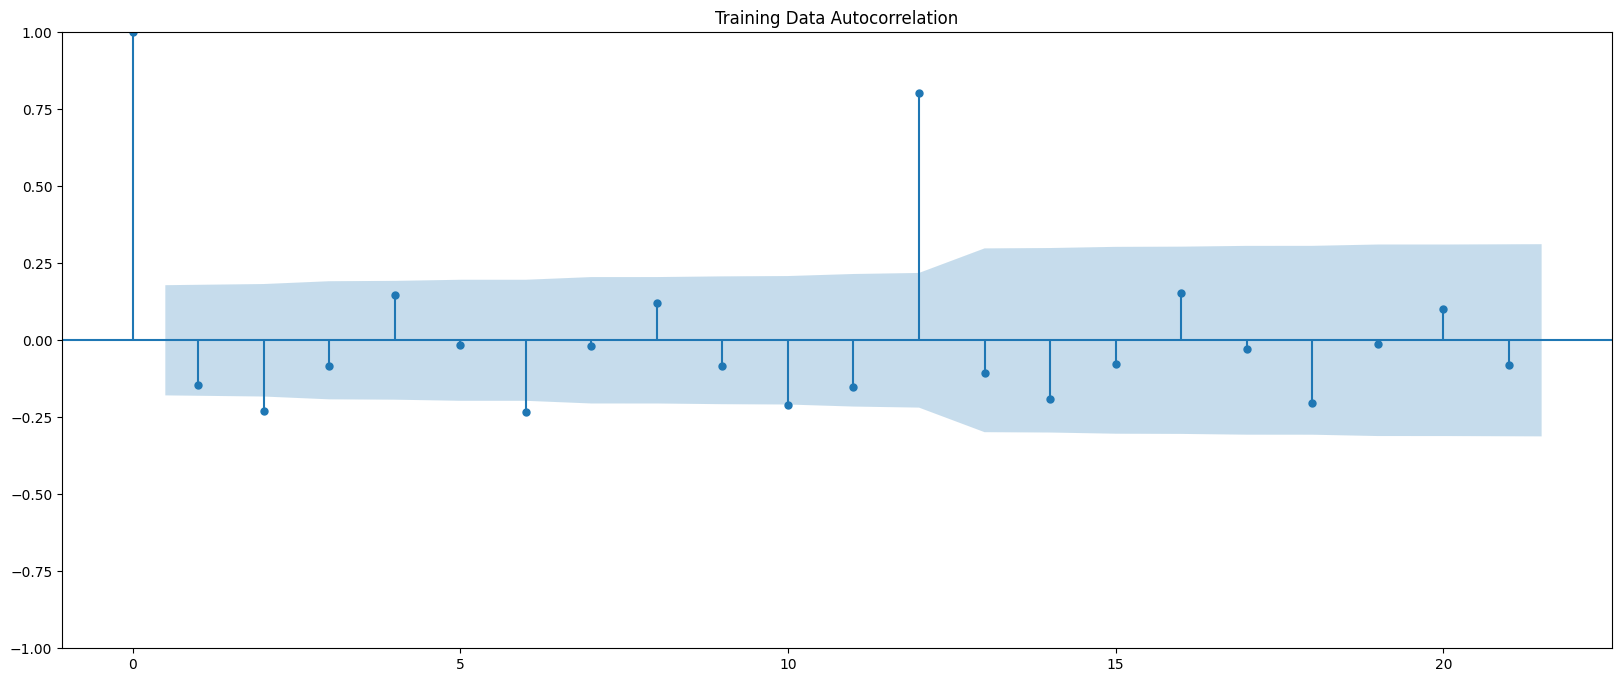

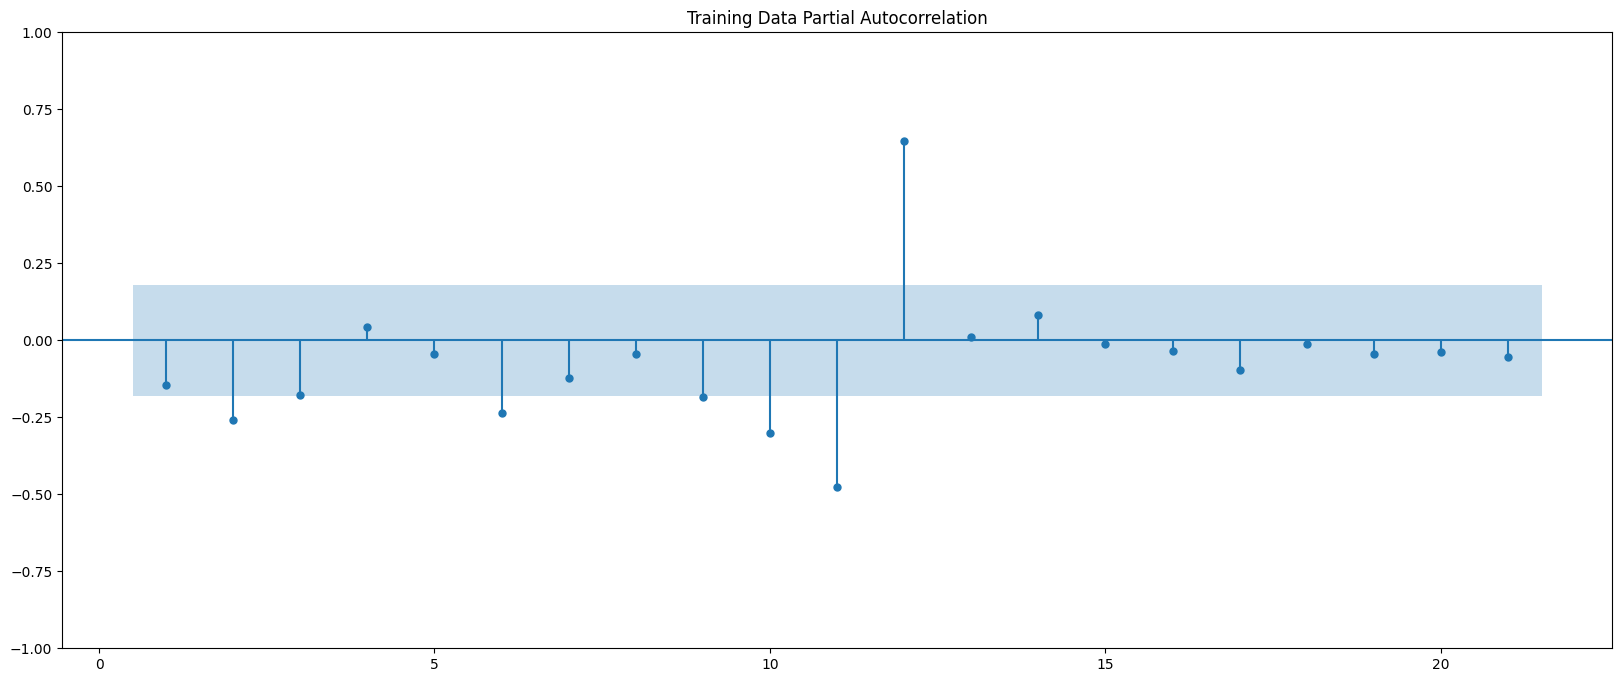

In [67]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 0.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 0.

By looking at the above plots, we will take the value of p and q to be 0 and 0 respectively.

In [68]:
manual_ARIMA = ARIMA(train['Sparkling'], order=(0,1,0),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  120
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -1026.816
Date:                Wed, 25 May 2022   AIC                           2055.631
Time:                        23:32:08   BIC                           2058.411
Sample:                    01-31-1980   HQIC                          2056.760
                         - 12-31-1989                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.814e+06   1.32e+05     13.795      0.000    1.56e+06    2.07e+06
Ljung-Box (L1) (Q):                   2.56   Jarque-Bera (JB):               170.25
Prob(Q):                              0.11   Pr

C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


Let us analyse the residuals from the various diagnostics plot.

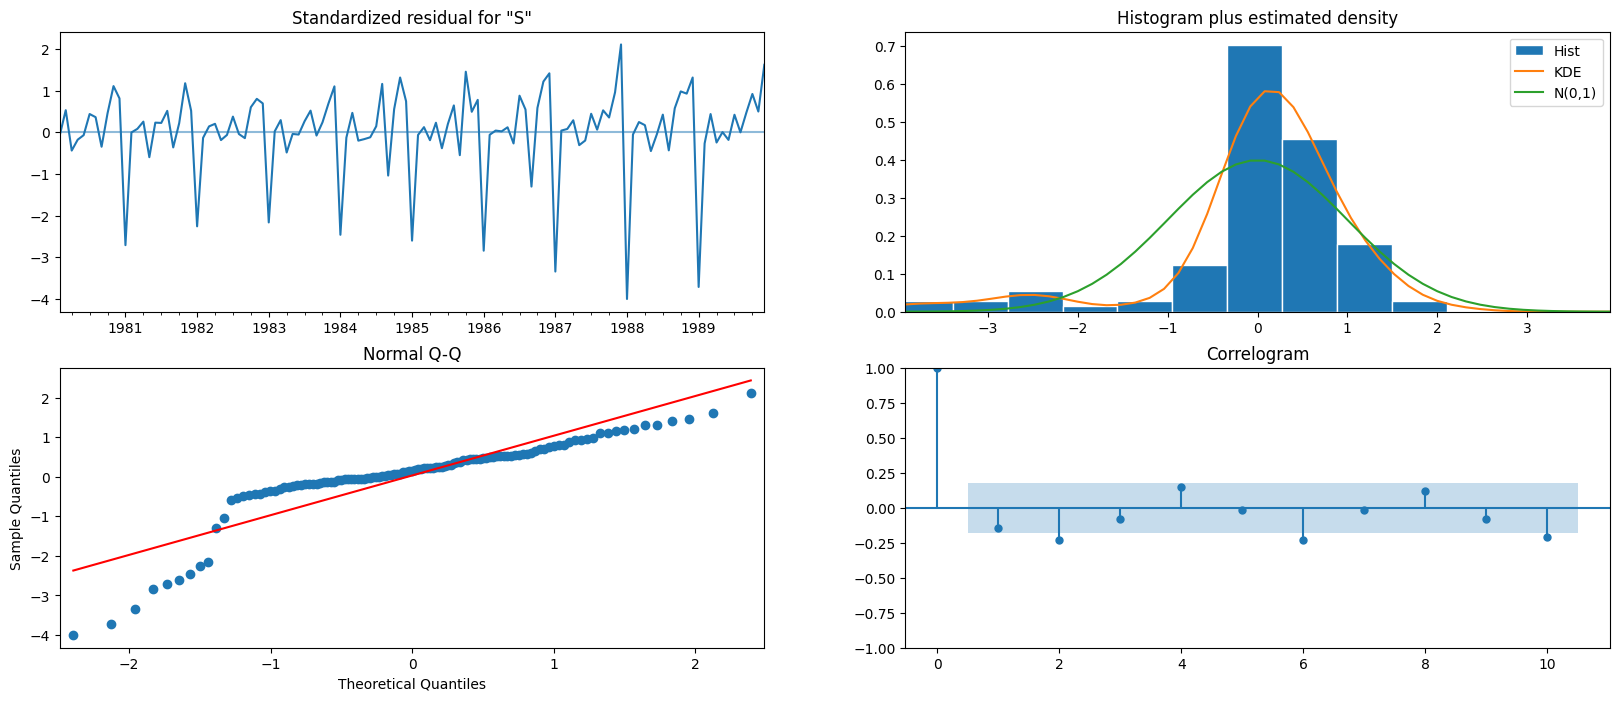

In [69]:
results_manual_ARIMA.plot_diagnostics();
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [70]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

In [71]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 4482.0589651592245 
MAPE: 234.2664136586651


In [72]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(0,1,0)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE        MAPE
ARIMA(2,1,2)  1339.707781   53.172870
ARIMA(0,1,0)  4482.058965  234.266414

## Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

Let us look at the ACF plot once more to understand the seasonal parameter for the SARIMA model.

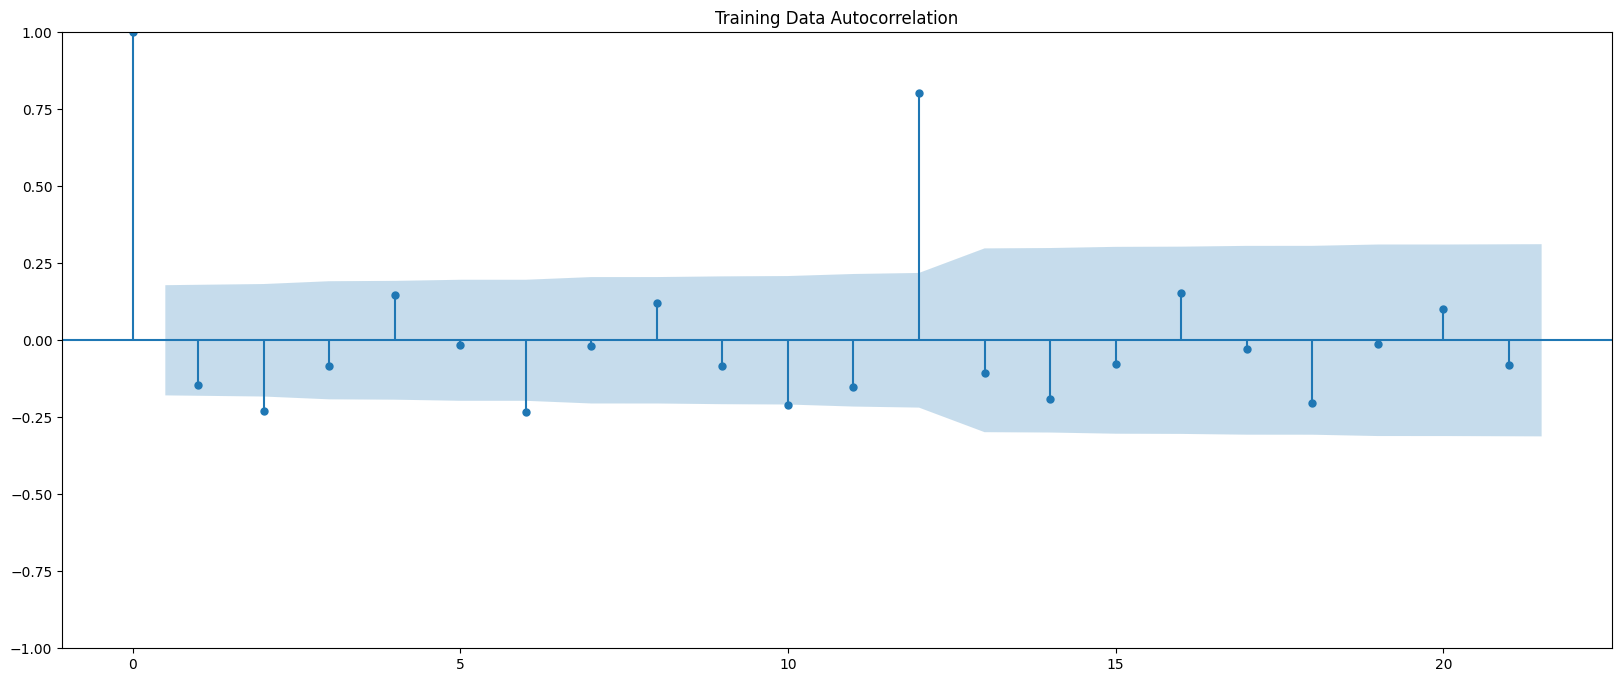

In [73]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop');
plt.show()

We can see that there is a seasonality.

In [74]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 4)
Model: (0, 1, 2)(0, 0, 2, 4)
Model: (0, 1, 3)(0, 0, 3, 4)
Model: (1, 1, 0)(1, 0, 0, 4)
Model: (1, 1, 1)(1, 0, 1, 4)
Model: (1, 1, 2)(1, 0, 2, 4)
Model: (1, 1, 3)(1, 0, 3, 4)
Model: (2, 1, 0)(2, 0, 0, 4)
Model: (2, 1, 1)(2, 0, 1, 4)
Model: (2, 1, 2)(2, 0, 2, 4)
Model: (2, 1, 3)(2, 0, 3, 4)
Model: (3, 1, 0)(3, 0, 0, 4)
Model: (3, 1, 1)(3, 0, 1, 4)
Model: (3, 1, 2)(3, 0, 2, 4)
Model: (3, 1, 3)(3, 0, 3, 4)


In [75]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [76]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 4) - AIC:2039.365905379547
SARIMA(0, 1, 0)x(0, 0, 1, 4) - AIC:1972.9866501726879
SARIMA(0, 1, 0)x(0, 0, 2, 4) - AIC:1878.463525393977
SARIMA(0, 1, 0)x(0, 0, 3, 4) - AIC:1756.155435122501
SARIMA(0, 1, 0)x(1, 0, 0, 4) - AIC:1989.3936686392622
SARIMA(0, 1, 0)x(1, 0, 1, 4) - AIC:1943.223942041018
SARIMA(0, 1, 0)x(1, 0, 2, 4) - AIC:1827.6205881640647
SARIMA(0, 1, 0)x(1, 0, 3, 4) - AIC:1760.1996105731403
SARIMA(0, 1, 0)x(2, 0, 0, 4) - AIC:1924.7013271417045
SARIMA(0, 1, 0)x(2, 0, 1, 4) - AIC:1885.3316156884882
SARIMA(0, 1, 0)x(2, 0, 2, 4) - AIC:1824.582504020653
SARIMA(0, 1, 0)x(2, 0, 3, 4) - AIC:1733.31884646206
SARIMA(0, 1, 0)x(3, 0, 0, 4) - AIC:1664.8981277496773
SARIMA(0, 1, 0)x(3, 0, 1, 4) - AIC:1666.8430081614936
SARIMA(0, 1, 0)x(3, 0, 2, 4) - AIC:1661.599887241507
SARIMA(0, 1, 0)x(3, 0, 3, 4) - AIC:1628.664725291356
SARIMA(0, 1, 1)x(0, 0, 0, 4) - AIC:2019.073039146126
SARIMA(0, 1, 1)x(0, 0, 1, 4) - AIC:1954.8686850930198
SARIMA(0, 1, 1)x(0, 0, 2, 4) - AIC:184

In [77]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
255  (3, 1, 3)  (3, 0, 3, 4)  1532.703232
63   (0, 1, 3)  (3, 0, 3, 4)  1534.726268
127  (1, 1, 3)  (3, 0, 3, 4)  1535.121149
191  (2, 1, 3)  (3, 0, 3, 4)  1536.910520
251  (3, 1, 3)  (2, 0, 3, 4)  1541.039257

In [78]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(3, 1, 3),
                                seasonal_order=(3, 0, 3, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  120
Model:             SARIMAX(3, 1, 3)x(3, 0, 3, 4)   Log Likelihood                -753.352
Date:                           Wed, 25 May 2022   AIC                           1532.703
Time:                                   23:35:30   BIC                           1566.955
Sample:                               01-31-1980   HQIC                          1546.576
                                    - 12-31-1989                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.7540      0.119    -14.771      0.000      -1.987      -1.521
ar.L2         -0.9075      0.200     -4.543

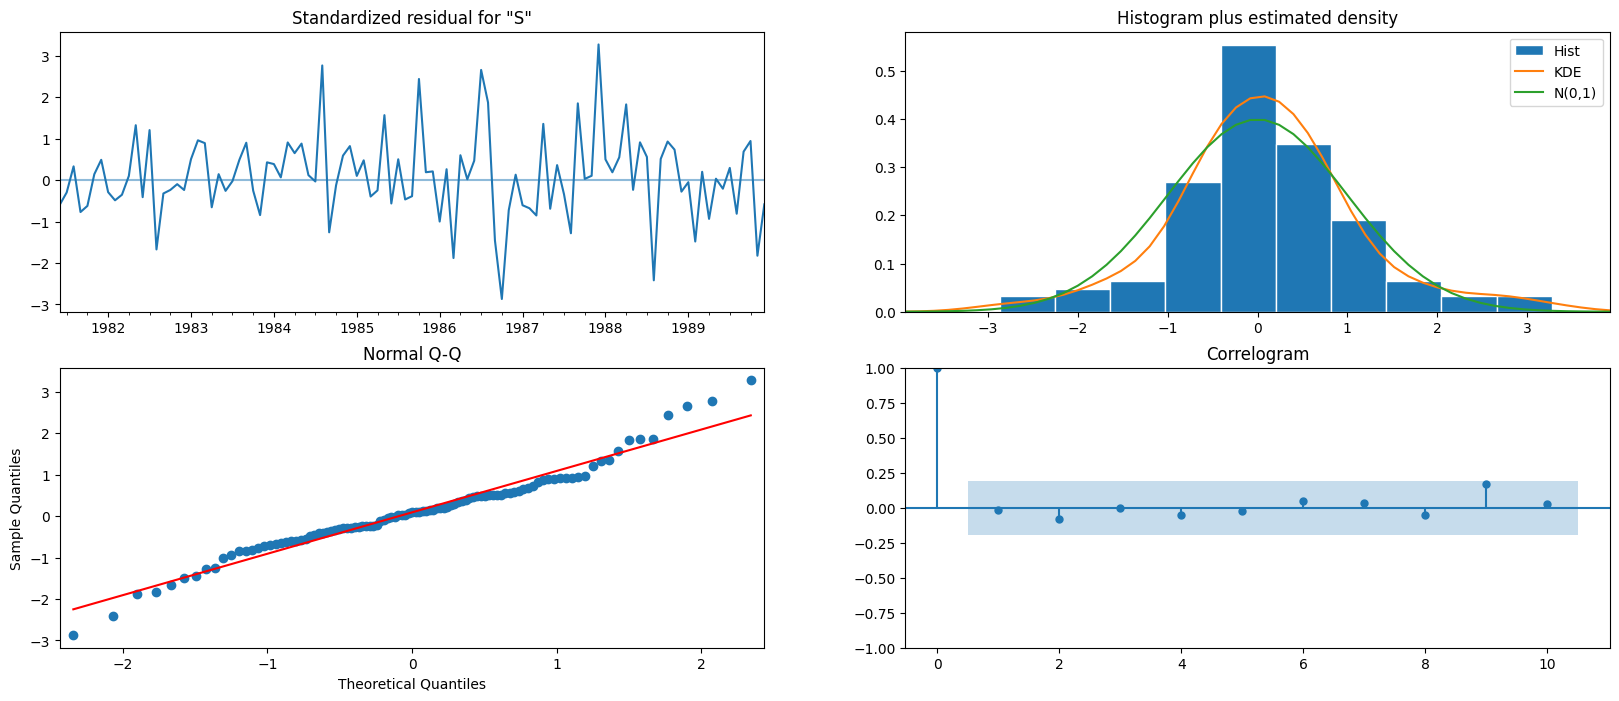

In [79]:
results_auto_SARIMA.plot_diagnostics();
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [80]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test))

In [81]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1990-01-31  1926.868521  333.049088    1274.104302    2579.632739
1990-02-28  1560.241469  339.152470     895.514843    2224.968095
1990-03-31  2067.762725  339.648927    1402.063060    2733.462390
1990-04-30  1764.693361  345.646681    1087.238315    2442.148407
1990-05-31  1663.671394  345.760915     985.992454    2341.350335

In [82]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 852.8357266418334 
MAPE: 21.466912378166615


In [83]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(3,1,3)(3,0,3,4)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE        MAPE
ARIMA(2,1,2)            1339.707781   53.172870
ARIMA(0,1,0)            4482.058965  234.266414
SARIMA(3,1,3)(3,0,3,4)   852.835727   21.466912

## Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 4.

Let us look at the ACF and the PACF plots once more.

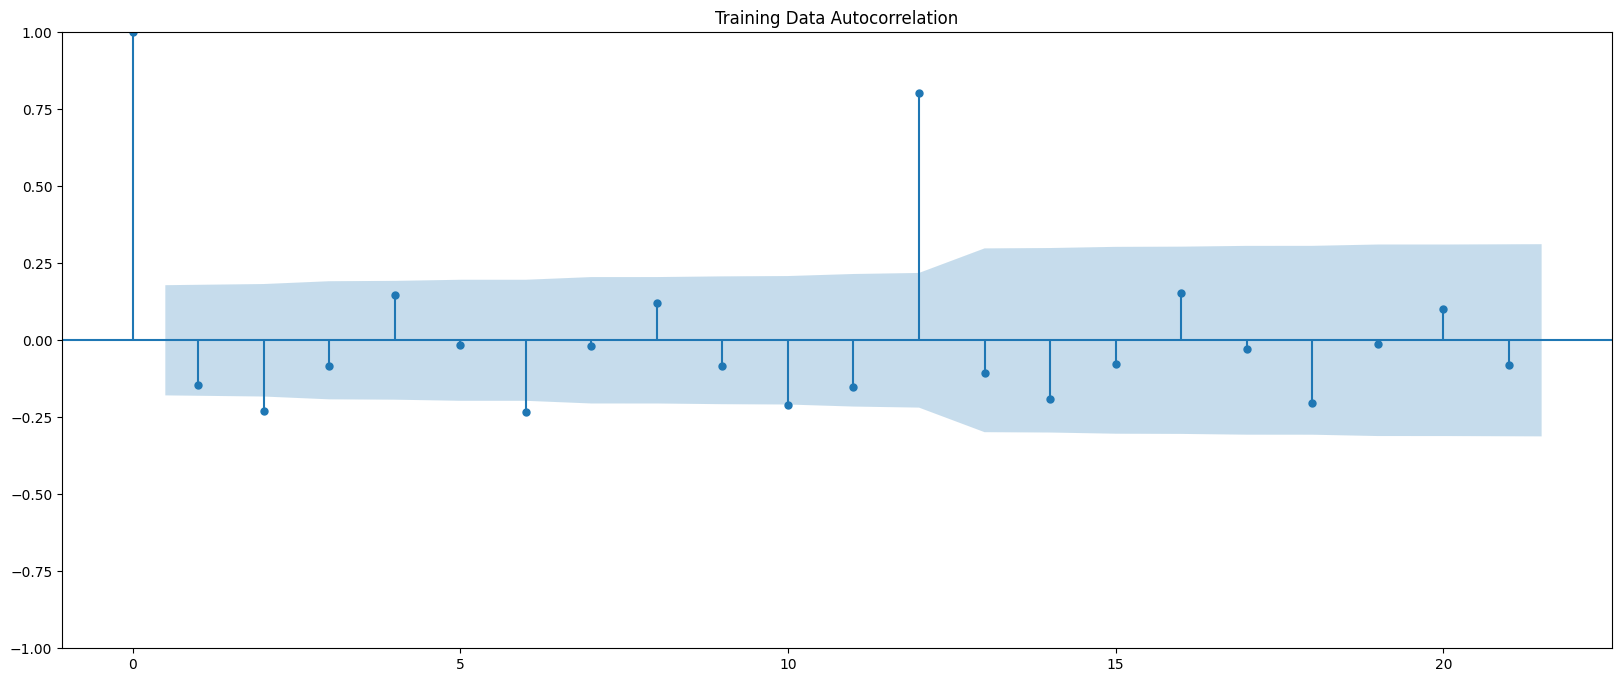

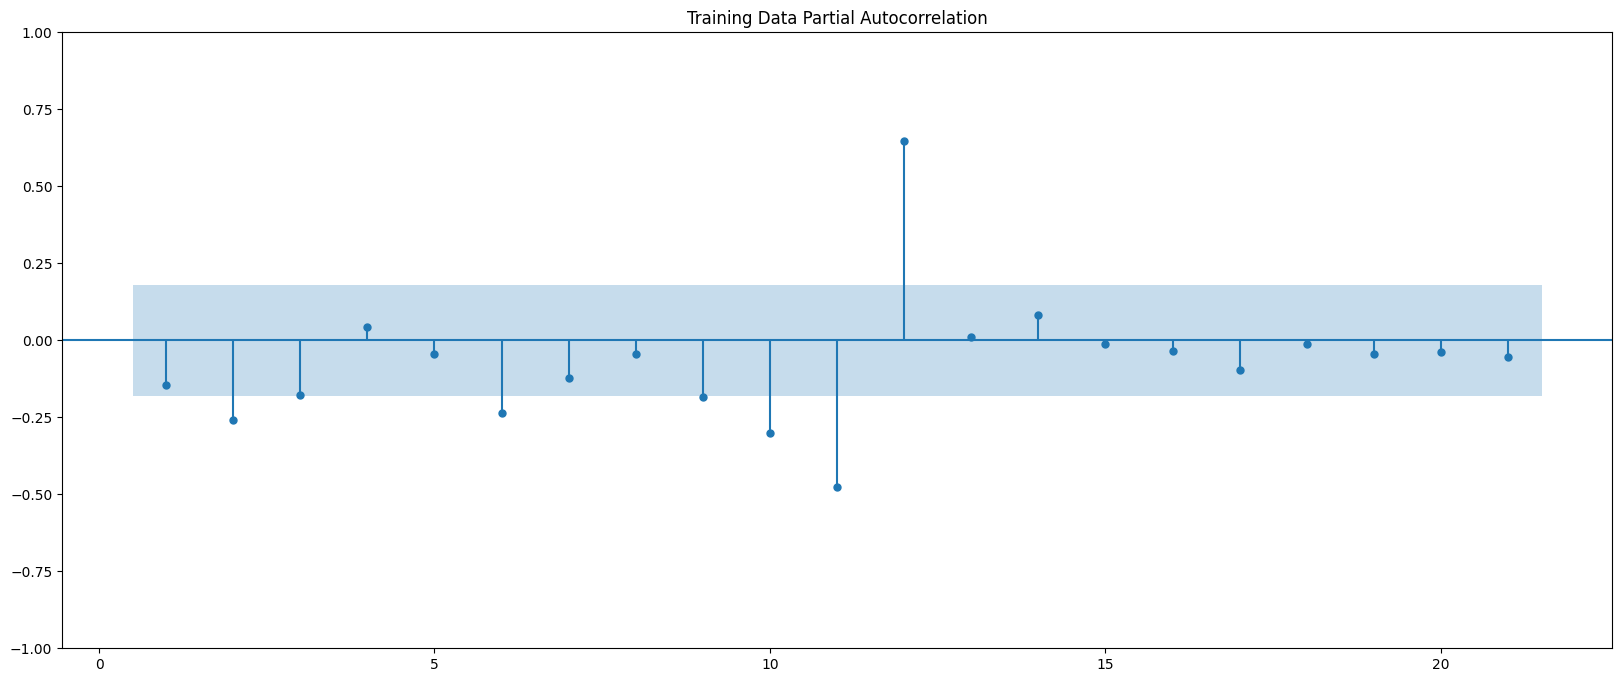

In [84]:
plot_acf(train.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');
plt.show()

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 4 or its multiple e.g. 8.
We are taking the p value to be 0 and the q value also to be 0 as the parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 2. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 1.


Please do refer to $\href{https://online.stat.psu.edu/stat510/lesson/4/4.1}{this\ link}$ to read more about Seasonal Auto-Regressive Integrtaed Moving Average Models.

In [85]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train['Sparkling'],
                                order=(0,1,0),
                                seasonal_order=(2, 1, 1, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

                                      SARIMAX Results                                      
Dep. Variable:                           Sparkling   No. Observations:                  120
Model:             SARIMAX(0, 1, 0)x(2, 1, [1], 4)   Log Likelihood                -829.058
Date:                             Wed, 25 May 2022   AIC                           1666.117
Time:                                     23:35:31   BIC                           1676.808
Sample:                                 01-31-1980   HQIC                          1670.451
                                      - 12-31-1989                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L4       -0.9655      0.036    -26.958      0.000      -1.036      -0.895
ar.S.L8       -0.9722      

C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


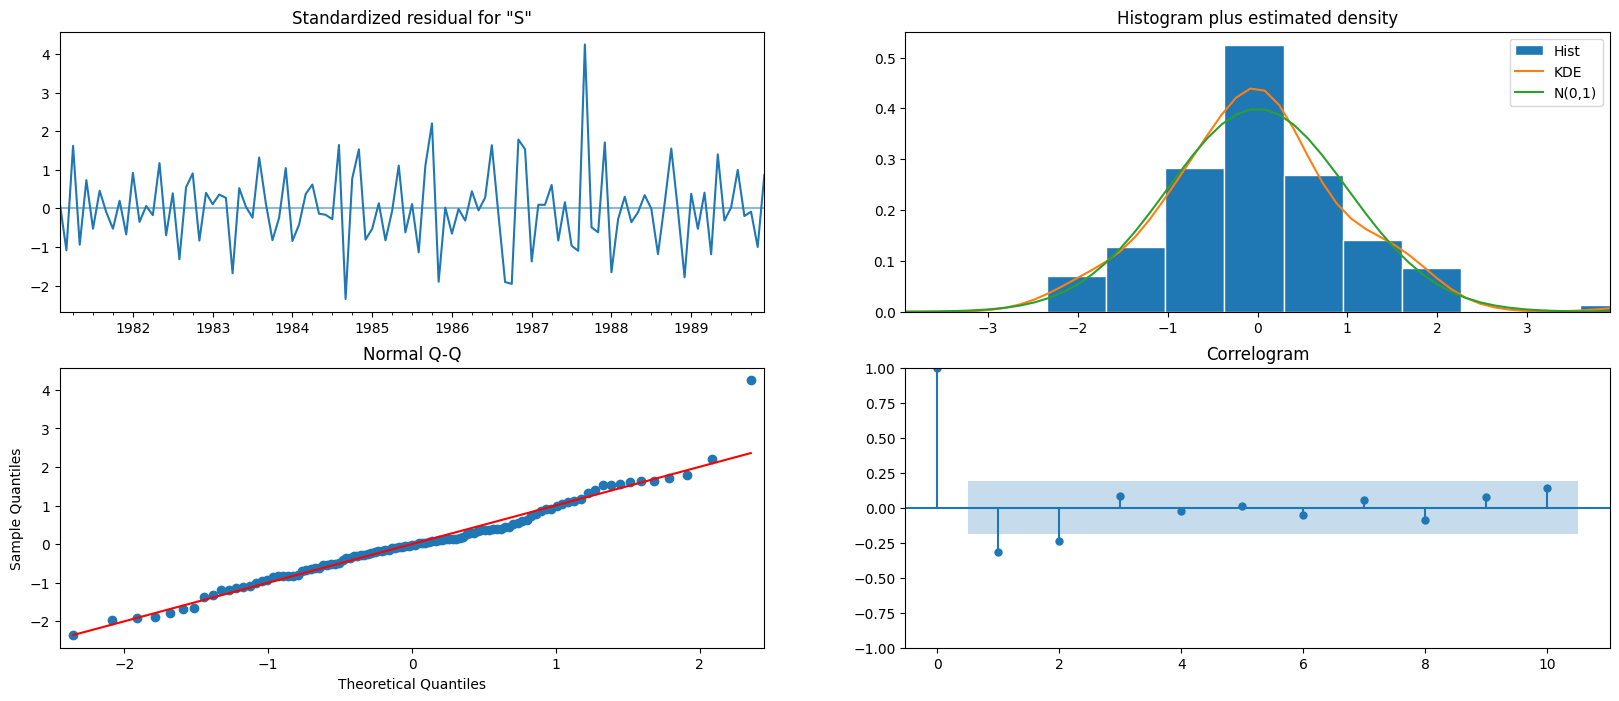

In [86]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

## Predict on the Test Set using this model and evaluate the model.

In [87]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test))

In [88]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test['Sparkling'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 556.5438821267464 
MAPE: 23.245744824038418


In [89]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(0,1,0)(2,1,1,4)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE        MAPE
ARIMA(2,1,2)            1339.707781   53.172870
ARIMA(0,1,0)            4482.058965  234.266414
SARIMA(3,1,3)(3,0,3,4)   852.835727   21.466912
SARIMA(0,1,0)(2,1,1,4)   556.543882   23.245745

This is where our model building exercise ends. 

Please do try out with a different seasonal frequency parameter (if that works) and check whether that gives you a better RMSE value. Also, try taking different kinds of transformations as well.

## Building the most optimum model on the Full Data.

Here, we have a scenario where our training data was stationary but our full data was not stationary. So, we will use the same parameters as our training data but with adding a level of differencing which is needed for the data to be stationary.

In [90]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(3,1,3),
                                seasonal_order=(3, 0, 3, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                     
Dep. Variable:                         Sparkling   No. Observations:                  187
Model:             SARIMAX(3, 1, 3)x(3, 0, 3, 4)   Log Likelihood               -1247.177
Date:                           Wed, 25 May 2022   AIC                           2520.353
Time:                                   23:35:40   BIC                           2561.118
Sample:                               01-31-1980   HQIC                          2536.895
                                    - 07-31-1995                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7151      0.853     -0.838      0.402      -2.387       0.957
ar.L2         -0.1948      0.350     -0.557

###### Note: If we have a scenario where our training data was stationary but our full data was not stationary. We can still use the same parameters as our training data but with adding an appropriate level of differencing or transformation which is needed for the data to be stationary.

## Evaluate the model on the whole data and predict 12 months into the future (till the end of next year).

In [91]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=12)

In [92]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1807.580567  361.539969    1098.975249    2516.185885
1995-09-30  2547.640258  366.780928    1828.762849    3266.517667
1995-10-31  3227.953700  366.876542    2508.888891    3947.018509
1995-11-30  4064.965835  368.206420    3343.294513    4786.637158
1995-12-31  6274.879647  368.425000    5552.779916    6996.979378

In [93]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 525.810355093653


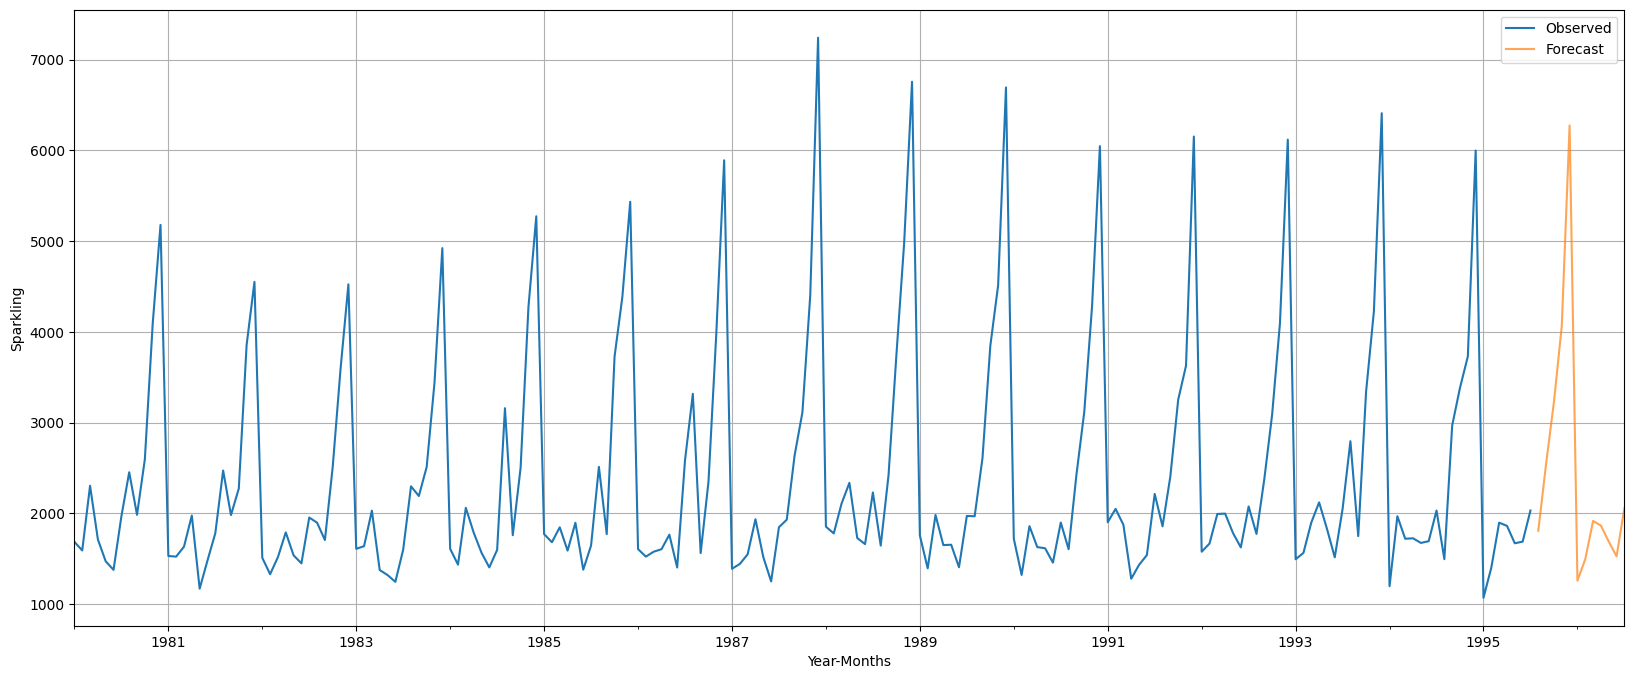

In [94]:
axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.grid();
plt.show()

In [95]:
resultsDf

RMSE        MAPE
ARIMA(2,1,2)            1339.707781   53.172870
ARIMA(0,1,0)            4482.058965  234.266414
SARIMA(3,1,3)(3,0,3,4)   852.835727   21.466912
SARIMA(0,1,0)(2,1,1,4)   556.543882   23.245745

# Problem 2: Rose DATASET Excercise

In [96]:
df2 = pd.read_csv('Rose.csv')
df2.head()

YearMonth   Rose
0   1980-01  112.0
1   1980-02  118.0
2   1980-03  129.0
3   1980-04   99.0
4   1980-05  116.0

In [97]:
df2['YearMonth'] = Time_Stamp
df2.head()

YearMonth   Rose
0 1980-01-31  112.0
1 1980-02-29  118.0
2 1980-03-31  129.0
3 1980-04-30   99.0
4 1980-05-31  116.0

In [98]:
df2.set_index(keys='YearMonth',inplace=True)
df2

Rose
YearMonth        
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0
...           ...
1995-03-31   45.0
1995-04-30   52.0
1995-05-31   28.0
1995-06-30   40.0
1995-07-31   62.0

[187 rows x 1 columns]

In [99]:
df2.isnull().sum()

Rose    2
dtype: int64

In [100]:
cols=df2.isnull().sum()[df2.isnull().sum()>0].index

In [101]:
non_objects=df2[cols].select_dtypes(exclude=['object','category']).columns

In [102]:
#you can use any other method as well
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'median',verbose=0)
imputer= imputer.fit(df2[non_objects].iloc[:,:])

In [103]:
df2[non_objects]=imputer.transform(df2[non_objects])

In [104]:
df2.isnull().sum()

Rose    0
dtype: int64

In [105]:
# The following code is to set the subsequent figure sizes

from pylab import rcParams
rcParams['figure.figsize'] = 20,8

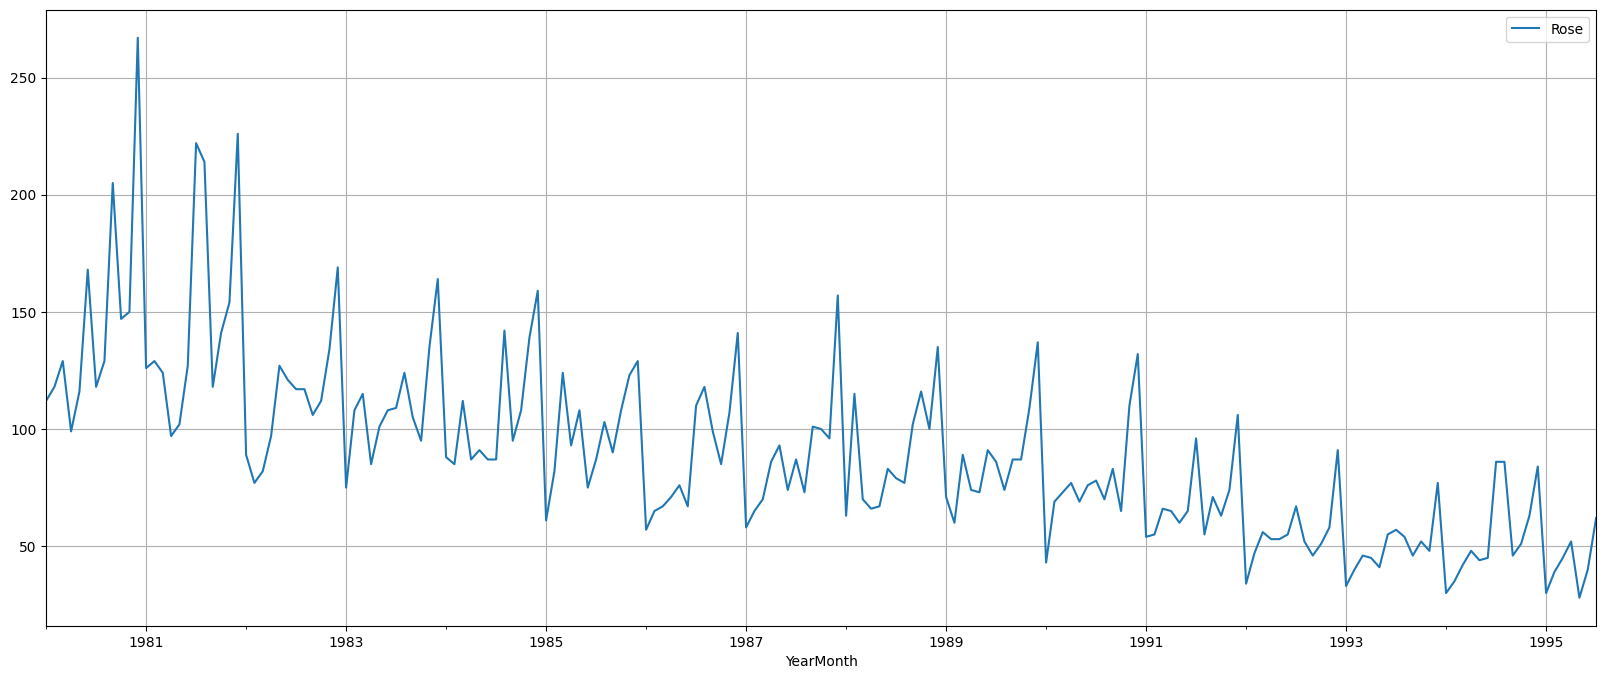

In [106]:
df2.plot(grid=True);
plt.show()

In [107]:
df2.describe()

Rose
count  187.000000
mean    90.347594
std     38.966791
min     28.000000
25%     63.000000
50%     86.000000
75%    111.000000
max    267.000000

In [108]:
from    statsmodels.tsa.seasonal import   seasonal_decompose

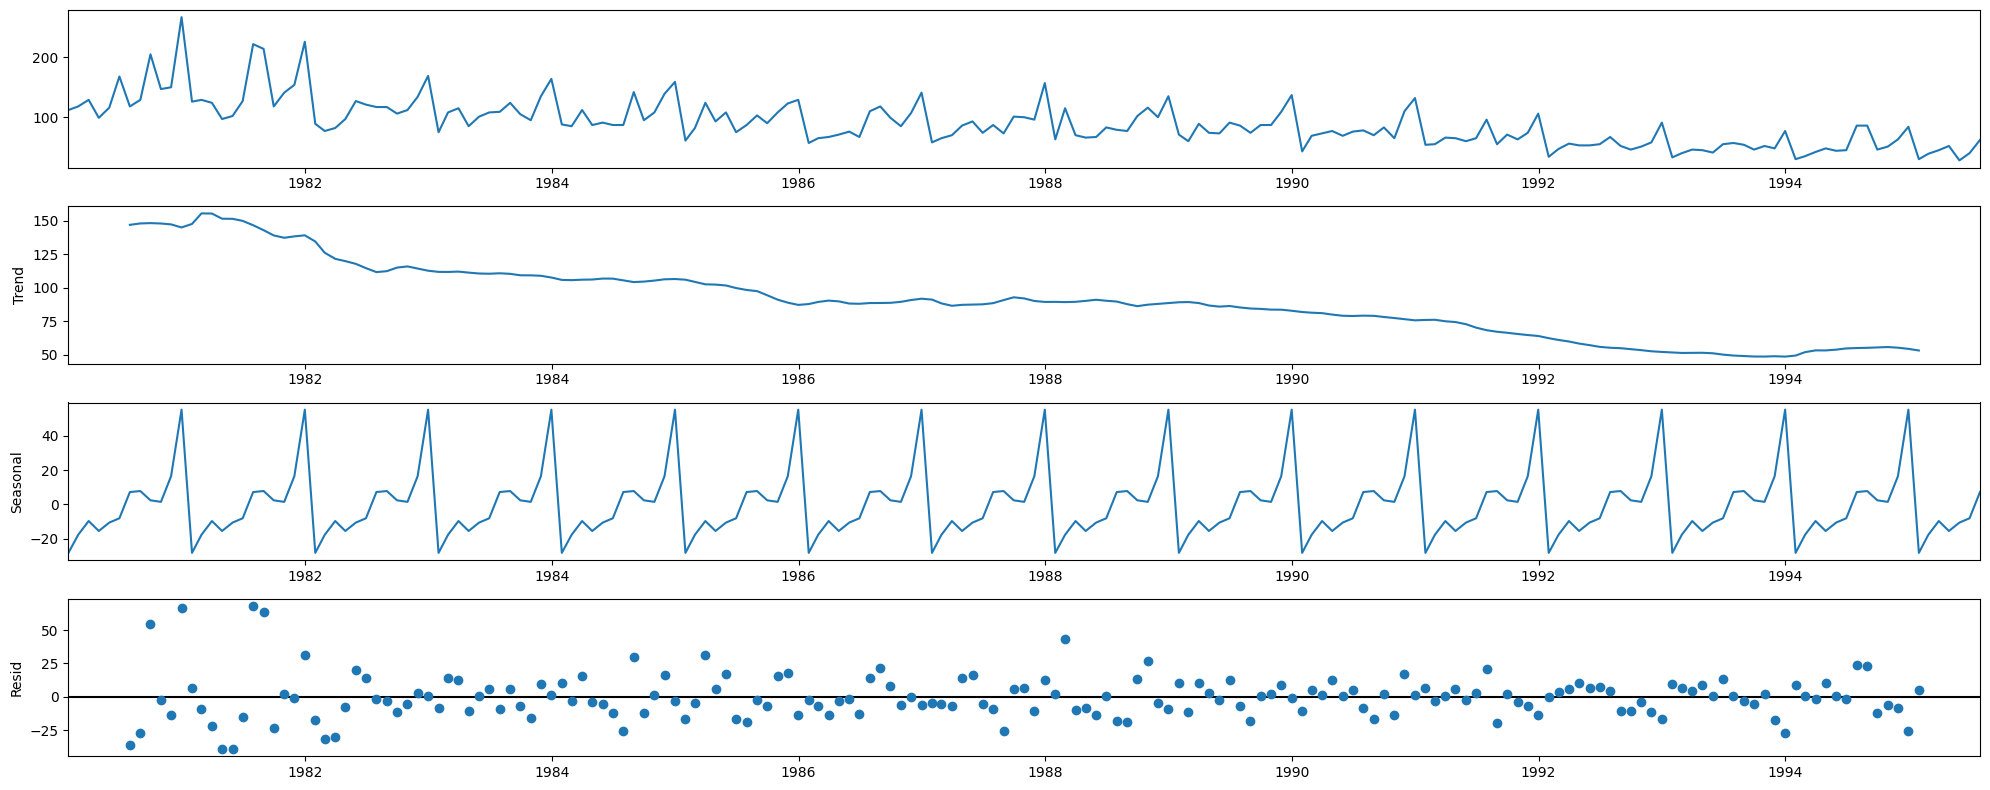

In [109]:
decomposition = seasonal_decompose(df2,model='additive')
decomposition.plot();
plt.show()

In [110]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31   -28.355258
1980-02-29   -17.794345
1980-03-31    -9.764583
1980-04-30   -15.577083
1980-05-31   -10.675298
1980-06-30    -8.157440
1980-07-31     7.161409
1980-08-31     7.741964
1980-09-30     2.328075
1980-10-31     1.425298
1980-11-30    16.400298
1980-12-31    55.266964
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31          NaN
1980-02-29          NaN
1980-03-31          NaN
1980-04-30          NaN
1980-05-31          NaN
1980-06-30          NaN
1980-07-31   -36.244742
1980-08-31   -26.866964
1980-09-30    54.296925
1980-10-31    -2.508631
1980-11-30   -13.816964
1980-12-31    66.60803

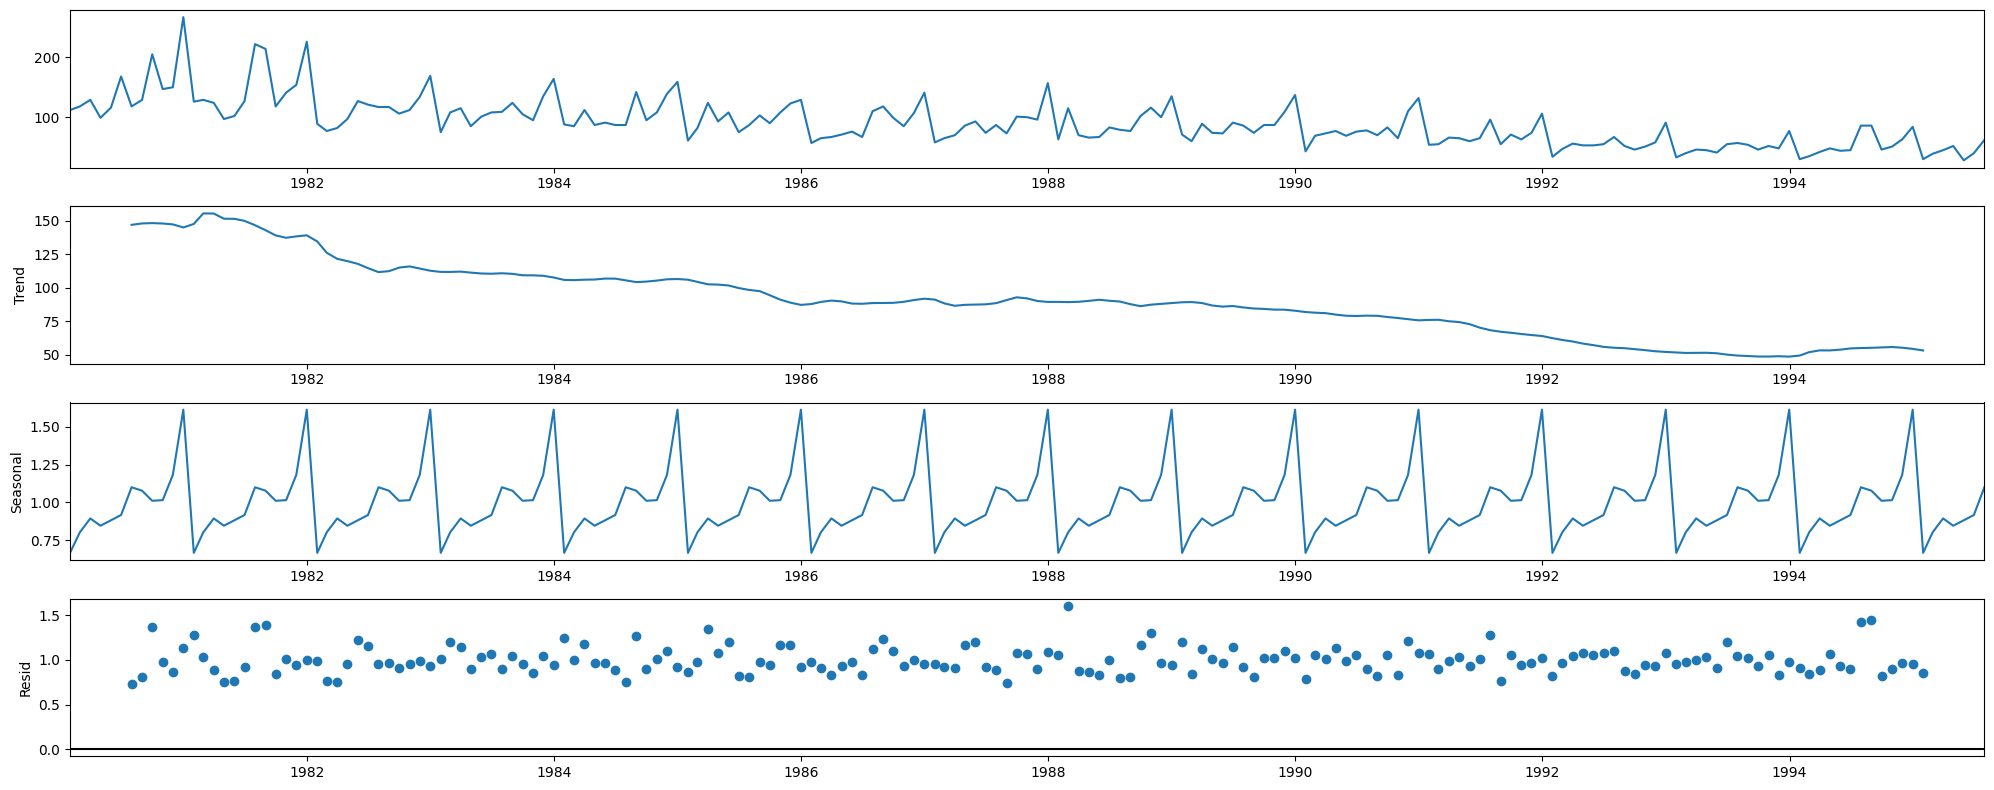

In [111]:
decomposition = seasonal_decompose(df2,model='multiplicative')
decomposition.plot();
plt.show()

In [112]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 YearMonth
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31    147.083333
1980-08-31    148.125000
1980-09-30    148.375000
1980-10-31    148.083333
1980-11-30    147.416667
1980-12-31    145.125000
Name: trend, dtype: float64 

Seasonality 
 YearMonth
1980-01-31    0.664904
1980-02-29    0.801176
1980-03-31    0.893234
1980-04-30    0.844896
1980-05-31    0.881276
1980-06-30    0.915970
1980-07-31    1.099977
1980-08-31    1.077255
1980-09-30    1.010266
1980-10-31    1.014454
1980-11-30    1.182097
1980-12-31    1.614497
Name: seasonal, dtype: float64 

Residual 
 YearMonth
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    0.729348
1980-08-31    0.808431
1980-09-30    1.367594
1980-10-31    0.978541
1980-11-30    0.860779
1980-12-31    1.139546
Name: resid, dtype: fl

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

In [113]:
from statsmodels.tsa.stattools import adfuller

In [114]:
dftest = adfuller(df2,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -2.433
DF test p-value is 0.36217240393274797
Number of lags used 12


We see that at 5% significant level the Time Series is non-stationary.

Let us take one level of differencing to see whether the series becomes stationary.

In [115]:
dftest = adfuller(df2.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -8.023
DF test p-value is 6.305260998842757e-11
Number of lags used 12


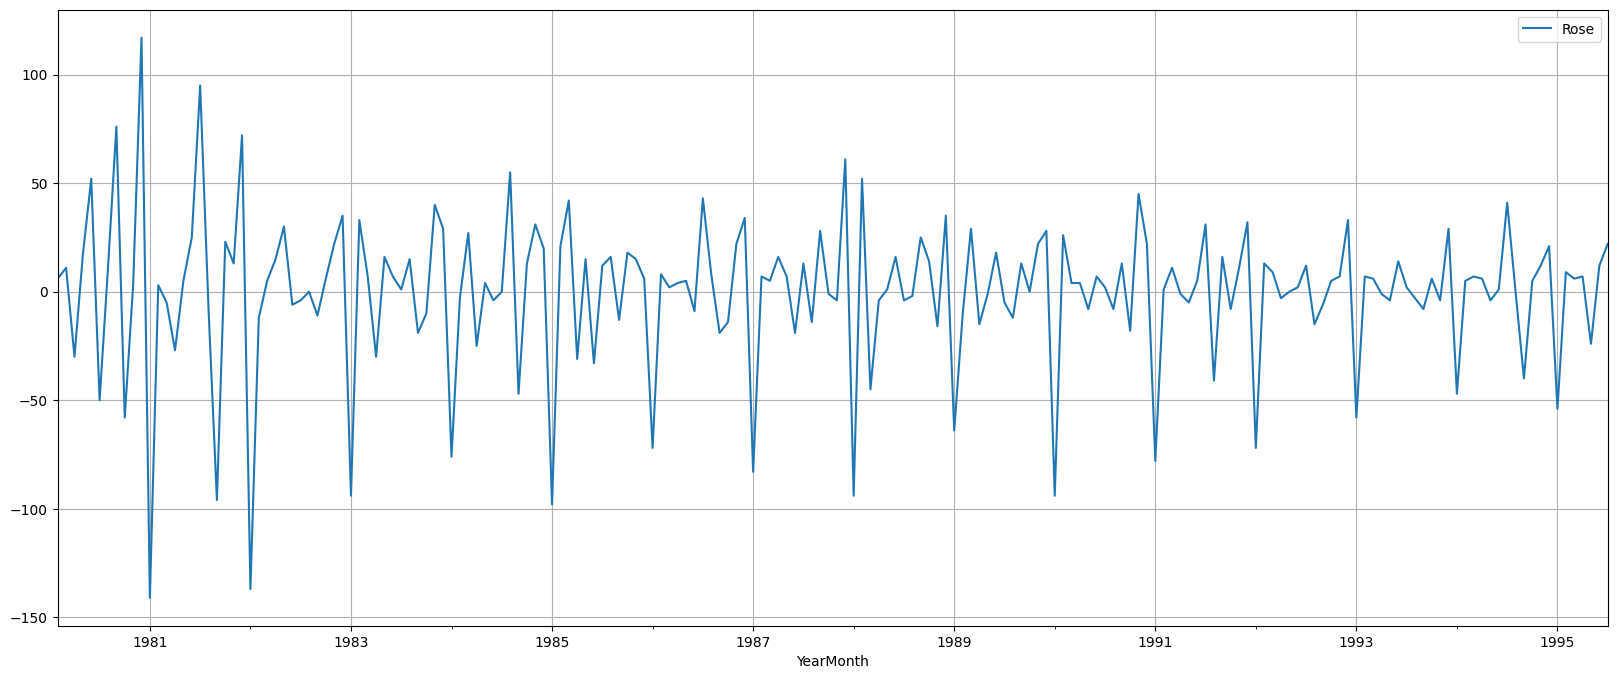

In [116]:
df2.diff().dropna().plot(grid=True);
plt.show()

# Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [117]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

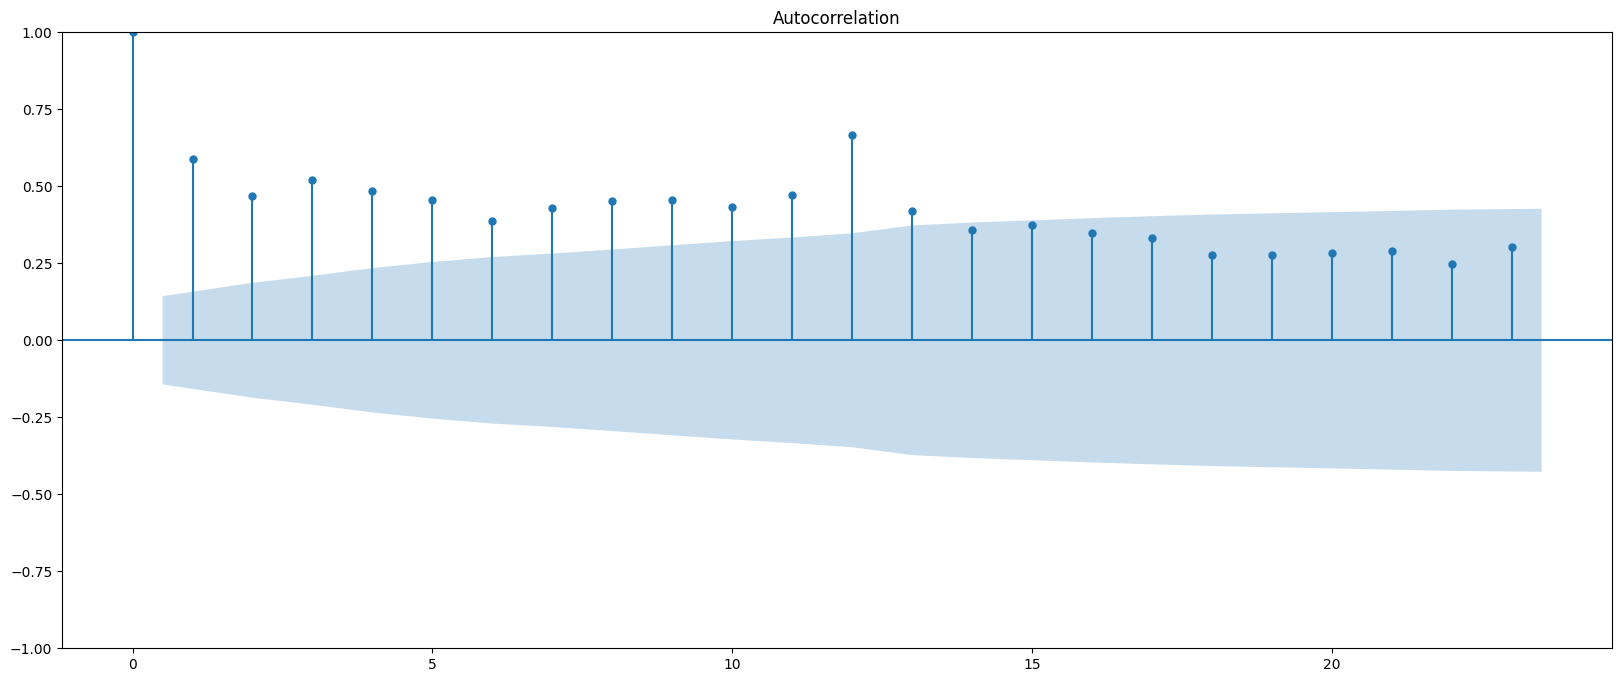

In [118]:
plot_acf(df2,alpha=0.05);
plt.show()

C:\Python\Anaconda\lib\site-packages\statsmodels\graphics\tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


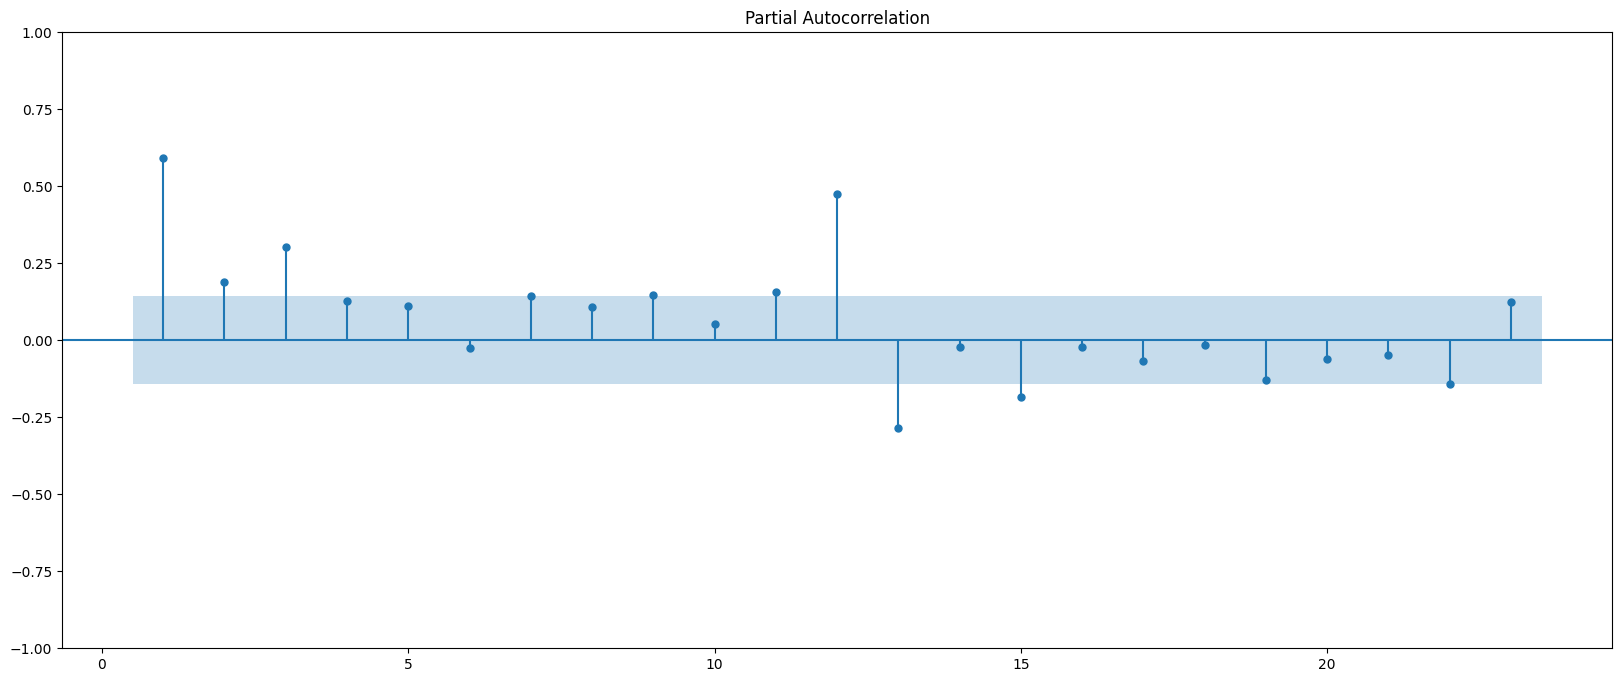

In [119]:
plot_pacf(df2,zero=False,alpha=0.05);
plt.show()

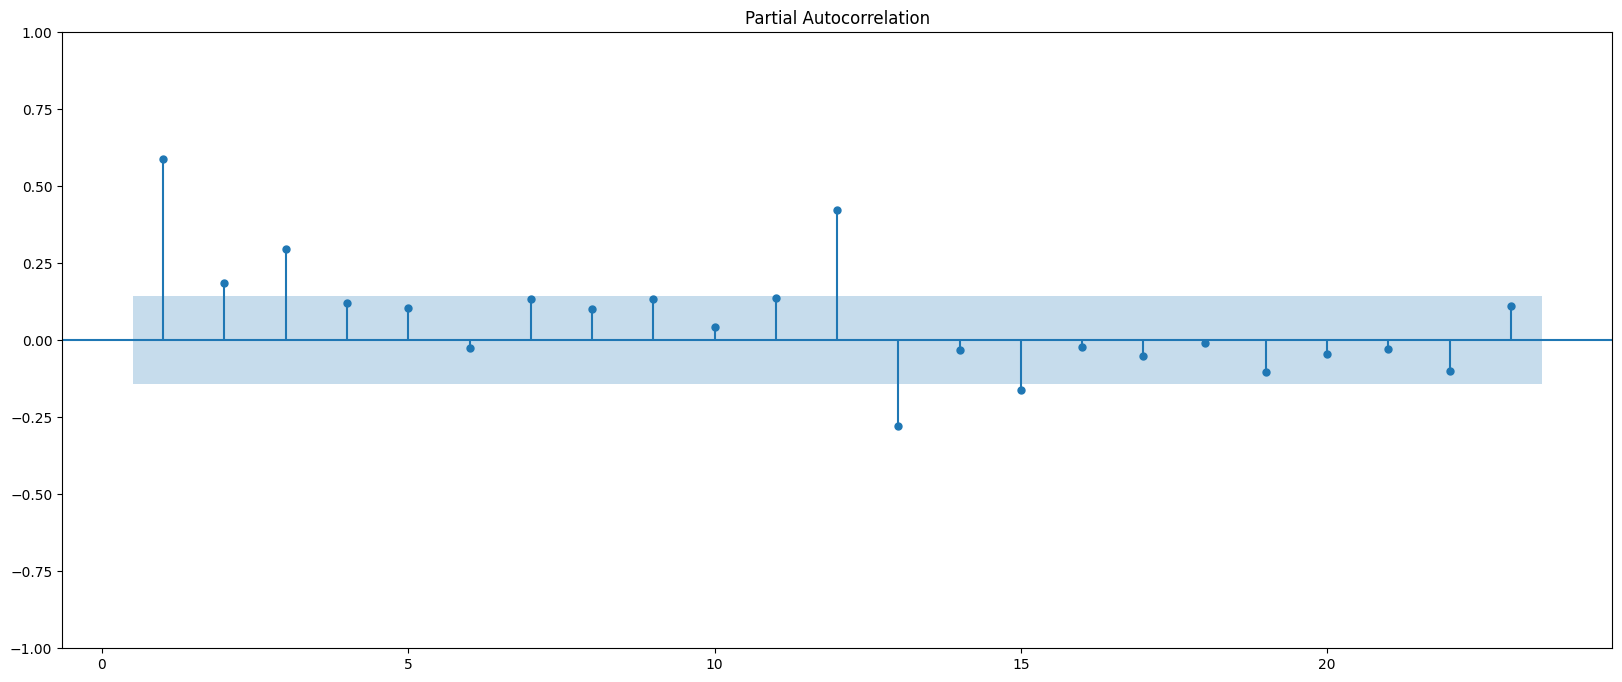

In [120]:
plot_pacf(df2,zero=False,alpha=0.05,method='ywmle');
plt.show()

# Split the data into train and test and plot the training and test data.

Training Data is till the end of 2018. Test Data is from the beginning of 2019 to the last time stamp provided.

In [121]:
df2.index.year.unique()

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995],
           dtype='int64', name='YearMonth')

In [122]:
train_1 = df2[df2.index<='1990'] 
test_1 = df2[df2.index>'1990']

In [123]:
## This is to display multiple data frames from one cell
from IPython.display import display

In [124]:
print('First few rows of Training Data')
display(train_1.head())
print('Last few rows of Training Data')
display(train_1.tail())
print('First few rows of Test Data')
display(test_1.head())
print('Last few rows of Test Data')
display(test_1.tail())

First few rows of Training Data


Rose
YearMonth        
1980-01-31  112.0
1980-02-29  118.0
1980-03-31  129.0
1980-04-30   99.0
1980-05-31  116.0

Last few rows of Training Data


Rose
YearMonth        
1989-08-31   74.0
1989-09-30   87.0
1989-10-31   87.0
1989-11-30  109.0
1989-12-31  137.0

First few rows of Test Data


Rose
YearMonth       
1990-01-31  43.0
1990-02-28  69.0
1990-03-31  73.0
1990-04-30  77.0
1990-05-31  69.0

Last few rows of Test Data


Rose
YearMonth       
1995-03-31  45.0
1995-04-30  52.0
1995-05-31  28.0
1995-06-30  40.0
1995-07-31  62.0

In [125]:
print(train_1.shape)
print(test_1.shape)

(120, 1)
(67, 1)


# Check for stationarity of the Training Data Time Series.

In [126]:
train_1.plot(grid=True);

In [127]:
dftest = adfuller(train_1,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.321
DF test p-value is 0.8827240404113933
Number of lags used 13


In [128]:
dftest = adfuller(train_1.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -6.392
DF test p-value is 3.1814938121222416e-07
Number of lags used 12


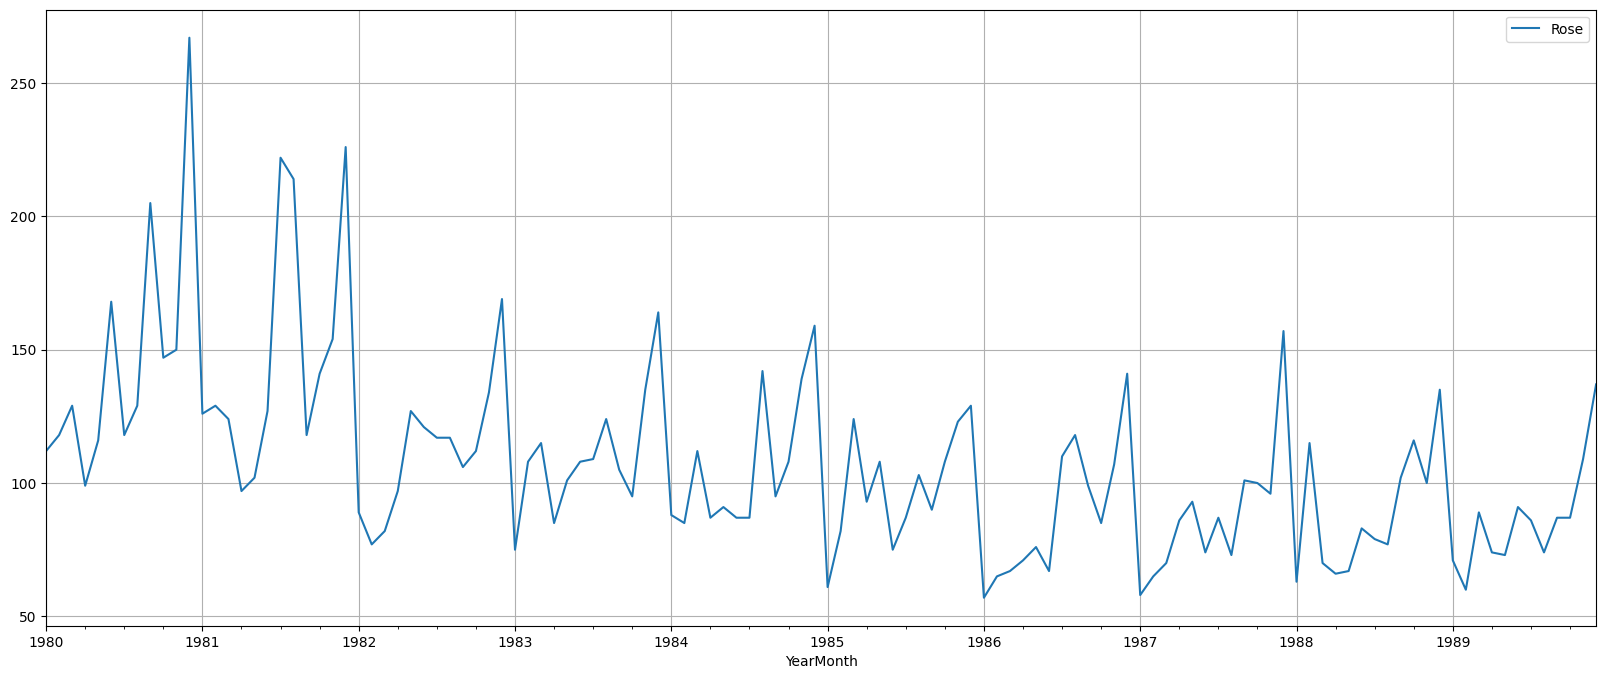

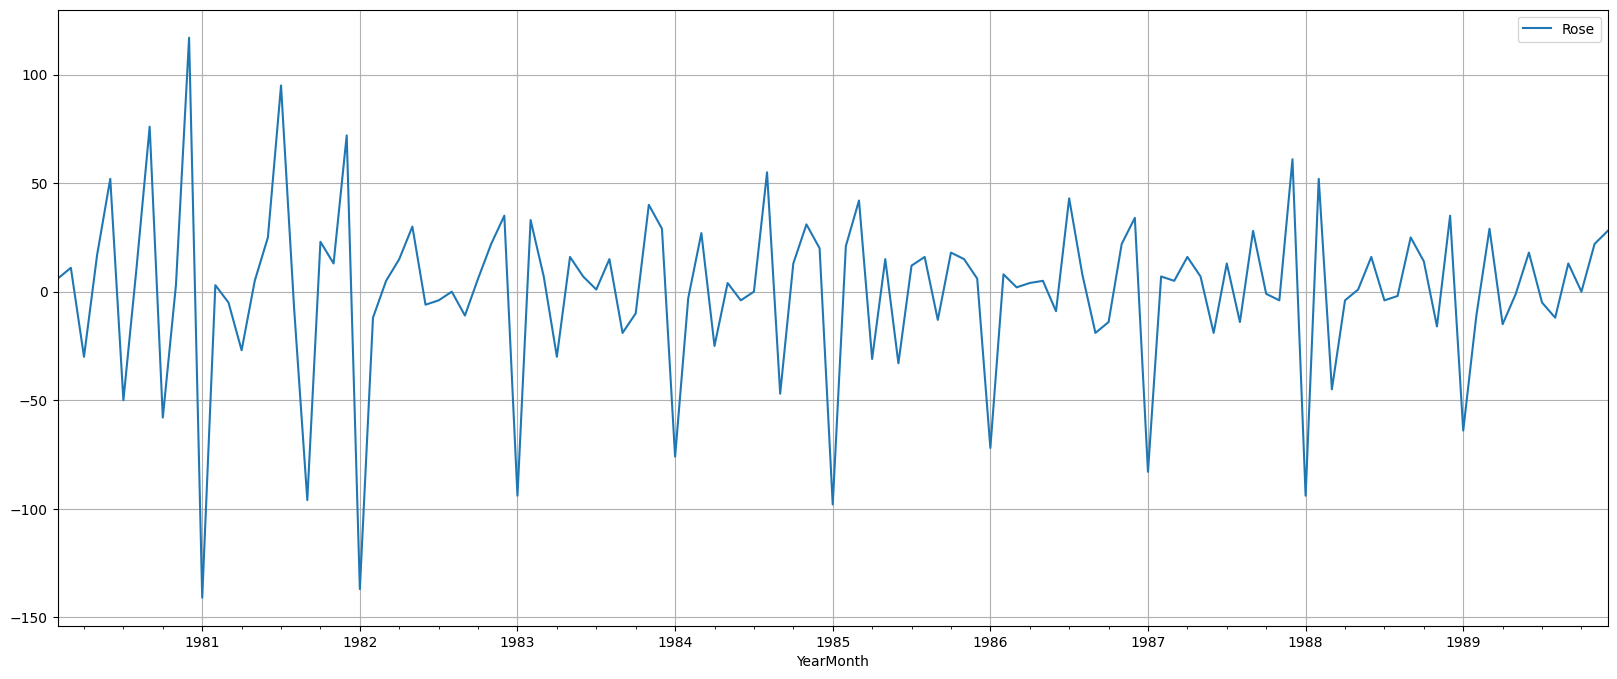

In [129]:
train_1.diff().dropna().plot(grid=True);
plt.show()

In [130]:
train_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 1980-01-31 to 1989-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rose    120 non-null    float64
dtypes: float64(1)
memory usage: 1.9 KB


In [131]:
# Fitting the Simple Exponential Smoothing model and asking python to choose the optimal parameters
model_SES_autofit = model_SES.fit(optimized=True)

C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [132]:
## Let us check the parameters

model_SES_autofit.params

{'smoothing_level': 0.04847975339291667,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 2152.0542614313003,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [133]:
# Using the fitted model on the training set to forecast on the test set
SES_predict = model_SES_autofit.forecast(steps=len(test_1))
SES_predict

1990-01-31    2814.808816
1990-02-28    2814.808816
1990-03-31    2814.808816
1990-04-30    2814.808816
1990-05-31    2814.808816
                 ...     
1995-03-31    2814.808816
1995-04-30    2814.808816
1995-05-31    2814.808816
1995-06-30    2814.808816
1995-07-31    2814.808816
Freq: M, Length: 67, dtype: float64

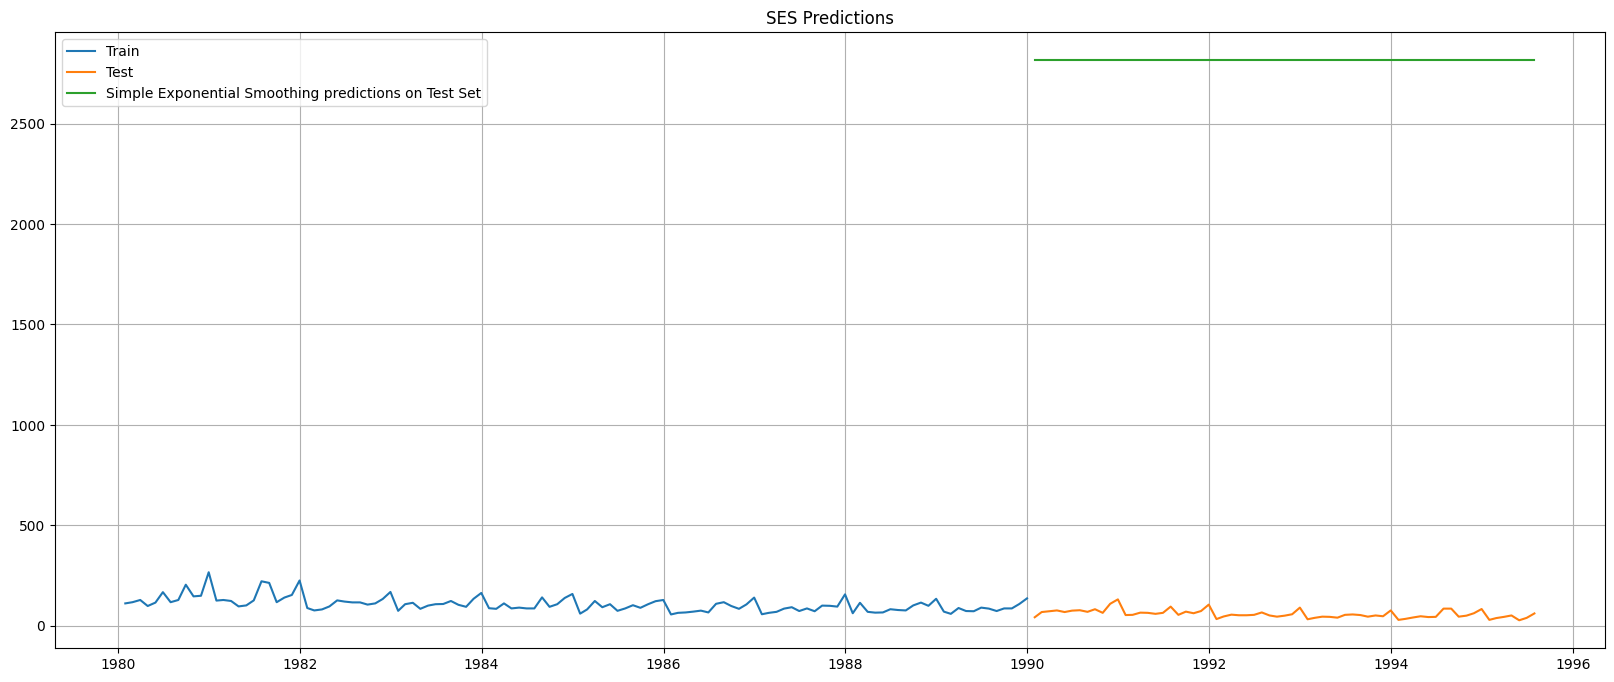

In [134]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train_1, label='Train')
plt.plot(test_1, label='Test')

plt.plot(SES_predict, label='Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('SES Predictions');
plt.show()

In [135]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [136]:
print('SES RMSE:',mean_squared_error(test_1.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test_1.values,SES_predict.values)[0])

SES RMSE: 2755.358150278624
SES RMSE (calculated using statsmodels): 2755.358150278625


In [137]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test_1.values,SES_predict.values)[0]]},index=['SES'])
resultsDf

Test RMSE
SES  2755.35815

In [138]:
# Initializing the Double Exponential Smoothing Model
model_DES = Holt(train_1,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit()

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 1.4901161193847656e-08, 'smoothing_trend': 6.680818251431411e-09, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 138.93243921985837, 'initial_trend': -0.5185804177349018, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


In [139]:
# Forecasting using this model for the duration of the test set
DES_predict =  model_DES.forecast(len(test_1))
DES_predict

1990-01-31    76.184209
1990-02-28    75.665628
1990-03-31    75.147048
1990-04-30    74.628467
1990-05-31    74.109887
                ...    
1995-03-31    44.032223
1995-04-30    43.513642
1995-05-31    42.995062
1995-06-30    42.476482
1995-07-31    41.957901
Freq: M, Length: 67, dtype: float64

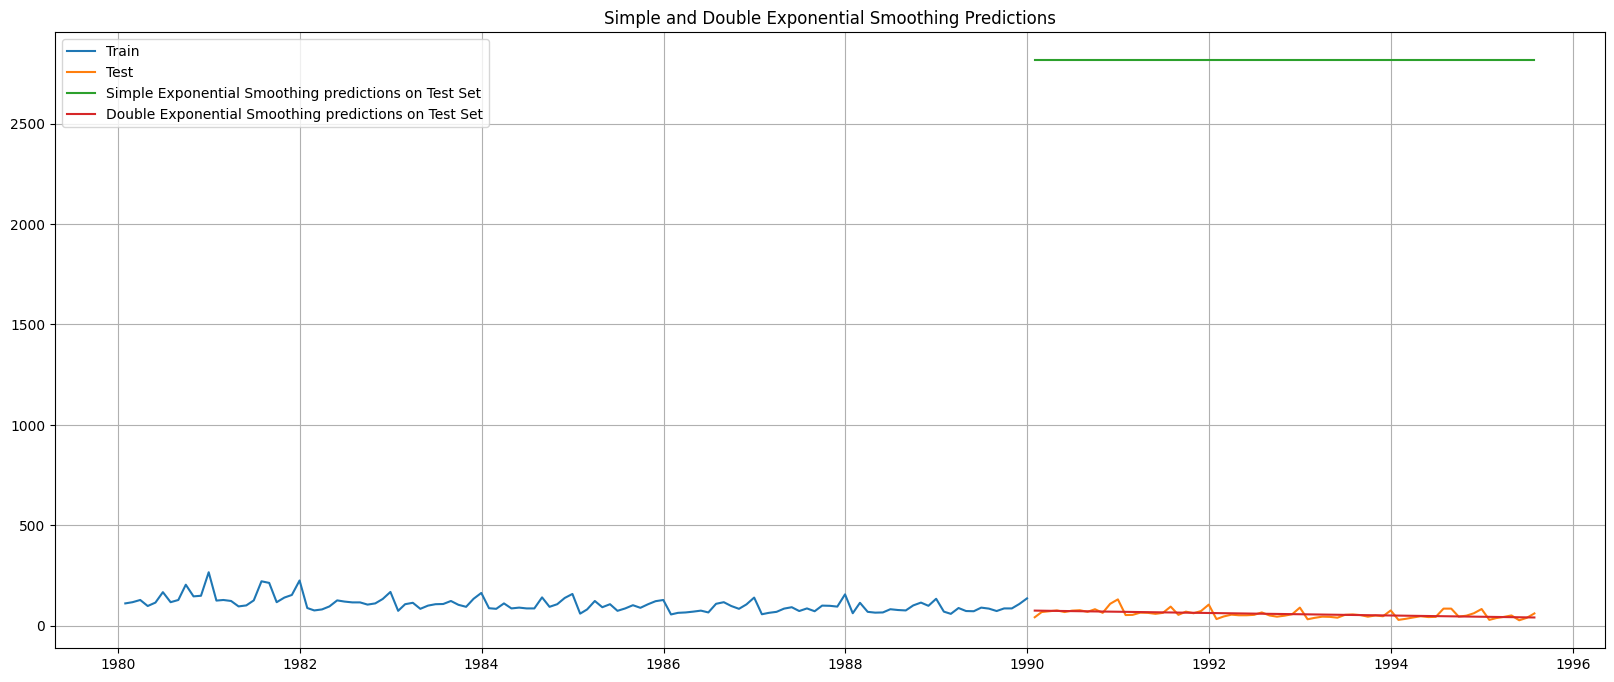

In [140]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train_1, label='Train')
plt.plot(test_1, label='Test')

plt.plot(SES_predict, label='Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');
plt.show()

In [141]:
print('DES RMSE:',mean_squared_error(test_1.values,DES_predict.values,squared=False))

DES RMSE: 17.876668757780386


In [142]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test_1.values,DES_predict.values,squared=False)]}
                           ,index=['DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
SES  2755.358150
DES    17.876669

In [143]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train_1,trend='additive',seasonal='additive',initialization_method='estimated')
# Fitting the model
model_TES = model_TES.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)

C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.09497210888874562, 'smoothing_trend': 7.465095965273274e-05, 'smoothing_seasonal': 0.0003521866705400393, 'damping_trend': nan, 'initial_level': 146.58611350466705, 'initial_trend': -0.5551780400208214, 'initial_seasons': array([-30.49580985, -19.51332275, -11.15657296, -23.27538705,
       -12.84253406,  -7.64478742,   3.10608786,  10.50245295,
         4.77490993,   4.38565829,  19.65816521,  63.91978977]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [144]:
# Forecasting using this model for the duration of the test set
TES_predict =  model_TES.forecast(len(test_1))
TES_predict

1990-01-31    49.057369
1990-02-28    59.484603
1990-03-31    67.286176
1990-04-30    54.612134
1990-05-31    64.489887
                ...    
1995-03-31    33.976360
1995-04-30    21.302317
1995-05-31    31.180071
1995-06-30    35.822826
1995-07-31    46.018186
Freq: M, Length: 67, dtype: float64

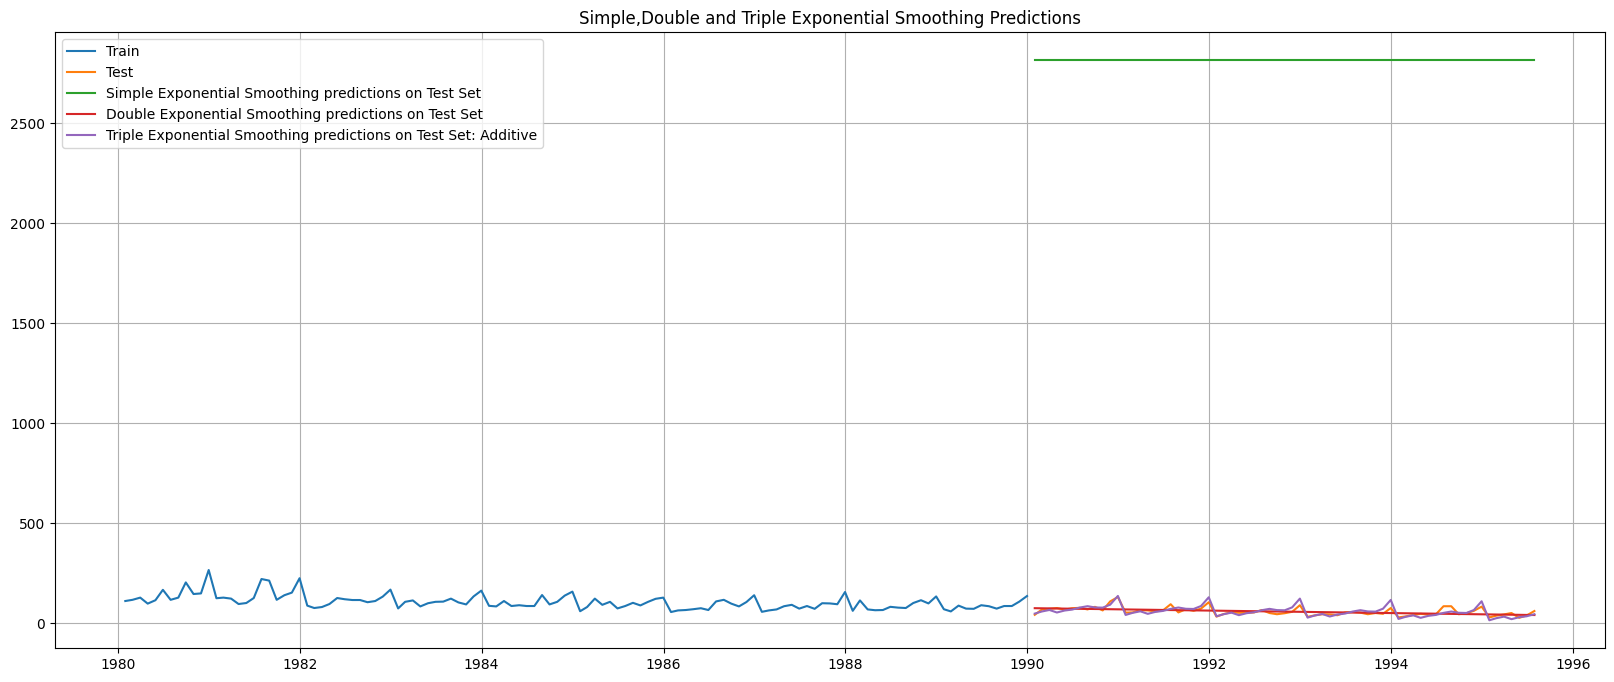

In [145]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train_1, label='Train')
plt.plot(test_1, label='Test')

plt.plot(SES_predict, label='Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Triple Exponential Smoothing predictions on Test Set: Additive')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');
plt.show()

In [146]:
print('TES RMSE:',mean_squared_error(test_1.values,TES_predict.values,squared=False))

TES RMSE: 14.69401846817851


In [147]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test_1.values,TES_predict.values,squared=False)]}
                           ,index=['TES:Additive'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
SES           2755.358150
DES             17.876669
TES:Additive    14.694018

In [148]:
# Initializing the Double Exponential Smoothing Model
model_TES_am = ExponentialSmoothing(train_1,trend='add',seasonal='multiplicative',initialization_method='estimated')
# Fitting the model
model_TES_am = model_TES_am.fit()

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES_am.params)

C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)



==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.061212896166004546, 'smoothing_trend': 0.06121289609390582, 'smoothing_seasonal': 1.9472419683677065e-07, 'damping_trend': nan, 'initial_level': 132.95858964065945, 'initial_trend': -0.826106263183913, 'initial_seasons': array([0.86290308, 0.96224949, 1.05305424, 0.90797979, 1.03682312,
       1.12969751, 1.24700591, 1.33682102, 1.25441347, 1.24019411,
       1.41573663, 1.97074129]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [149]:
# Forecasting using this model for the duration of the test set
TES_predict_am =  model_TES_am.forecast(len(test_1))
TES_predict_am

1990-01-31    61.695431
1990-02-28    68.766252
1990-03-31    75.220282
1990-04-30    64.827142
1990-05-31    73.991478
                ...    
1995-03-31    73.105562
1995-04-30    63.003757
1995-05-31    71.909353
1995-06-30    78.312881
1995-07-31    86.403198
Freq: M, Length: 67, dtype: float64

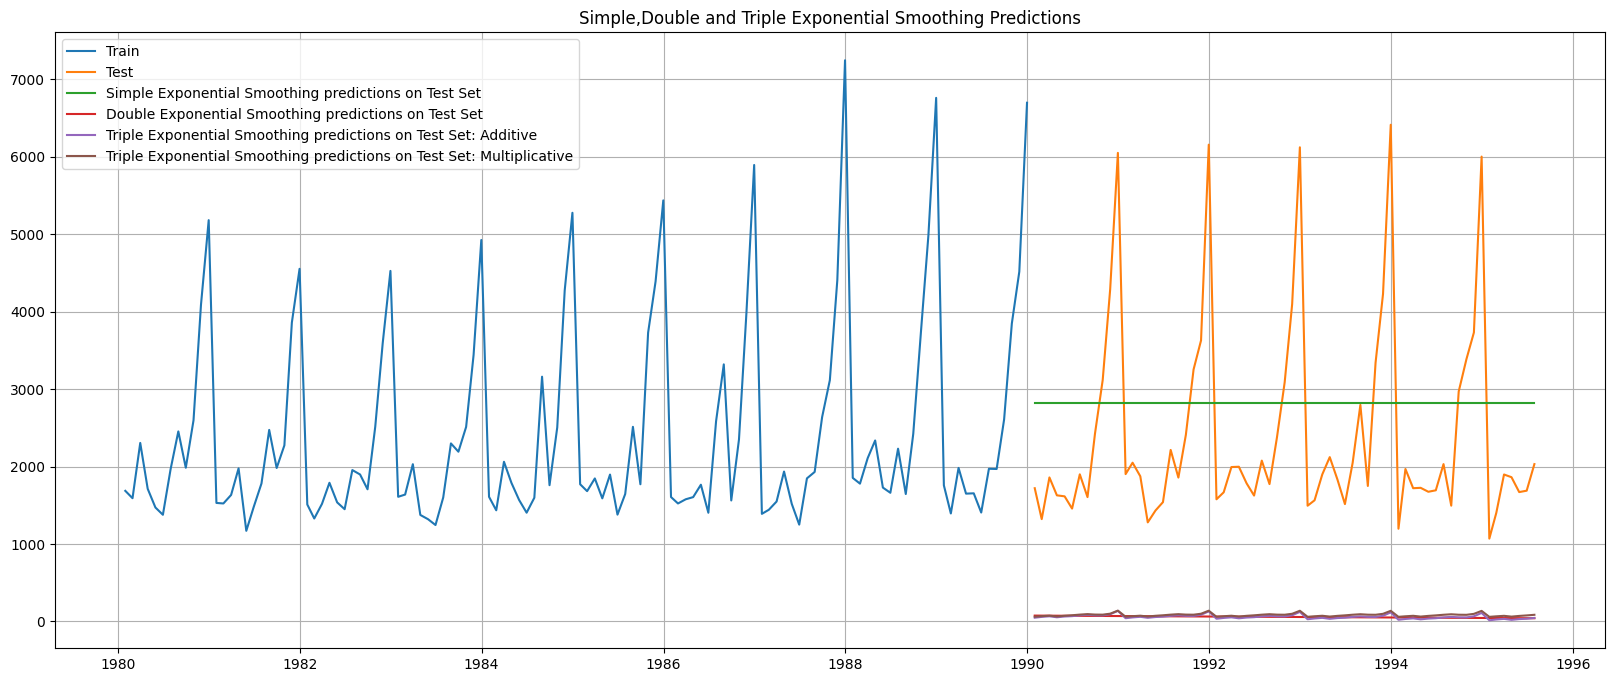

In [150]:
## Plotting the Training data, Test data and the forecasted values

plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Triple Exponential Smoothing predictions on Test Set: Additive')
plt.plot(TES_predict_am, label='Triple Exponential Smoothing predictions on Test Set: Multiplicative')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');
plt.show()

In [151]:
print('TES_am RMSE:',mean_squared_error(test_1.values,TES_predict_am.values,squared=False))

TES_am RMSE: 28.36321618782595


In [152]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test_1.values,TES_predict_am.values,squared=False)]}
                           ,index=['TES: Multiplicative'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
SES                  2755.358150
DES                    17.876669
TES:Additive           14.694018
TES: Multiplicative    28.363216

# Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [153]:
## The following loop helps us in getting a combination of different parameters of p and q in the range of 0 and 2
## We have kept the value of d as 1 as we need to take a difference of the series to make it stationary.

import itertools
p = q = range(0, 4)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Examples of the parameter combinations for the Model')
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Examples of the parameter combinations for the Model
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 1, 3)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 1, 3)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 1, 3)
Model: (3, 1, 0)
Model: (3, 1, 1)
Model: (3, 1, 2)
Model: (3, 1, 3)


In [154]:
# Creating an empty Dataframe with column names only
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [155]:
from statsmodels.tsa.arima.model import ARIMA

for param in pdq:# running a loop within the pdq parameters defined by itertools
    ARIMA_model = ARIMA(train_1['Rose'].values,order=param).fit()#fitting the ARIMA model
    #using the parameters from the loop
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))#printing the parameters and the AIC
    #from the fitted models
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)
    #appending the AIC values and the model parameters to the previously created data frame
    #for easier understanding and sorting of the AIC values

ARIMA(0, 1, 0) - AIC:1214.7663925264924
ARIMA(0, 1, 1) - AIC:1170.0196891094558
ARIMA(0, 1, 2) - AIC:1167.498635750478
ARIMA(0, 1, 3) - AIC:1168.5288938231588
ARIMA(1, 1, 0) - AIC:1200.9156052822925
ARIMA(1, 1, 1) - AIC:1168.359027728136
ARIMA(1, 1, 2) - AIC:1167.8973765405033
ARIMA(1, 1, 3) - AIC:1169.8963129987885
ARIMA(2, 1, 0) - AIC:1183.9058474103097
ARIMA(2, 1, 1) - AIC:1169.4637207845462
ARIMA(2, 1, 2) - AIC:1169.896047657474


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


ARIMA(2, 1, 3) - AIC:1162.3875428019837
ARIMA(3, 1, 0) - AIC:1183.314675445144
ARIMA(3, 1, 1) - AIC:1170.3307091989134


C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(3, 1, 2) - AIC:1171.6931847860837
ARIMA(3, 1, 3) - AIC:1166.943159799182


In [156]:
## Sort the above AIC values in the ascending order to get the parameters for the minimum AIC value

ARIMA_AIC.sort_values(by='AIC',ascending=True).head()

param          AIC
11  (2, 1, 3)  1162.387543
15  (3, 1, 3)  1166.943160
2   (0, 1, 2)  1167.498636
6   (1, 1, 2)  1167.897377
5   (1, 1, 1)  1168.359028

In [157]:
auto_ARIMA = ARIMA(train_1, order=(2,1,3))

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  120
Model:                 ARIMA(2, 1, 3)   Log Likelihood                -575.194
Date:                Wed, 25 May 2022   AIC                           1162.388
Time:                        23:35:59   BIC                           1179.062
Sample:                    01-31-1980   HQIC                          1169.159
                         - 12-31-1989                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6499      0.089    -18.557      0.000      -1.824      -1.476
ar.L2         -0.6968      0.091     -7.636      0.000      -0.876      -0.518
ma.L1          1.0466      0.726      1.442      0.1

C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


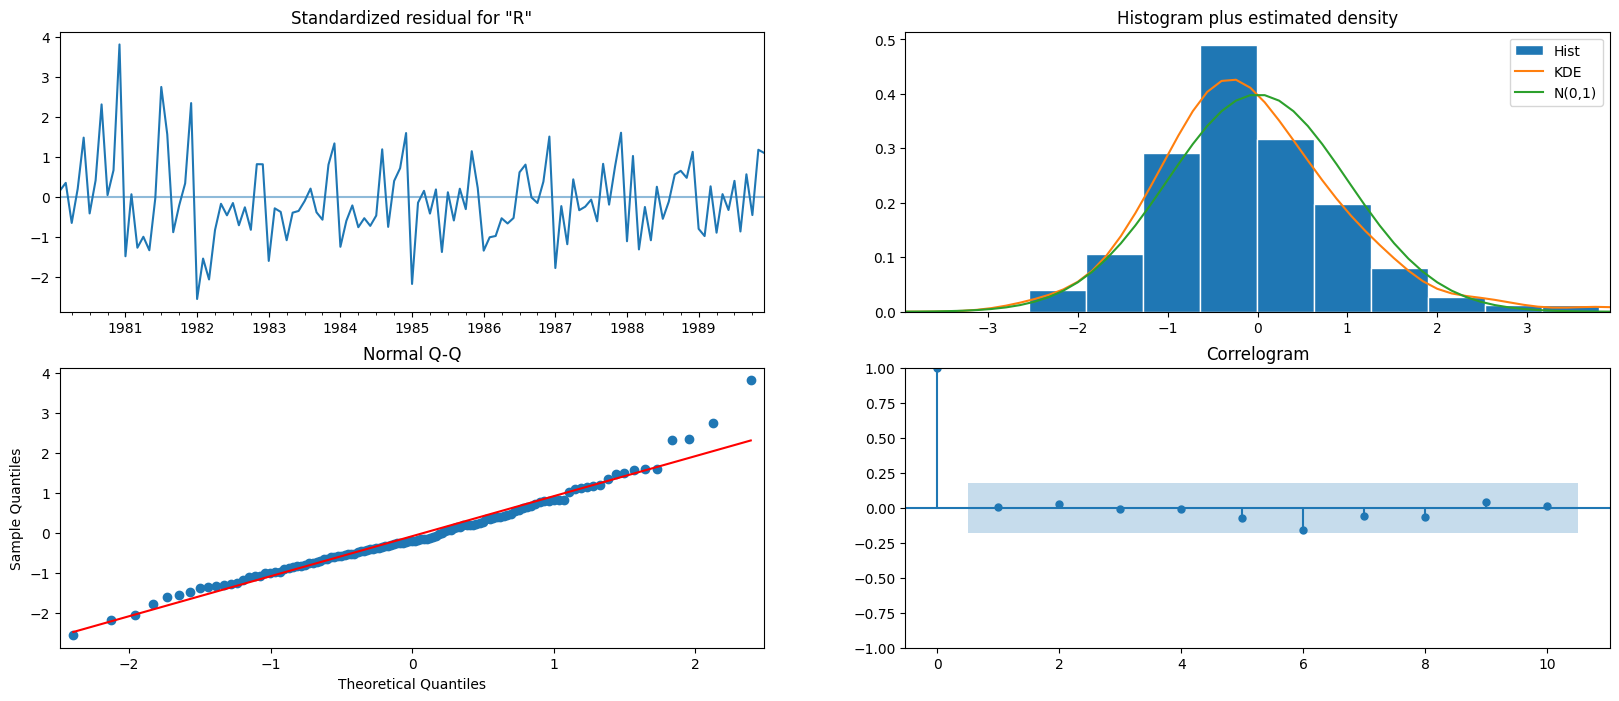

In [158]:
results_auto_ARIMA.plot_diagnostics();
plt.show()

# Predict on the Test Set using this model and evaluate the model.

In [159]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test_1))

In [160]:
## Mean Absolute Percentage Error (MAPE) - Function Definition

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

## Importing the mean_squared_error function from sklearn to calculate the RMSE

from sklearn.metrics import mean_squared_error

In [161]:
rmse = mean_squared_error(test_1['Rose'],predicted_auto_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test_1['Rose'],predicted_auto_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 38.844627132986574 
MAPE: 74.40759635932388


In [162]:
resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,3)'])

resultsDf

RMSE       MAPE
ARIMA(2,1,3)  38.844627  74.407596

# Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

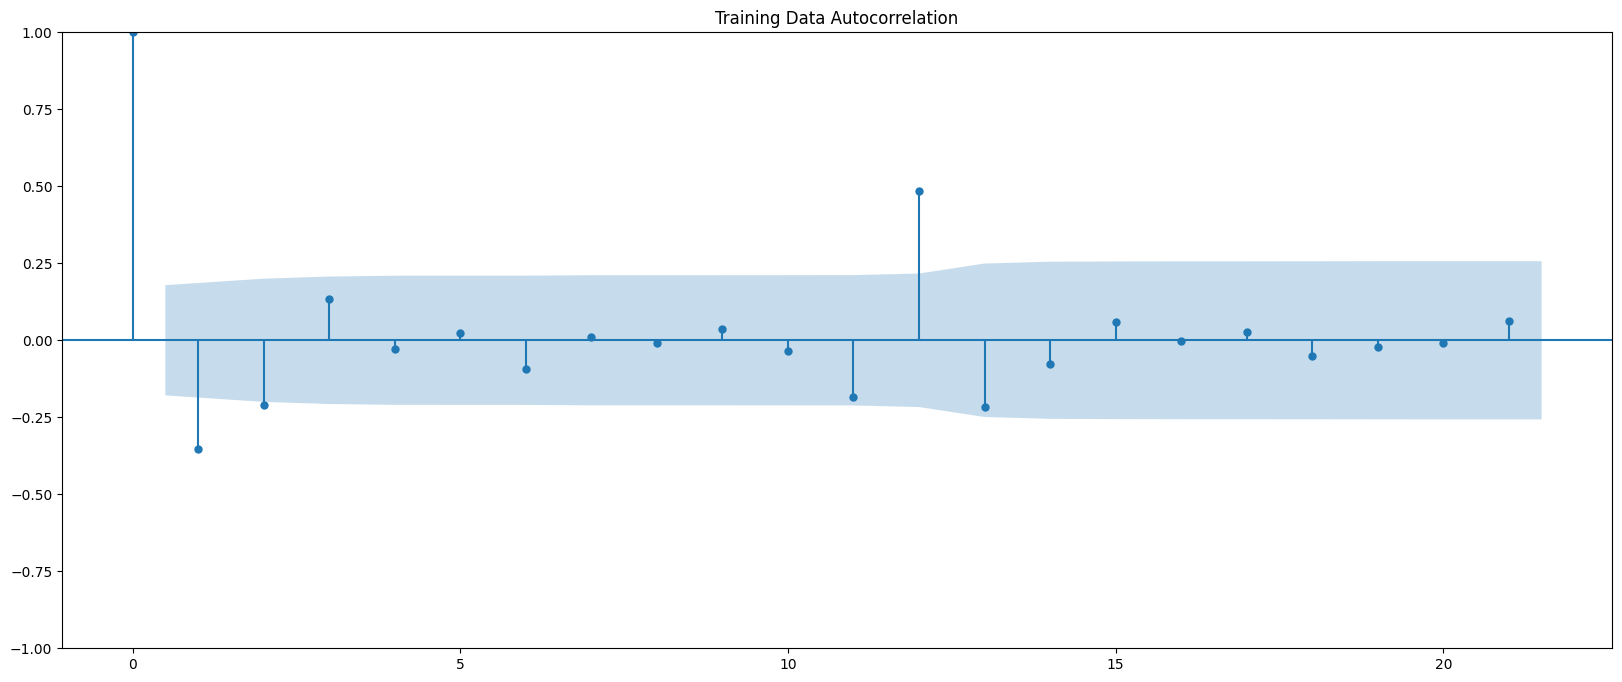

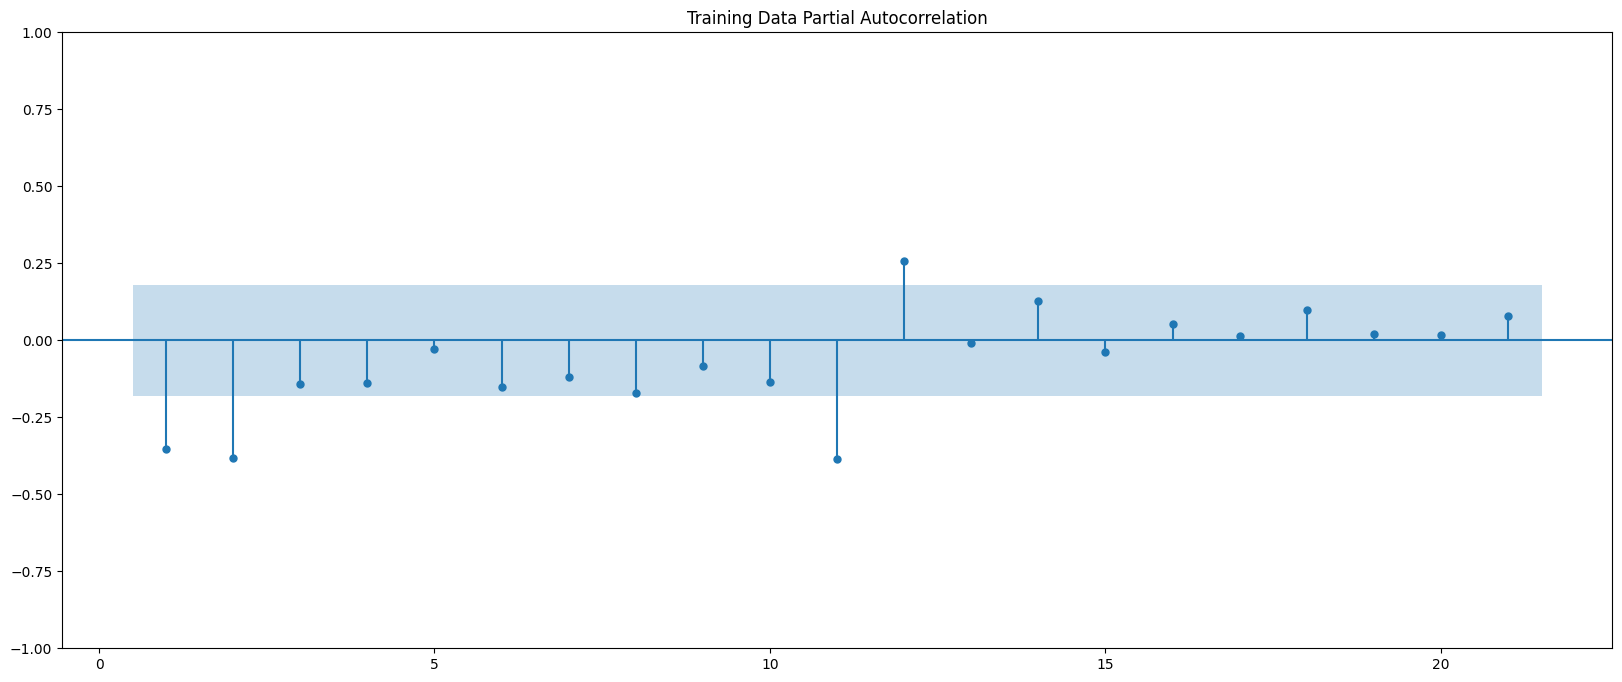

In [163]:
plot_acf(train_1.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train_1.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle')
plt.show()

Here, we have taken alpha=0.05.

* The Auto-Regressive parameter in an ARIMA model is 'p' which comes from the significant lag before which the PACF plot cuts-off to 2.
* The Moving-Average parameter in an ARIMA model is 'q' which comes from the significant lag before the ACF plot cuts-off to 2.

By looking at the above plots, we will take the value of p and q to be 2 and 2 respectively.

In [164]:
manual_ARIMA = ARIMA(train_1['Rose'], order=(2,1,2),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:                   Rose   No. Observations:                  120
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -579.948
Date:                Wed, 25 May 2022   AIC                           1169.896
Time:                        23:36:01   BIC                           1183.792
Sample:                    01-31-1980   HQIC                          1175.539
                         - 12-31-1989                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4423      0.494     -0.896      0.370      -1.410       0.526
ar.L2          0.0043      0.184      0.024      0.981      -0.356       0.365
ma.L1         -0.2552      0.483     -0.528      0.5

C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


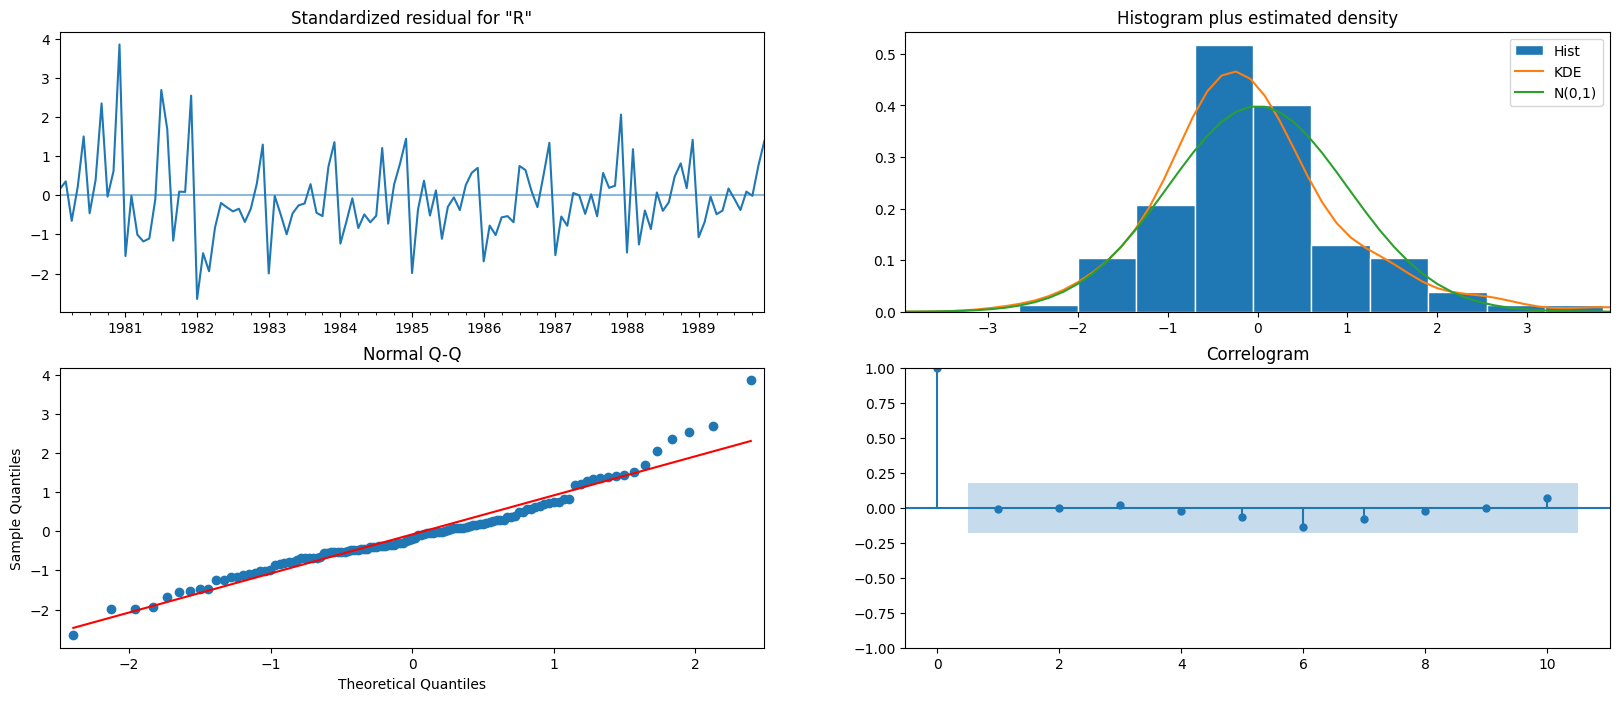

In [165]:
results_manual_ARIMA.plot_diagnostics();
plt.show()

# Predict on the Test Set using this model and evaluate the model.

In [166]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test_1))

In [167]:
rmse = mean_squared_error(test_1['Rose'],predicted_manual_ARIMA,squared=False)
mape = mean_absolute_percentage_error(test_1['Rose'],predicted_manual_ARIMA)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 39.15940309152948 
MAPE: 75.17367698626889


In [168]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['ARIMA(2,1,2)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE       MAPE
ARIMA(2,1,3)  38.844627  74.407596
ARIMA(2,1,2)  39.159403  75.173677

# Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

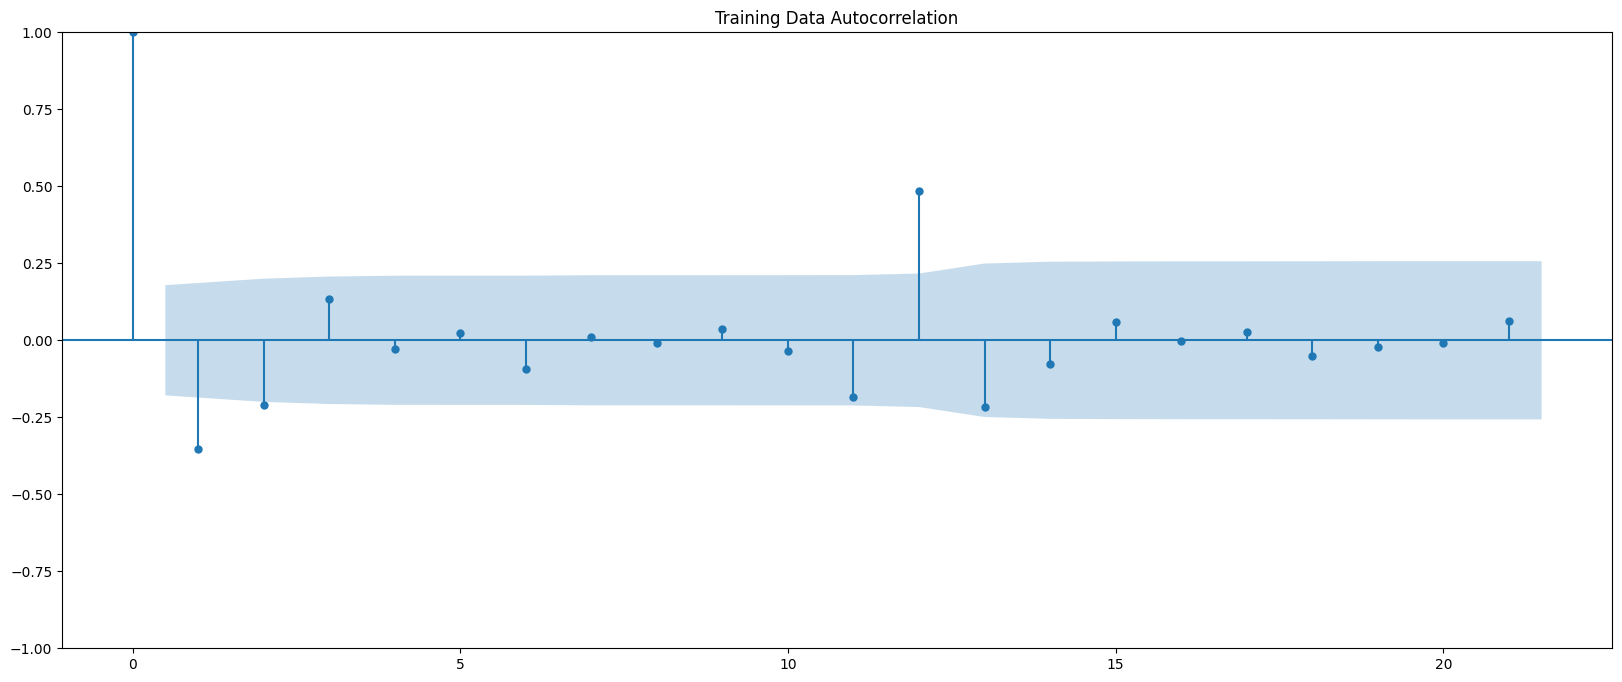

In [169]:
plot_acf(train_1.diff(),title='Training Data Autocorrelation',missing='drop');
plt.show()

In [170]:
import itertools
p = q = range(0, 4)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
PDQ = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of the parameter combinations for the Model are')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], PDQ[i]))

Examples of the parameter combinations for the Model are
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (0, 1, 3)(0, 0, 3, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (1, 1, 3)(1, 0, 3, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)
Model: (2, 1, 3)(2, 0, 3, 12)
Model: (3, 1, 0)(3, 0, 0, 12)
Model: (3, 1, 1)(3, 0, 1, 12)
Model: (3, 1, 2)(3, 0, 2, 12)
Model: (3, 1, 3)(3, 0, 3, 12)


In [171]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [172]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in PDQ:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train_1['Rose'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1205.5480023704872
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1030.103125209376
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:866.6841650054018


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 0)x(0, 0, 3, 12) - AIC:3410.1589993825755
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1029.2277244726533
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1007.8700600347169
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:862.7534181795211
SARIMA(0, 1, 0)x(1, 0, 3, 12) - AIC:3036.2756879031404
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:855.643077061263
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:857.6338457318695
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:849.732240793135


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 0)x(2, 0, 3, 12) - AIC:3368.8234198332384
SARIMA(0, 1, 0)x(3, 0, 0, 12) - AIC:746.9157325478262
SARIMA(0, 1, 0)x(3, 0, 1, 12) - AIC:748.9152628938733
SARIMA(0, 1, 0)x(3, 0, 2, 12) - AIC:746.1032401803312


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 0)x(3, 0, 3, 12) - AIC:3987.596187769365
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:1151.2001025773327
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:992.4259606297331
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:820.5139476971615
SARIMA(0, 1, 1)x(0, 0, 3, 12) - AIC:3400.6424900368074
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:992.7672450123243
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:954.079330391507
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:816.8669009090077


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 1)x(1, 0, 3, 12) - AIC:3065.7738686092603
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:815.6265768008047
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:816.6826595469912
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:802.5838067925865
SARIMA(0, 1, 1)x(2, 0, 3, 12) - AIC:3462.311322969255
SARIMA(0, 1, 1)x(3, 0, 0, 12) - AIC:703.9288693013767
SARIMA(0, 1, 1)x(3, 0, 1, 12) - AIC:705.9120067640819
SARIMA(0, 1, 1)x(3, 0, 2, 12) - AIC:707.8685715911159
SARIMA(0, 1, 1)x(3, 0, 3, 12) - AIC:3463.8052264045145
SARIMA(0, 1, 2)x(0, 0, 0, 12) - AIC:1139.4373115781868
SARIMA(0, 1, 2)x(0, 0, 1, 12) - AIC:975.5645344231266
SARIMA(0, 1, 2)x(0, 0, 2, 12) - AIC:810.0028497556438


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 2)x(0, 0, 3, 12) - AIC:3302.7603105546177
SARIMA(0, 1, 2)x(1, 0, 0, 12) - AIC:985.093904539264
SARIMA(0, 1, 2)x(1, 0, 1, 12) - AIC:944.6725165254793
SARIMA(0, 1, 2)x(1, 0, 2, 12) - AIC:803.7467401559409


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 2)x(1, 0, 3, 12) - AIC:3113.935967275451
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:814.5425996137067
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:815.8137844167692
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:790.0227361866874


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 2)x(2, 0, 3, 12) - AIC:2943.5806959722795
SARIMA(0, 1, 2)x(3, 0, 0, 12) - AIC:705.2817090140358
SARIMA(0, 1, 2)x(3, 0, 1, 12) - AIC:707.2706561125278
SARIMA(0, 1, 2)x(3, 0, 2, 12) - AIC:709.2549182254277


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 2)x(3, 0, 3, 12) - AIC:2876.168438513623
SARIMA(0, 1, 3)x(0, 0, 0, 12) - AIC:1131.8547950264574
SARIMA(0, 1, 3)x(0, 0, 1, 12) - AIC:968.5558441646351
SARIMA(0, 1, 3)x(0, 0, 2, 12) - AIC:802.3719610024458


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 3)x(0, 0, 3, 12) - AIC:3006.8873810043706
SARIMA(0, 1, 3)x(1, 0, 0, 12) - AIC:985.9122874306792
SARIMA(0, 1, 3)x(1, 0, 1, 12) - AIC:934.2358162300255
SARIMA(0, 1, 3)x(1, 0, 2, 12) - AIC:794.8517654625035


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 3)x(1, 0, 3, 12) - AIC:3359.3407293696746
SARIMA(0, 1, 3)x(2, 0, 0, 12) - AIC:816.5425349658708
SARIMA(0, 1, 3)x(2, 0, 1, 12) - AIC:817.7996852534015
SARIMA(0, 1, 3)x(2, 0, 2, 12) - AIC:782.223406395611


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(0, 1, 3)x(2, 0, 3, 12) - AIC:3373.1927069970557
SARIMA(0, 1, 3)x(3, 0, 0, 12) - AIC:707.1333021904104
SARIMA(0, 1, 3)x(3, 0, 1, 12) - AIC:709.1330255758247
SARIMA(0, 1, 3)x(3, 0, 2, 12) - AIC:711.103615651215
SARIMA(0, 1, 3)x(3, 0, 3, 12) - AIC:3382.6742331589967
SARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1191.6975123613104
SARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1024.2270459083563
SARIMA(1, 1, 0)x(0, 0, 2, 12) - AIC:855.0060780745881


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 0)x(0, 0, 3, 12) - AIC:3888.5830138425417
SARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1016.0724525829239
SARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:999.3728690967105
SARIMA(1, 1, 0)x(1, 0, 2, 12) - AIC:851.2648446429408


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 0)x(1, 0, 3, 12) - AIC:3846.6627884553377
SARIMA(1, 1, 0)x(2, 0, 0, 12) - AIC:834.6371169081609
SARIMA(1, 1, 0)x(2, 0, 1, 12) - AIC:836.5867753429637
SARIMA(1, 1, 0)x(2, 0, 2, 12) - AIC:838.5725215774307


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 0)x(2, 0, 3, 12) - AIC:3951.520793473496
SARIMA(1, 1, 0)x(3, 0, 0, 12) - AIC:718.0281630998959
SARIMA(1, 1, 0)x(3, 0, 1, 12) - AIC:719.7431990132281
SARIMA(1, 1, 0)x(3, 0, 2, 12) - AIC:719.9836052037235


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 0)x(3, 0, 3, 12) - AIC:3953.0552098933786
SARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1149.9301044429494
SARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:987.063103023927
SARIMA(1, 1, 1)x(0, 0, 2, 12) - AIC:819.3998663431365


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 1)x(0, 0, 3, 12) - AIC:3377.393072368984
SARIMA(1, 1, 1)x(1, 0, 0, 12) - AIC:979.9095154405246
SARIMA(1, 1, 1)x(1, 0, 1, 12) - AIC:953.995388956261
SARIMA(1, 1, 1)x(1, 0, 2, 12) - AIC:814.6411456185189


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 1)x(1, 0, 3, 12) - AIC:3221.318582222942
SARIMA(1, 1, 1)x(2, 0, 0, 12) - AIC:807.2861985058777
SARIMA(1, 1, 1)x(2, 0, 1, 12) - AIC:808.8003223281279
SARIMA(1, 1, 1)x(2, 0, 2, 12) - AIC:802.1931793009531
SARIMA(1, 1, 1)x(2, 0, 3, 12) - AIC:3464.3113229668274
SARIMA(1, 1, 1)x(3, 0, 0, 12) - AIC:694.5245912286646
SARIMA(1, 1, 1)x(3, 0, 1, 12) - AIC:696.4443978848957
SARIMA(1, 1, 1)x(3, 0, 2, 12) - AIC:697.6681846315638


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 1)x(3, 0, 3, 12) - AIC:3360.0652972322446
SARIMA(1, 1, 2)x(0, 0, 0, 12) - AIC:1139.9010532873046
SARIMA(1, 1, 2)x(0, 0, 1, 12) - AIC:977.5614001272761
SARIMA(1, 1, 2)x(0, 0, 2, 12) - AIC:811.9526047768327


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 2)x(0, 0, 3, 12) - AIC:3313.1787013506364
SARIMA(1, 1, 2)x(1, 0, 0, 12) - AIC:977.8885535596106
SARIMA(1, 1, 2)x(1, 0, 1, 12) - AIC:942.3312479527885
SARIMA(1, 1, 2)x(1, 0, 2, 12) - AIC:805.6865525824163


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 2)x(1, 0, 3, 12) - AIC:3374.3531821857523
SARIMA(1, 1, 2)x(2, 0, 0, 12) - AIC:807.7154799131418
SARIMA(1, 1, 2)x(2, 0, 1, 12) - AIC:809.1028619757116
SARIMA(1, 1, 2)x(2, 0, 2, 12) - AIC:791.8431164800988


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 2)x(2, 0, 3, 12) - AIC:3328.3224446100603
SARIMA(1, 1, 2)x(3, 0, 0, 12) - AIC:696.3318388016621
SARIMA(1, 1, 2)x(3, 0, 1, 12) - AIC:698.1990848684022
SARIMA(1, 1, 2)x(3, 0, 2, 12) - AIC:699.0886727279866


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 2)x(3, 0, 3, 12) - AIC:3334.54636608362
SARIMA(1, 1, 3)x(0, 0, 0, 12) - AIC:1133.4679328598017
SARIMA(1, 1, 3)x(0, 0, 1, 12) - AIC:965.4690842317586
SARIMA(1, 1, 3)x(0, 0, 2, 12) - AIC:804.0865988475168


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 3)x(0, 0, 3, 12) - AIC:3289.3284193022914
SARIMA(1, 1, 3)x(1, 0, 0, 12) - AIC:977.5445178896828
SARIMA(1, 1, 3)x(1, 0, 1, 12) - AIC:935.8844195589595
SARIMA(1, 1, 3)x(1, 0, 2, 12) - AIC:796.2843672101718


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 3)x(1, 0, 3, 12) - AIC:3039.8323707041686
SARIMA(1, 1, 3)x(2, 0, 0, 12) - AIC:809.933931352771
SARIMA(1, 1, 3)x(2, 0, 1, 12) - AIC:811.4712105233673
SARIMA(1, 1, 3)x(2, 0, 2, 12) - AIC:782.7239046439107


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 3)x(2, 0, 3, 12) - AIC:3307.683787227732
SARIMA(1, 1, 3)x(3, 0, 0, 12) - AIC:698.0962232981112
SARIMA(1, 1, 3)x(3, 0, 1, 12) - AIC:700.0402280306769
SARIMA(1, 1, 3)x(3, 0, 2, 12) - AIC:700.6451301688286


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(1, 1, 3)x(3, 0, 3, 12) - AIC:3311.4082434135453
SARIMA(2, 1, 0)x(0, 0, 0, 12) - AIC:1165.4934482426024
SARIMA(2, 1, 0)x(0, 0, 1, 12) - AIC:1018.0676313753822
SARIMA(2, 1, 0)x(0, 0, 2, 12) - AIC:851.4739988605903


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 0)x(0, 0, 3, 12) - AIC:3647.2431396846314
SARIMA(2, 1, 0)x(1, 0, 0, 12) - AIC:992.6331525074137
SARIMA(2, 1, 0)x(1, 0, 1, 12) - AIC:972.0630472053465
SARIMA(2, 1, 0)x(1, 0, 2, 12) - AIC:846.6693362945737


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 0)x(1, 0, 3, 12) - AIC:3634.018379811276
SARIMA(2, 1, 0)x(2, 0, 0, 12) - AIC:821.8338736011846
SARIMA(2, 1, 0)x(2, 0, 1, 12) - AIC:823.5749836028945
SARIMA(2, 1, 0)x(2, 0, 2, 12) - AIC:825.5583246922141


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 0)x(2, 0, 3, 12) - AIC:3711.733907794628
SARIMA(2, 1, 0)x(3, 0, 0, 12) - AIC:706.3211541000796
SARIMA(2, 1, 0)x(3, 0, 1, 12) - AIC:708.3211513871073
SARIMA(2, 1, 0)x(3, 0, 2, 12) - AIC:708.7035485441622


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 0)x(3, 0, 3, 12) - AIC:3968.4619943648618
SARIMA(2, 1, 1)x(0, 0, 0, 12) - AIC:1151.1599564396436
SARIMA(2, 1, 1)x(0, 0, 1, 12) - AIC:985.9650503359879
SARIMA(2, 1, 1)x(0, 0, 2, 12) - AIC:819.8918381465112


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 1)x(0, 0, 3, 12) - AIC:3333.7101455814545
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:967.9839024939605
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:952.503831841586
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:814.8734034804243
SARIMA(2, 1, 1)x(1, 0, 3, 12) - AIC:3365.0114952972785
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:798.4355004159995
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:799.5987097742969
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:801.5915069298111


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 1)x(2, 0, 3, 12) - AIC:3257.928990907896
SARIMA(2, 1, 1)x(3, 0, 0, 12) - AIC:690.4894292199597
SARIMA(2, 1, 1)x(3, 0, 1, 12) - AIC:692.4163187225574
SARIMA(2, 1, 1)x(3, 0, 2, 12) - AIC:694.396997917316


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 1)x(3, 0, 3, 12) - AIC:3323.9237693629802
SARIMA(2, 1, 2)x(0, 0, 0, 12) - AIC:1141.874611306573
SARIMA(2, 1, 2)x(0, 0, 1, 12) - AIC:975.4092994721786
SARIMA(2, 1, 2)x(0, 0, 2, 12) - AIC:813.1901423406715
SARIMA(2, 1, 2)x(0, 0, 3, 12) - AIC:3331.1514784886917
SARIMA(2, 1, 2)x(1, 0, 0, 12) - AIC:973.3845669142049
SARIMA(2, 1, 2)x(1, 0, 1, 12) - AIC:943.8930612174079
SARIMA(2, 1, 2)x(1, 0, 2, 12) - AIC:806.1134087399141
SARIMA(2, 1, 2)x(1, 0, 3, 12) - AIC:3325.665675807175
SARIMA(2, 1, 2)x(2, 0, 0, 12) - AIC:799.1463083081331
SARIMA(2, 1, 2)x(2, 0, 1, 12) - AIC:800.1735208862019
SARIMA(2, 1, 2)x(2, 0, 2, 12) - AIC:792.8514448632211


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 2)x(2, 0, 3, 12) - AIC:3398.6474755023173
SARIMA(2, 1, 2)x(3, 0, 0, 12) - AIC:692.9610193258774
SARIMA(2, 1, 2)x(3, 0, 1, 12) - AIC:694.2975206684439
SARIMA(2, 1, 2)x(3, 0, 2, 12) - AIC:693.904750071931
SARIMA(2, 1, 2)x(3, 0, 3, 12) - AIC:3399.610262073809
SARIMA(2, 1, 3)x(0, 0, 0, 12) - AIC:1127.1938492122856
SARIMA(2, 1, 3)x(0, 0, 1, 12) - AIC:963.3401674813218
SARIMA(2, 1, 3)x(0, 0, 2, 12) - AIC:811.7917071369785
SARIMA(2, 1, 3)x(0, 0, 3, 12) - AIC:3324.6997631974496
SARIMA(2, 1, 3)x(1, 0, 0, 12) - AIC:969.9878707543406
SARIMA(2, 1, 3)x(1, 0, 1, 12) - AIC:926.7697704008782
SARIMA(2, 1, 3)x(1, 0, 2, 12) - AIC:791.5006692497332
SARIMA(2, 1, 3)x(1, 0, 3, 12) - AIC:3283.1531853757633
SARIMA(2, 1, 3)x(2, 0, 0, 12) - AIC:794.427622093172
SARIMA(2, 1, 3)x(2, 0, 1, 12) - AIC:795.9698381074392
SARIMA(2, 1, 3)x(2, 0, 2, 12) - AIC:781.5953508790572


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 3)x(2, 0, 3, 12) - AIC:3966.4780319990846
SARIMA(2, 1, 3)x(3, 0, 0, 12) - AIC:688.786951573143
SARIMA(2, 1, 3)x(3, 0, 1, 12) - AIC:690.2999594931168
SARIMA(2, 1, 3)x(3, 0, 2, 12) - AIC:692.2754828843391


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(2, 1, 3)x(3, 0, 3, 12) - AIC:3968.396511967363
SARIMA(3, 1, 0)x(0, 0, 0, 12) - AIC:1155.5710957085648
SARIMA(3, 1, 0)x(0, 0, 1, 12) - AIC:1009.205512179603
SARIMA(3, 1, 0)x(0, 0, 2, 12) - AIC:848.4185909952108
SARIMA(3, 1, 0)x(0, 0, 3, 12) - AIC:2534.730309094158
SARIMA(3, 1, 0)x(1, 0, 0, 12) - AIC:974.9801013635769
SARIMA(3, 1, 0)x(1, 0, 1, 12) - AIC:961.8260661096389
SARIMA(3, 1, 0)x(1, 0, 2, 12) - AIC:841.6766611504665


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 0)x(1, 0, 3, 12) - AIC:3400.392453504928
SARIMA(3, 1, 0)x(2, 0, 0, 12) - AIC:809.3748148520995
SARIMA(3, 1, 0)x(2, 0, 1, 12) - AIC:810.9101592561593
SARIMA(3, 1, 0)x(2, 0, 2, 12) - AIC:812.8861409359614


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 0)x(2, 0, 3, 12) - AIC:2366.4487170869056
SARIMA(3, 1, 0)x(3, 0, 0, 12) - AIC:697.9702794648532
SARIMA(3, 1, 0)x(3, 0, 1, 12) - AIC:698.5362267030185
SARIMA(3, 1, 0)x(3, 0, 2, 12) - AIC:697.9812922345342


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 0)x(3, 0, 3, 12) - AIC:3002.3752149581287
SARIMA(3, 1, 1)x(0, 0, 0, 12) - AIC:1142.9807953147063
SARIMA(3, 1, 1)x(0, 0, 1, 12) - AIC:987.5781108619424
SARIMA(3, 1, 1)x(0, 0, 2, 12) - AIC:820.54585936168


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 1)x(0, 0, 3, 12) - AIC:3909.8060581770474
SARIMA(3, 1, 1)x(1, 0, 0, 12) - AIC:961.1085711006966
SARIMA(3, 1, 1)x(1, 0, 1, 12) - AIC:945.6058793032253
SARIMA(3, 1, 1)x(1, 0, 2, 12) - AIC:817.1474977995179


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 1)x(1, 0, 3, 12) - AIC:3122.656446097554
SARIMA(3, 1, 1)x(2, 0, 0, 12) - AIC:789.1532638152894
SARIMA(3, 1, 1)x(2, 0, 1, 12) - AIC:790.166687375027
SARIMA(3, 1, 1)x(2, 0, 2, 12) - AIC:792.1463593405729


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 1)x(2, 0, 3, 12) - AIC:3259.9288898374225
SARIMA(3, 1, 1)x(3, 0, 0, 12) - AIC:680.6400091950795
SARIMA(3, 1, 1)x(3, 0, 1, 12) - AIC:681.9051142526387
SARIMA(3, 1, 1)x(3, 0, 2, 12) - AIC:681.6256685416338


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 1)x(3, 0, 3, 12) - AIC:3184.464142298845
SARIMA(3, 1, 2)x(0, 0, 0, 12) - AIC:1144.1958753221134
SARIMA(3, 1, 2)x(0, 0, 1, 12) - AIC:975.6521870888824
SARIMA(3, 1, 2)x(0, 0, 2, 12) - AIC:814.4168214534787
SARIMA(3, 1, 2)x(0, 0, 3, 12) - AIC:677.2108178011086
SARIMA(3, 1, 2)x(1, 0, 0, 12) - AIC:963.056625410978
SARIMA(3, 1, 2)x(1, 0, 1, 12) - AIC:945.8573477619833
SARIMA(3, 1, 2)x(1, 0, 2, 12) - AIC:807.4853449257664


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 2)x(1, 0, 3, 12) - AIC:3652.579213451687
SARIMA(3, 1, 2)x(2, 0, 0, 12) - AIC:791.1329242006665
SARIMA(3, 1, 2)x(2, 0, 1, 12) - AIC:792.154061481181
SARIMA(3, 1, 2)x(2, 0, 2, 12) - AIC:794.1354698082565


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 2)x(2, 0, 3, 12) - AIC:3715.0915246785735
SARIMA(3, 1, 2)x(3, 0, 0, 12) - AIC:682.3555334031942
SARIMA(3, 1, 2)x(3, 0, 1, 12) - AIC:683.0642196709822
SARIMA(3, 1, 2)x(3, 0, 2, 12) - AIC:682.3557905929688


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 2)x(3, 0, 3, 12) - AIC:3718.6054629905802
SARIMA(3, 1, 3)x(0, 0, 0, 12) - AIC:1131.2859744369182
SARIMA(3, 1, 3)x(0, 0, 1, 12) - AIC:954.5058067781471
SARIMA(3, 1, 3)x(0, 0, 2, 12) - AIC:807.3151378650516


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 3)x(0, 0, 3, 12) - AIC:2865.9153648047727
SARIMA(3, 1, 3)x(1, 0, 0, 12) - AIC:963.1877004135386
SARIMA(3, 1, 3)x(1, 0, 1, 12) - AIC:939.5238092126572
SARIMA(3, 1, 3)x(1, 0, 2, 12) - AIC:798.4997681654204


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 3)x(1, 0, 3, 12) - AIC:3199.732954813977
SARIMA(3, 1, 3)x(2, 0, 0, 12) - AIC:785.969779235544
SARIMA(3, 1, 3)x(2, 0, 1, 12) - AIC:787.54567676059
SARIMA(3, 1, 3)x(2, 0, 2, 12) - AIC:783.0265659210768


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 3)x(2, 0, 3, 12) - AIC:2961.303610887796
SARIMA(3, 1, 3)x(3, 0, 0, 12) - AIC:682.2453312333856
SARIMA(3, 1, 3)x(3, 0, 1, 12) - AIC:683.7285456324641
SARIMA(3, 1, 3)x(3, 0, 2, 12) - AIC:683.3412421249164


C:\Python\Anaconda\lib\site-packages\statsmodels\base\model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMA(3, 1, 3)x(3, 0, 3, 12) - AIC:2903.159892647449


In [173]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal         AIC
227  (3, 1, 2)  (0, 0, 3, 12)  677.210818
220  (3, 1, 1)  (3, 0, 0, 12)  680.640009
222  (3, 1, 1)  (3, 0, 2, 12)  681.625669
221  (3, 1, 1)  (3, 0, 1, 12)  681.905114
252  (3, 1, 3)  (3, 0, 0, 12)  682.245331

In [174]:
import statsmodels.api as sm

auto_SARIMA = sm.tsa.statespace.SARIMAX(train_1['Rose'],
                                order=(3, 1, 2),
                                seasonal_order=(0, 0, 3, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA = auto_SARIMA.fit(maxiter=1000)
print(results_auto_SARIMA.summary())

C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                         SARIMAX Results                                          
Dep. Variable:                                       Rose   No. Observations:                  120
Model:             SARIMAX(3, 1, 2)x(0, 0, [1, 2, 3], 12)   Log Likelihood                -329.605
Date:                                    Wed, 25 May 2022   AIC                            677.211
Time:                                            23:41:38   BIC                            698.649
Sample:                                        01-31-1980   HQIC                           685.806
                                             - 12-31-1989                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9516      3.361     -0.283      0

In [175]:
results_auto_SARIMA.plot_diagnostics();

# Predict on the Test Set using this model and evaluate the model.

In [176]:
predicted_auto_SARIMA = results_auto_SARIMA.get_forecast(steps=len(test_1))

In [177]:
predicted_auto_SARIMA.summary_frame(alpha=0.05).head()

Rose                mean  mean_se  mean_ci_lower  mean_ci_upper
1990-01-31 -4.859533e+22      NaN            NaN            NaN
1990-02-28  7.235649e+22      NaN            NaN            NaN
1990-03-31 -1.077359e+23      NaN            NaN            NaN
1990-04-30  1.604144e+23      NaN            NaN            NaN
1990-05-31 -2.388505e+23      NaN            NaN            NaN

In [178]:
rmse = mean_squared_error(test_1['Rose'],predicted_auto_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test_1['Rose'],predicted_auto_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 2.060947680518127e+33 
MAPE: 1.2856279125461965e+33


In [179]:
temp_resultsDf = pd.DataFrame({'RMSE': rmse,'MAPE':mape}
                           ,index=['SARIMA(1,1,3)(3,0,3,6)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE          MAPE
ARIMA(2,1,3)            3.884463e+01  7.440760e+01
ARIMA(2,1,2)            3.915940e+01  7.517368e+01
SARIMA(1,1,3)(3,0,3,6)  2.060948e+33  1.285628e+33

# Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots. - Seasonality at 6.

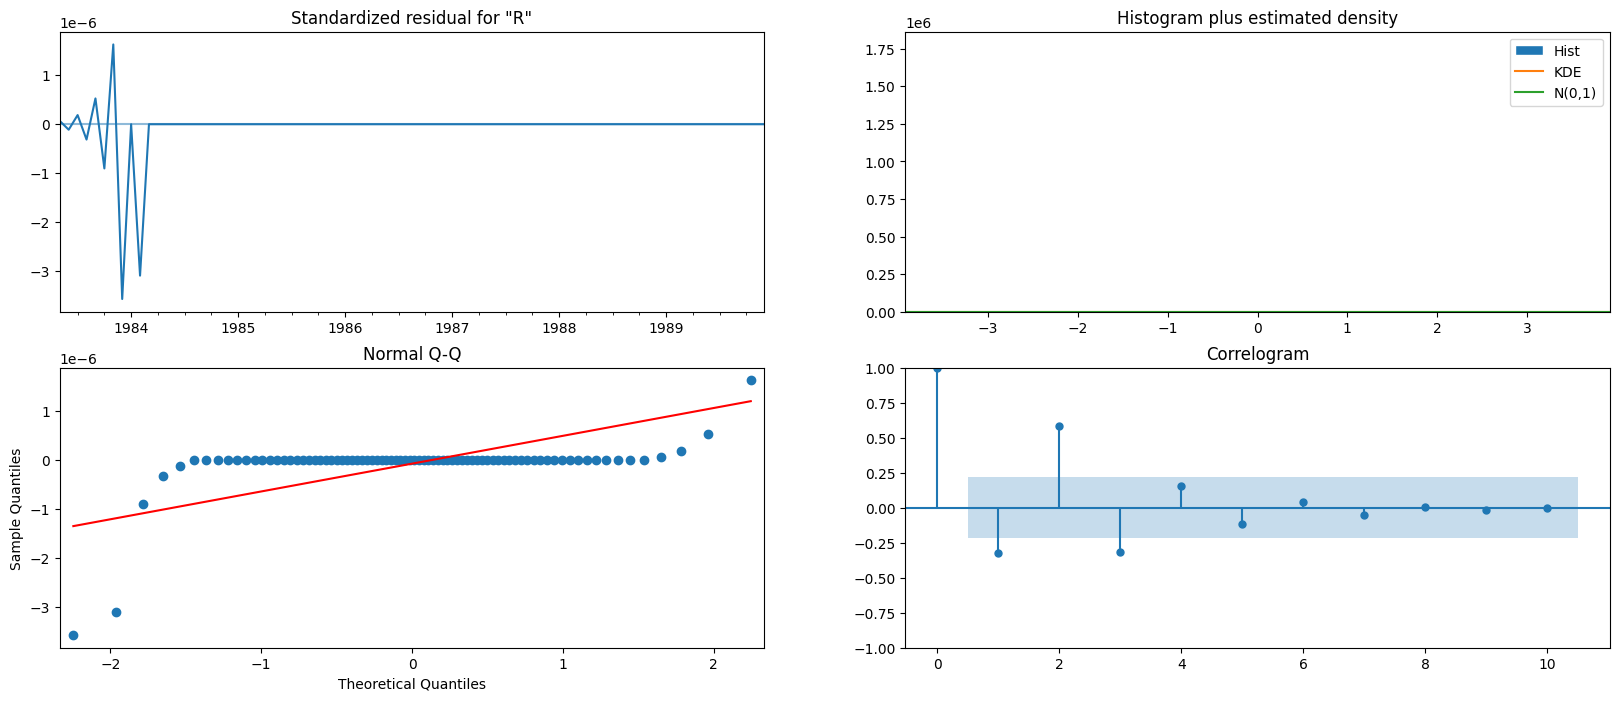

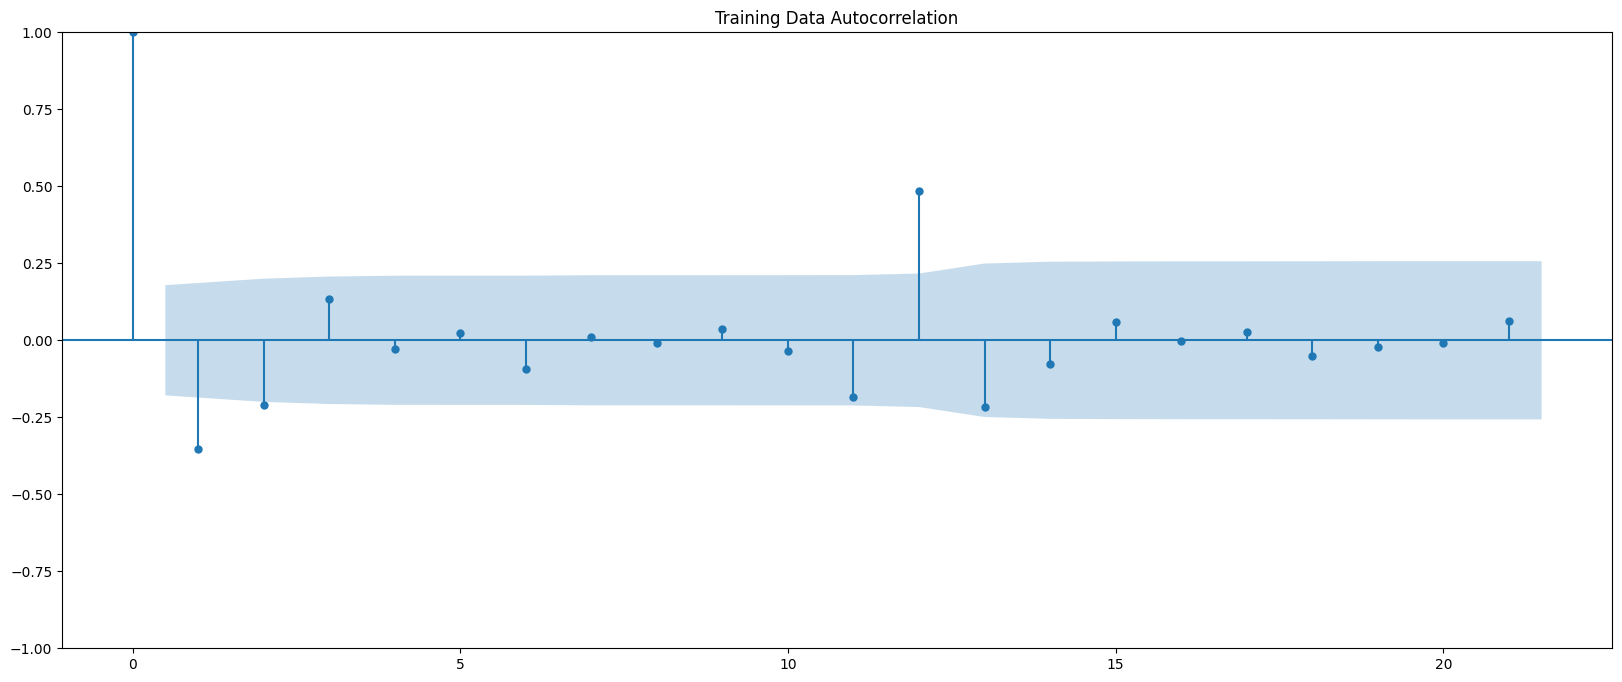

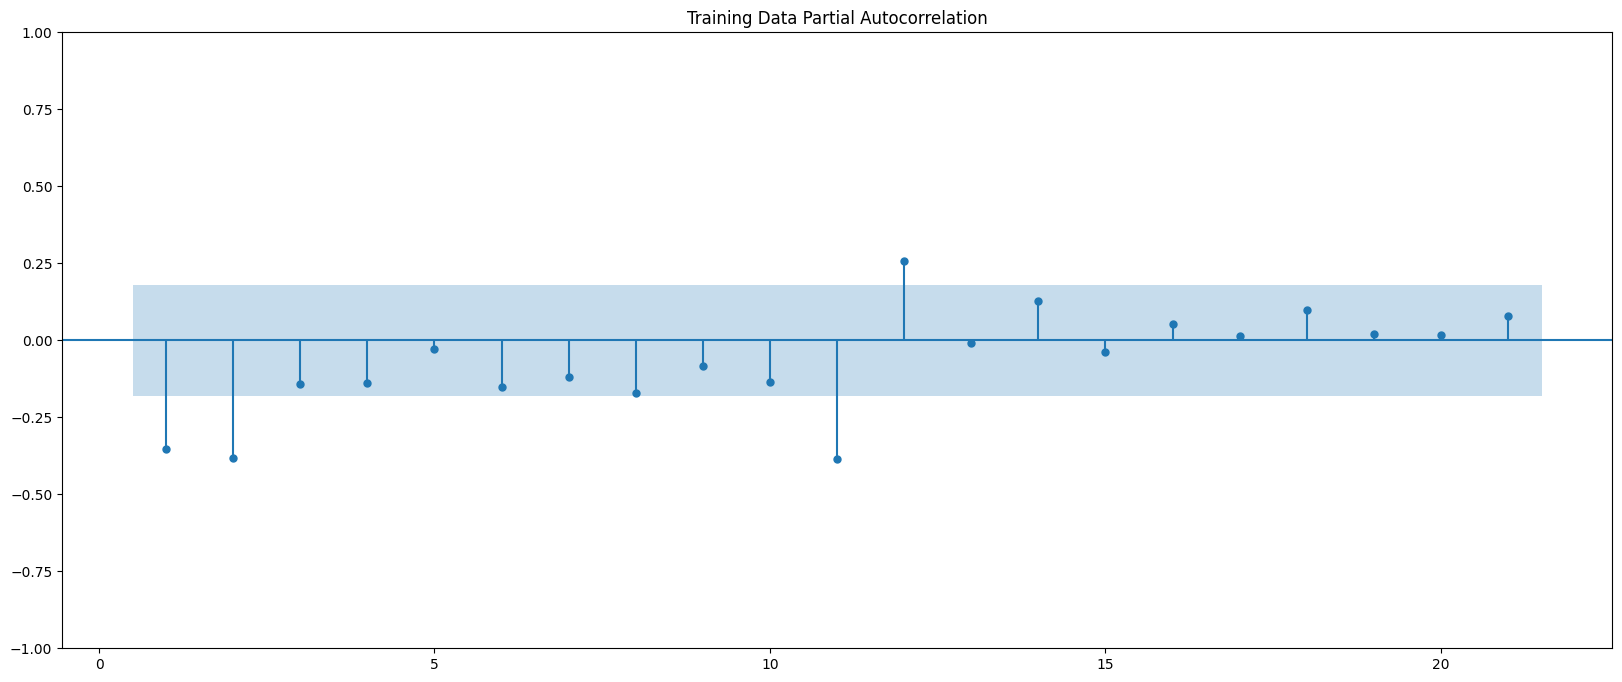

In [180]:
plot_acf(train_1.diff(),title='Training Data Autocorrelation',missing='drop')
plot_pacf(train_1.diff().dropna(),title='Training Data Partial Autocorrelation',zero=False,method='ywmle');
plt.show()

Here, we have taken alpha=0.05.

We are going to take the seasonal period as 11 or its multiple e.g. 22.
We are taking the p value to be 2 and the q value also to be 2 as the parameters same as the ARIMA model.

* The Auto-Regressive parameter in an SARIMA model is 'P' which comes from the significant lag after which the PACF plot cuts-off to 2. 
* The Moving-Average parameter in an SARIMA model is 'Q' which comes from the significant lag after which the ACF plot cuts-off to 2.


In [181]:
import statsmodels.api as sm

manual_SARIMA = sm.tsa.statespace.SARIMAX(train_1['Rose'],
                                order=(2,0,2),
                                seasonal_order=(2, 0, 2, 11),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA = manual_SARIMA.fit(maxiter=1000)
print(results_manual_SARIMA.summary())

C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  120
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 11)   Log Likelihood                -436.535
Date:                            Wed, 25 May 2022   AIC                            891.070
Time:                                    23:41:45   BIC                            914.055
Sample:                                01-31-1980   HQIC                           900.357
                                     - 12-31-1989                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9567      0.275      3.482      0.000       0.418       1.495
ar.L2          0.0404      0.274   

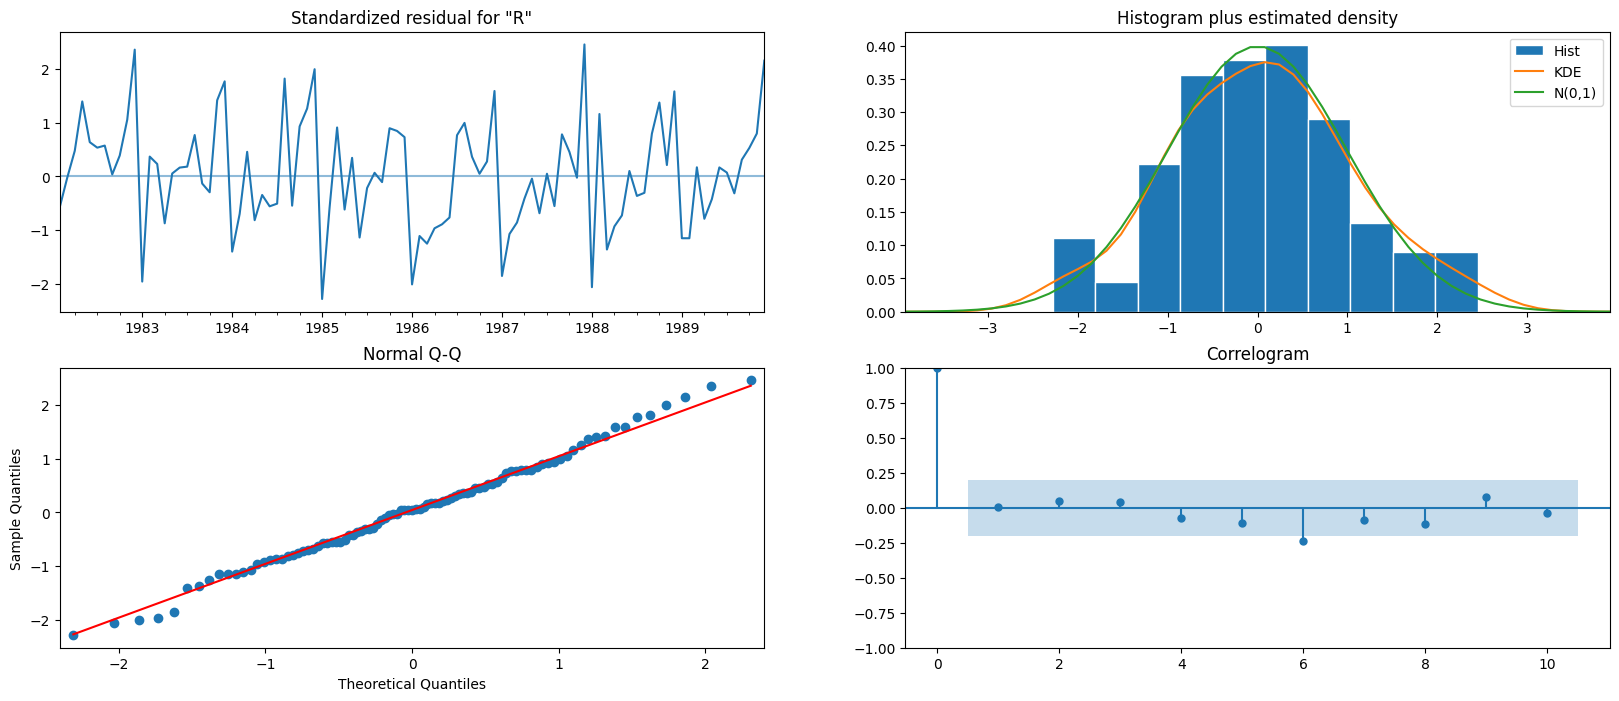

In [182]:
results_manual_SARIMA.plot_diagnostics()
plt.show()

# Predict on the Test Set using this model and evaluate the model.

In [183]:
predicted_manual_SARIMA = results_manual_SARIMA.get_forecast(steps=len(test_1))

In [184]:
rmse = mean_squared_error(test_1['Rose'],predicted_manual_SARIMA.predicted_mean,squared=False)
mape = mean_absolute_percentage_error(test_1['Rose'],predicted_manual_SARIMA.predicted_mean)
print('RMSE:',rmse,'\nMAPE:',mape)

RMSE: 26.007999389952356 
MAPE: 48.033606797463335


In [185]:
temp_resultsDf = pd.DataFrame({'RMSE': [rmse],'MAPE':mape}
                           ,index=['SARIMA(2,0,2)(2,0,2,11)'])


resultsDf = pd.concat([resultsDf,temp_resultsDf])

resultsDf

RMSE          MAPE
ARIMA(2,1,3)             3.884463e+01  7.440760e+01
ARIMA(2,1,2)             3.915940e+01  7.517368e+01
SARIMA(1,1,3)(3,0,3,6)   2.060948e+33  1.285628e+33
SARIMA(2,0,2)(2,0,2,11)  2.600800e+01  4.803361e+01

# Building the most optimum model on the Full Data.

In [186]:
full_data_model = sm.tsa.statespace.SARIMAX(df2['Rose'],
                                order=(2,0,2),
                                seasonal_order=(2, 0, 2, 11),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)
C:\Python\Anaconda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:539: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


                                     SARIMAX Results                                      
Dep. Variable:                               Rose   No. Observations:                  187
Model:             SARIMAX(2, 0, 2)x(2, 0, 2, 11)   Log Likelihood                -731.342
Date:                            Wed, 25 May 2022   AIC                           1480.684
Time:                                    23:41:54   BIC                           1508.473
Sample:                                01-31-1980   HQIC                          1491.967
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8622      0.167      5.177      0.000       0.536       1.189
ar.L2          0.1323      0.166   

# Evaluate the model on the whole data and predict 12 months into the future (till the end of next year).

In [187]:
predicted_manual_SARIMA_full_data = results_full_data_model.get_forecast(steps=20)

In [188]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_full_data.summary_frame(alpha=0.05)
pred_full_manual_SARIMA_date.head()

Rose             mean    mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  51.133971  21.889031       8.232258      94.035684
1995-09-30  51.103433  22.212479       7.567774      94.639092
1995-10-31  46.241902  22.218317       2.694800      89.789004
1995-11-30  52.865439  22.238139       9.279488      96.451391
1995-12-31  52.741578  22.255414       9.121768      96.361388

In [189]:
rmse = mean_squared_error(df2['Rose'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 30.858872322018925


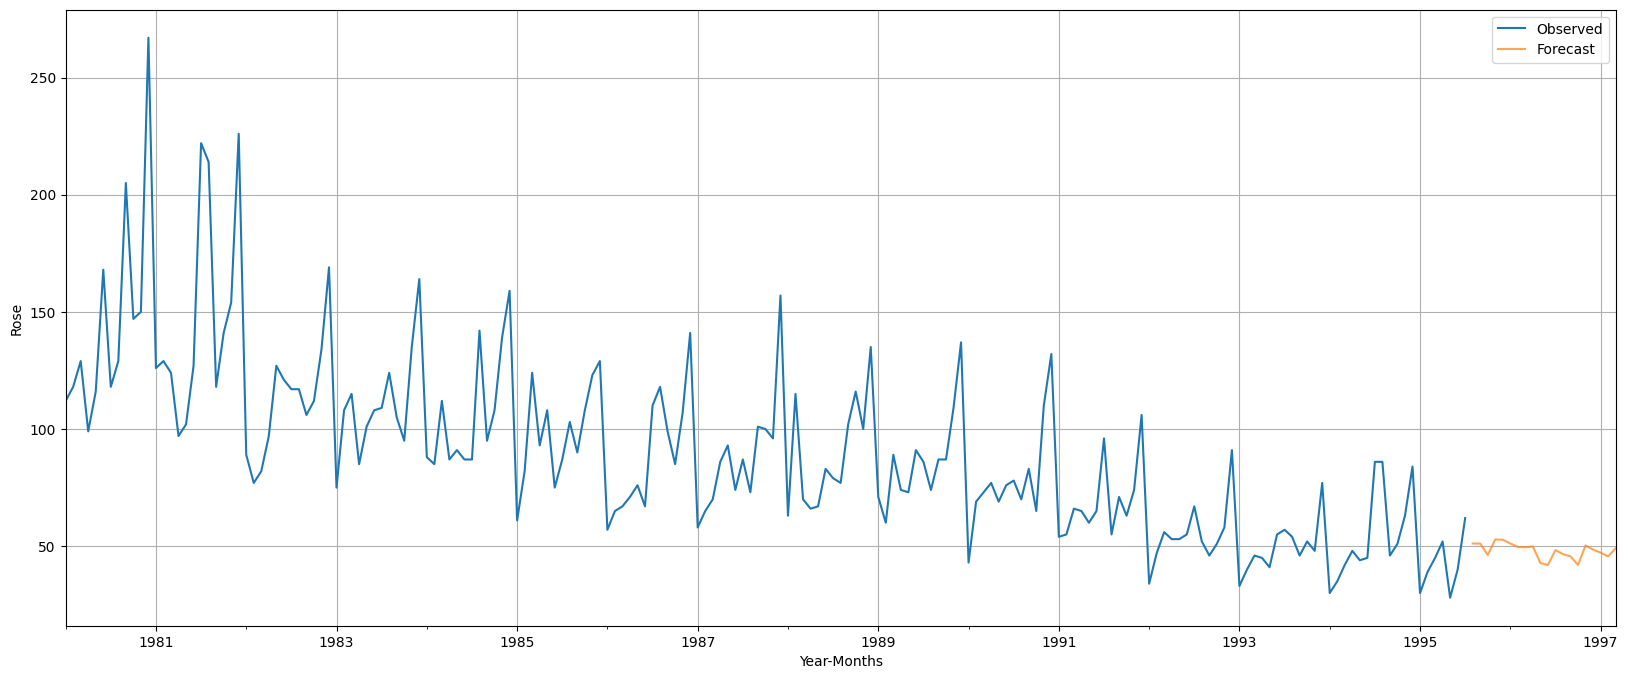

In [193]:
axis = df2['Rose'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)

axis.set_xlabel('Year-Months')
axis.set_ylabel('Rose')
plt.legend(loc='best')
plt.grid();
plt.show()

In [191]:
resultsDf

RMSE          MAPE
ARIMA(2,1,3)             3.884463e+01  7.440760e+01
ARIMA(2,1,2)             3.915940e+01  7.517368e+01
SARIMA(1,1,3)(3,0,3,6)   2.060948e+33  1.285628e+33
SARIMA(2,0,2)(2,0,2,11)  2.600800e+01  4.803361e+01

In [ ]:
L

# END